### Faculdade de Engenharia Industrial - FEI

### Centro Universitário da Fundação Educacional Inaciana "Padre Sabóia de Medeiros" (FEI)


*FEI's Stricto Sensu Graduate Program in Electrical Engineering*

Concentration area: ARTIFICIAL INTELLIGENCE APPLIED TO AUTOMATION AND ROBOTICS

Master's thesis student Andre Luiz Florentino

***

## Check for GPU

In [1]:
import tensorflow as tf
#tf.config.run_functions_eagerly(True)

print(tf.__version__)

pd = tf.config.experimental.list_physical_devices()
for i in pd:
    print(i)
print('------------------------------------------------------------------------------------------')


print(tf.config.list_physical_devices('GPU'))
# [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

print(tf.test.is_built_with_cuda)
# <function is_built_with_cuda at 0x000001AA24AFEC10>

print(tf.test.gpu_device_name())
# /device:GPU:0

#gvd = tf.config.get_visible_devices()
for j in tf.config.get_visible_devices():
    print(j)
# PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
# PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

physical_devices = tf.config.experimental.list_physical_devices()
tf.config.experimental.set_memory_growth(physical_devices[2], True)

2.3.0
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')
------------------------------------------------------------------------------------------
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
<function is_built_with_cuda at 0x000001F5762840D0>
/device:GPU:0
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


# Chapter 6: Neural networks

***

## Importe modules

In [2]:
import librosa
import os
import warnings
import itertools
import time
import sys
import pickle

import pandas     as pd
import seaborn    as sns
import numpy      as np

from matplotlib  import pyplot  as plt
from keras       import backend as K

from tqdm                        import tqdm
from collections                 import Counter

from sklearn                     import metrics
from sklearn.model_selection     import train_test_split
from sklearn.metrics             import confusion_matrix, classification_report
from sklearn.decomposition       import PCA

from tensorflow                  import keras
from tensorflow.keras.models     import Sequential, load_model
from tensorflow.keras.layers     import Dense, Dropout, Conv1D, GlobalAveragePooling1D, MaxPooling1D, Flatten, GlobalMaxPooling1D

from keras.callbacks             import ModelCheckpoint, EarlyStopping
from keras.regularizers          import l2


warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

pd.set_option('display.max_columns', 9)
pd.set_option('display.width', 300)
pd.set_option('display.max_colwidth', 120)

cmap_cm   = plt.cm.Blues

In [3]:
# Globals
current_path = os.getcwd()

# For the picture names
pic_first_name = '06_Neural_network_'

# For Librosa
FRAME_SIZE  = 1024
HOP_LENGTH  = 512
SEED        = 1000
SR          = 22050

## Loading the dataset


In [4]:
# Select the dataset

opc = 0
while str(opc) not in '1234':
    print()
    print("1-) ESC-10")
    print("2-) BDLib2")
    print("3-) US8K")
    print("4-) US8K_AV")


    opc = input("\nSelect the dataset: ")
    if opc.isdigit():
        opc = int(opc)
    else:
        opc = 0

if opc == 1:

    path        = os.path.join(current_path, "_dataset", "ESC-10")
    path_pic    = os.path.join(current_path, "ESC-10_results")
    path_models = os.path.join(current_path, "ESC-10_saved_models")
    
   
    subfolders  = next(os.walk(path))[1]
    nom_dataset = 'ESC-10' 
    csv_file    = 'ESC-10.csv'
    fold        = '1'

    pkl_features          = 'ESC-10_features_original.pkl'
    pkl_aug_features      = 'ESC-10_features_augmented_no_windowing.pkl'
    pkl_aug_wind_features = 'ESC-10_features_augmented.pkl'

    
if opc == 2:
    
    path        = os.path.join(current_path, "_dataset", "BDLib2")
    path_pic    = os.path.join(current_path, "BDLib2_results")
    path_models = os.path.join(current_path, "BDLib2_saved_models")

    subfolders  = next(os.walk(path))[1]
    nom_dataset = 'BDLib2' 
    csv_file    = 'BDLib2.csv'
    fold        = 'fold-1'

    pkl_features          = 'BDLib2_features_original.pkl'
    pkl_aug_features      = 'BDLib2_features_augmented_no_windowing.pkl'
    pkl_aug_wind_features = 'BDLib2_features_augmented.pkl'

    
if opc == 3:
    
    path        = os.path.join(current_path, "_dataset", "US8K")
    path_pic    = os.path.join(current_path, "US8K_results")
    path_models = os.path.join(current_path, "US8K_saved_models")
    
    subfolders  = next(os.walk(path))[1]
    nom_dataset = 'US8K' 
    csv_file    = 'US8K.csv'
    fold        = '1'
    
    pkl_features          = 'US8K_features_original.pkl'
    pkl_aug_features      = 'US8K_features_augmented_no_windowing.pkl'
    pkl_aug_wind_features = 'US8K_features_windowed.pkl' # augmented and windowed makes no sense. Dataset is already quite large
    

if opc == 4:

    path        = os.path.join(current_path, "_dataset", "US8K_AV")
    path_pic    = os.path.join(current_path, "US8K_AV_results")
    path_models = os.path.join(current_path, "US8K_AV_saved_models")

    subfolders  = next(os.walk(path))[1]
    nom_dataset = 'US8K_AV' 
    csv_file    = 'US8K_AV.csv'
    fold        = '1'

    pkl_features          = 'US8K_AV_features_original.pkl'
    pkl_aug_features      = 'US8K_AV_features_augmented_no_windowing.pkl'
    pkl_aug_wind_features = 'US8K_AV_features_windowed.pkl' # augmented and windowed makes no sense. Dataset is already quite large


1-) ESC-10
2-) BDLib2
3-) US8K
4-) US8K_AV

Select the dataset: 4


In [5]:
def get_next_file_number(folder: str):
    files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) and f.startswith(pic_first_name)]
    if not files:
        return 1
    else:
        numbers = [int(f.split('.')[0].split('_')[-1]) for f in files]
        return max(numbers) + 1

In [6]:
from MT_loadDataset import loadDataset

In [7]:
loadDataset = loadDataset(path)
DB          = loadDataset.db_B

print("\nClasses:\n--------------------")
print(DB["Class_categorical"].value_counts())
print("\nTotal number of unique files..........: ", len(np.unique(DB["File_name"])))
print("Total number of AUDIO files...........: ", len(DB))
DB


Classes:
--------------------
Class_categorical
dog_bark            1000
children_playing    1000
background          1000
siren                929
silence              550
car_horn             429
Name: count, dtype: int64

Total number of unique files..........:  4908
Total number of AUDIO files...........:  4908


,Fold,Folder_name,Class_OHEV,Class_categorical,File_name,Path
0,5,fold5,"[0, 0, 0, 1, 0, 0]",dog_bark,100032-3-0-0.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100032-3-0-0.wav
1,5,fold5,"[0, 0, 1, 0, 0, 0]",children_playing,100263-2-0-117.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-117.wav
2,5,fold5,"[0, 0, 1, 0, 0, 0]",children_playing,100263-2-0-121.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-121.wav
3,5,fold5,"[0, 0, 1, 0, 0, 0]",children_playing,100263-2-0-126.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-126.wav
4,5,fold5,"[0, 0, 1, 0, 0, 0]",children_playing,100263-2-0-137.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-137.wav
...,...,...,...,...,...,...
4903,9,fold9,"[0, 0, 0, 0, 1, 0]",silence,708192_10.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_10.wav
4904,9,fold9,"[0, 0, 0, 0, 1, 0]",silence,708192_11.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_11.wav
4905,9,fold9,"[0, 0, 0, 0, 1, 0]",silence,708192_12.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_12.wav
4906,9,fold9,"[0, 0, 0, 0, 1, 0]",silence,708192_8.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_8.wav


In [8]:
DB.dtypes

Fold                  int64
Folder_name          object
Class_OHEV           object
Class_categorical    object
File_name            object
Path                 object
dtype: object

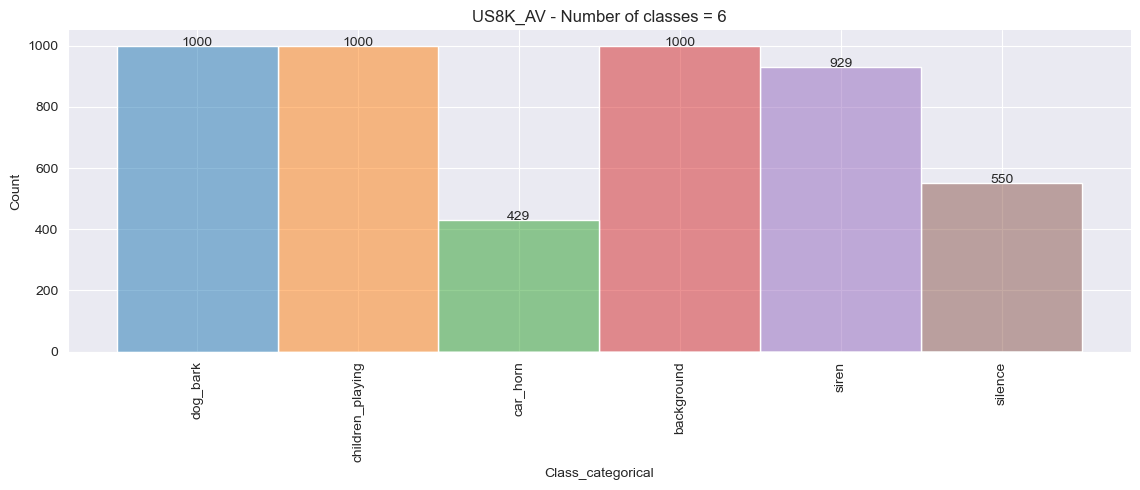

In [9]:
# Analysis of the class balancing

sns.set_style("darkgrid")
gTitle = f'{nom_dataset} - Number of classes = ' + str(len(pd.Series(DB['Class_categorical']).unique()))
g = sns.displot(DB,x='Class_categorical', hue='Class_categorical',height = 5, aspect = 2).set(title=gTitle)
g.set_xticklabels(rotation=90)
g.set_titles('Number of classes')

# Retrieve the axes object from the plot
axes = g.ax

# Iterate over each bar in the plot
for p in axes.patches:
    # Get the coordinates of the bar
    width = p.get_width()
    height = p.get_height()
    cord_x, cord_y = p.get_xy()
    if height > 0:
        axes.annotate(f'{height}', (cord_x + width/2, cord_y + height), ha='center')
        
g._legend.remove()

plt.tight_layout()

In [10]:
# Read the pkl file with the augmented features extracted

opc = 0
while str(opc) not in '123':
    print()
    print("1-) Features original")
    print("2-) Features augmented")
    print("3-) Features augmented and windowed (US8K is only windowed)")

    opc = input("\nSelect the dataset: ")
    if opc.isdigit():
        opc = int(opc)
    else:
        opc = 0

if opc == 1:
    DB_from_pkl   = pd.read_pickle(os.path.join(path_models, pkl_features))
    model_surname = '_original'

if opc == 2:
    DB_from_pkl   = pd.read_pickle(os.path.join(path_models, pkl_aug_features))
    model_surname = '_augmented'

if opc == 3:
    DB_from_pkl = pd.read_pickle(os.path.join(path_models, pkl_aug_wind_features))
    model_surname = '_windowed'


1-) Features original
2-) Features augmented
3-) Features augmented and windowed (US8K is only windowed)

Select the dataset: 3


In [11]:
DB_from_pkl.dtypes

Audio                  object
Class_categorical      object
Class_OHEV             object
Fold                   object
RMSE                  float64
                       ...   
TONNETZ_6             float64
TONNETZ_std_6         float64
TONNETZ_median_6      float64
TONNETZ_skew_6        float64
TONNETZ_kurtosis_6    float64
Length: 379, dtype: object

In [12]:
total_duration = 0
for audio in DB_from_pkl['Audio']:
    total_duration = total_duration + librosa.get_duration(y=audio)
print('Total duration of the dataset: ' , "{:0.4f} h".format(total_duration / 3600))

Total duration of the dataset:  9.5286 h


In [13]:
DB_from_pkl

,Audio,Class_categorical,Class_OHEV,Fold,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
0,"[-0.0034710653, -0.0050192624, -0.004654482, -0.0049833283, -0.0038681468, -0.0023575649, -0.00025486574, 0.00135406...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,...,0.025644,-0.046785,0.461191,-0.338882
1,"[-0.015428771, -0.0064468235, -0.002025701, -0.009768408, -0.020482529, -0.03246226, -0.046539657, -0.050950672, -0....",dog_bark,"[0, 0, 0, 1, 0, 0]",5,...,0.026433,-0.030688,0.414979,-0.840459
2,"[-0.17165461, -0.1961453, -0.2095497, -0.116395764, 0.02499168, 0.15181583, 0.2456393, 0.24304995, 0.1697193, 0.0706...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,...,0.023640,-0.045384,0.629947,0.096665
3,"[-0.004147315, -0.014180049, -0.016550057, -0.017083425, -0.010863152, -0.0018686495, 0.006234308, 0.00725661, 0.005...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,...,0.024617,-0.025407,0.554764,-0.364067
4,"[-0.047271818, -0.08598116, -0.08329079, -0.15244874, -0.21367016, -0.26584676, -0.19677721, -0.17195633, -0.0841544...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,...,0.024934,-0.036388,0.770805,0.232676
...,...,...,...,...,...,...,...,...,...
34351,"[-0.0013713251, -0.0009226998, -0.0006403711, -0.0005783211, -0.0006910372, -0.00091834716, -0.0010323625, -0.000976...",silence,"[0, 0, 0, 0, 1, 0]",9,...,0.013994,-0.018363,-0.710840,-0.875780
34352,"[0.0015545484, 0.001670274, 0.0018922735, 0.0021141772, 0.002221069, 0.002072654, 0.0018563501, 0.0018253133, 0.0019...",silence,"[0, 0, 0, 0, 1, 0]",9,...,0.010918,0.001000,-0.683456,-0.967157
34353,"[-0.0010607778, -0.0006731042, -0.00053357193, -0.0006793465, -0.00088371243, -0.00095680775, -0.0009278627, -0.0008...",silence,"[0, 0, 0, 0, 1, 0]",9,...,0.016168,0.004923,0.232408,-1.142400
34354,"[-0.00025361695, -0.00036392454, -0.0002459652, 0.000116177835, 0.0004521357, 0.0005208538, 0.0003343413, 5.40631e-0...",silence,"[0, 0, 0, 0, 1, 0]",9,...,0.017644,0.019569,-0.490374,-0.357968


In [14]:
print(type(DB_from_pkl['Fold'][0][0]))
print(type(DB_from_pkl['Class_OHEV'][0][0]))
print(type(DB_from_pkl['Class_OHEV'][0]))

<class 'str'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>


## Input split

In [15]:
# Separate 1 fold for validation and create a DB for the training / testing according to the datasets specification

DB_from_pkl_VAL = DB_from_pkl[DB_from_pkl['Fold'] == fold].copy()
DB_from_pkl_TRN = DB_from_pkl[DB_from_pkl['Fold'] != fold].copy()

In [16]:
print(len(DB_from_pkl_VAL))
print(len(DB_from_pkl_TRN))
print('Total: ', len(DB_from_pkl_VAL) + len(DB_from_pkl_TRN),'\n')

3346
31010
Total:  34356 



In [17]:
DB_from_pkl_VAL

,Audio,Class_categorical,Class_OHEV,Fold,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
231,"[6.402111e-05, 8.269498e-05, 5.2123058e-05, 7.1509836e-05, 3.3138364e-05, -6.1828905e-07, -8.950657e-05, -9.0291964e...",dog_bark,"[0, 0, 0, 1, 0, 0]",1,...,0.019867,0.005833,0.230194,-0.774566
232,"[0.0005136457, 0.00041881658, 0.00034897702, 0.00021603762, 0.0002278979, 0.00011100468, 0.00010083006, 0.0001630317...",dog_bark,"[0, 0, 0, 1, 0, 0]",1,...,0.018672,0.009202,0.529034,0.970660
233,"[-5.3512427e-05, 2.2222208e-05, 2.7161423e-05, 0.00017825539, 0.00032240857, 0.00041231932, 0.0005614782, 0.00053010...",dog_bark,"[0, 0, 0, 1, 0, 0]",1,...,0.030452,-0.029692,0.291676,-0.927084
234,"[-9.721824e-05, -0.0002176053, -0.00031682133, -0.00042641407, -0.00044769727, -0.00042776082, -0.00044338158, -0.00...",dog_bark,"[0, 0, 0, 1, 0, 0]",1,...,0.031560,-0.005922,-0.290679,-1.082696
235,"[0.00023775743, 0.00023206181, 0.00023593163, 0.00017538742, 0.00011133426, 0.00021567091, 0.00011633049, 8.274122e-...",dog_bark,"[0, 0, 0, 1, 0, 0]",1,...,0.030058,0.002691,1.003930,1.476461
...,...,...,...,...,...,...,...,...,...
30837,"[0.0004533253, 0.0004609438, 0.00043082816, 0.0004680011, 0.00044090266, 0.0004159223, 0.00044615153, 0.00033951446,...",silence,"[0, 0, 0, 0, 1, 0]",1,...,0.039113,0.233184,-2.282457,4.259912
30838,"[0.00017956269, 0.00035041687, 0.00028244377, 0.00029154716, 0.00042117725, 0.00041305454, 0.00040095835, 0.00039254...",silence,"[0, 0, 0, 0, 1, 0]",1,...,0.039534,0.232674,-2.273420,4.254254
30839,"[-0.00011860943, -6.20941e-05, -8.068766e-05, -2.62707e-05, 2.1147845e-05, 7.191092e-05, 0.00010657643, 0.0001931514...",silence,"[0, 0, 0, 0, 1, 0]",1,...,0.038939,0.232747,-2.254844,4.165775
30840,"[-0.00036955072, -0.00043088698, -0.00031412364, -0.00035251322, -0.00031178963, -0.00029819133, -0.00025626598, -0....",silence,"[0, 0, 0, 0, 1, 0]",1,...,0.039959,0.233470,-2.309939,4.438597


In [18]:
DB_from_pkl_TRN

,Audio,Class_categorical,Class_OHEV,Fold,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
0,"[-0.0034710653, -0.0050192624, -0.004654482, -0.0049833283, -0.0038681468, -0.0023575649, -0.00025486574, 0.00135406...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,...,0.025644,-0.046785,0.461191,-0.338882
1,"[-0.015428771, -0.0064468235, -0.002025701, -0.009768408, -0.020482529, -0.03246226, -0.046539657, -0.050950672, -0....",dog_bark,"[0, 0, 0, 1, 0, 0]",5,...,0.026433,-0.030688,0.414979,-0.840459
2,"[-0.17165461, -0.1961453, -0.2095497, -0.116395764, 0.02499168, 0.15181583, 0.2456393, 0.24304995, 0.1697193, 0.0706...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,...,0.023640,-0.045384,0.629947,0.096665
3,"[-0.004147315, -0.014180049, -0.016550057, -0.017083425, -0.010863152, -0.0018686495, 0.006234308, 0.00725661, 0.005...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,...,0.024617,-0.025407,0.554764,-0.364067
4,"[-0.047271818, -0.08598116, -0.08329079, -0.15244874, -0.21367016, -0.26584676, -0.19677721, -0.17195633, -0.0841544...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,...,0.024934,-0.036388,0.770805,0.232676
...,...,...,...,...,...,...,...,...,...
34351,"[-0.0013713251, -0.0009226998, -0.0006403711, -0.0005783211, -0.0006910372, -0.00091834716, -0.0010323625, -0.000976...",silence,"[0, 0, 0, 0, 1, 0]",9,...,0.013994,-0.018363,-0.710840,-0.875780
34352,"[0.0015545484, 0.001670274, 0.0018922735, 0.0021141772, 0.002221069, 0.002072654, 0.0018563501, 0.0018253133, 0.0019...",silence,"[0, 0, 0, 0, 1, 0]",9,...,0.010918,0.001000,-0.683456,-0.967157
34353,"[-0.0010607778, -0.0006731042, -0.00053357193, -0.0006793465, -0.00088371243, -0.00095680775, -0.0009278627, -0.0008...",silence,"[0, 0, 0, 0, 1, 0]",9,...,0.016168,0.004923,0.232408,-1.142400
34354,"[-0.00025361695, -0.00036392454, -0.0002459652, 0.000116177835, 0.0004521357, 0.0005208538, 0.0003343413, 5.40631e-0...",silence,"[0, 0, 0, 0, 1, 0]",9,...,0.017644,0.019569,-0.490374,-0.357968


In [19]:
for i in DB_from_pkl_TRN.columns:
    print(i)

Audio
Class_categorical
Class_OHEV
Fold
RMSE
ZCR
CENTROIDS
BANDWIDTH
ROLLOFF
MEL_1
MEL_2
MEL_3
MEL_4
MEL_5
MEL_6
MEL_7
MEL_8
MEL_9
MEL_10
MEL_11
MEL_12
MEL_13
MEL_14
MEL_15
MEL_16
MEL_17
MEL_18
MEL_19
MEL_20
MEL_21
MEL_22
MEL_23
MEL_24
MEL_25
MEL_26
MEL_27
MEL_28
MEL_29
MEL_30
MEL_31
MEL_32
MEL_33
MEL_34
MEL_35
MEL_36
MEL_37
MEL_38
MEL_39
MEL_40
MEL_41
MEL_42
MEL_43
MEL_44
MEL_45
MEL_46
MEL_47
MEL_48
MEL_49
MEL_50
MEL_51
MEL_52
MEL_53
MEL_54
MEL_55
MEL_56
MEL_57
MEL_58
MEL_59
MEL_60
MEL_61
MEL_62
MEL_63
MEL_64
MEL_65
MEL_66
MEL_67
MEL_68
MEL_69
MEL_70
MEL_71
MEL_72
MEL_73
MEL_74
MEL_75
MEL_76
MEL_77
MEL_78
MEL_79
MEL_80
MEL_81
MEL_82
MEL_83
MEL_84
MEL_85
MEL_86
MEL_87
MEL_88
MEL_89
MEL_90
MEL_91
MEL_92
MEL_93
MEL_94
MEL_95
MEL_96
MEL_97
MEL_98
MEL_99
MEL_100
MEL_101
MEL_102
MEL_103
MEL_104
MEL_105
MEL_106
MEL_107
MEL_108
MEL_109
MEL_110
MEL_111
MEL_112
MEL_113
MEL_114
MEL_115
MEL_116
MEL_117
MEL_118
MEL_119
MEL_120
MEL_121
MEL_122
MEL_123
MEL_124
MEL_125
MEL_126
MEL_127
MEL_128
MFCC_1


In [20]:
# Separating data and labels

X      = DB_from_pkl_TRN.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
y      = np.array(DB_from_pkl_TRN.Class_categorical.to_list())
y_OHEV = np.array(DB_from_pkl_TRN.Class_OHEV.to_list())

In [21]:
# For the augmented dataset (only validation set)

X_val      = DB_from_pkl_VAL.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
y_val      = np.array(DB_from_pkl_VAL.Class_categorical.to_list())
y_OHEV_val = np.array(DB_from_pkl_VAL.Class_OHEV.to_list())

In [22]:
X

,RMSE,ZCR,CENTROIDS,BANDWIDTH,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
0,0.117183,0.129483,2069.471399,1734.789901,...,0.025644,-0.046785,0.461191,-0.338882
1,0.111724,0.131570,2098.418718,1743.608984,...,0.026433,-0.030688,0.414979,-0.840459
2,0.124646,0.131459,2096.616414,1747.412264,...,0.023640,-0.045384,0.629947,0.096665
3,0.110741,0.131658,2093.378630,1736.615179,...,0.024617,-0.025407,0.554764,-0.364067
4,0.125728,0.131836,2105.951159,1750.491381,...,0.024934,-0.036388,0.770805,0.232676
...,...,...,...,...,...,...,...,...,...
34351,0.002225,0.028387,920.881858,1319.656082,...,0.013994,-0.018363,-0.710840,-0.875780
34352,0.002441,0.028187,882.948049,1265.997091,...,0.010918,0.001000,-0.683456,-0.967157
34353,0.002433,0.029918,888.433237,1238.984897,...,0.016168,0.004923,0.232408,-1.142400
34354,0.002244,0.032737,898.209632,1196.113306,...,0.017644,0.019569,-0.490374,-0.357968


In [23]:
X.describe()

,RMSE,ZCR,CENTROIDS,BANDWIDTH,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
count,31010.000000,31010.000000,31010.000000,31010.000000,...,31010.000000,31010.000000,31010.000000,31010.000000
mean,0.055155,0.105264,1931.242740,1984.335363,...,0.027652,-0.001280,0.106952,-0.313754
std,0.064558,0.074818,873.523677,572.049167,...,0.021531,0.034597,0.567008,1.054579
min,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.208415,-4.493470,-1.900563
25%,0.011750,0.058244,1336.078699,1561.221550,...,0.016080,-0.017993,-0.238398,-0.926508
50%,0.033189,0.089489,1768.231181,1920.382393,...,0.021934,-0.001530,0.096204,-0.539721
75%,0.075698,0.125372,2294.317438,2337.285111,...,0.031774,0.014940,0.438560,-0.012368
max,0.701893,0.640292,6674.189171,4340.169312,...,0.257286,0.314713,3.473303,21.586886


In [24]:
y

array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'silence', 'silence',
       'silence'], dtype='<U16')

In [25]:
y_OHEV

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0]])

In [26]:
X_statistics = pd.DataFrame({'mean': X.mean(), 'std': X.std(), 'min': X.min(), 'max': X.max()})

X_mean = X_statistics.values[:, 0]
X_std  = X_statistics.values[:, 1]
X_min  = X_statistics.values[:, 2]
X_max  = X_statistics.values[:, 3]

X_norm   =  (X.values - X_min) / (X_max - X_min)

X_normDB = X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [27]:
RMSE_lst = []
for i in X_norm:
    RMSE_lst.append([i][0][0])
    
print(np.mean(RMSE_lst))

0.07857966857264685


In [28]:
X_normDB.describe()

,RMSE,ZCR,CENTROIDS,BANDWIDTH,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
count,31010.000000,31010.000000,31010.000000,31010.000000,...,31010.000000,31010.000000,31010.000000,31010.000000
mean,0.078580,0.164399,0.289360,0.457202,...,0.107476,0.395954,0.577451,0.067560
std,0.091977,0.116850,0.130881,0.131803,...,0.083684,0.066135,0.071172,0.044900
min,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000
25%,0.016741,0.090965,0.200186,0.359714,...,0.062500,0.364006,0.534102,0.041471
50%,0.047285,0.139762,0.264936,0.442467,...,0.085252,0.395477,0.576102,0.057939
75%,0.107849,0.195804,0.343760,0.538524,...,0.123497,0.426961,0.619075,0.080392
max,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000


In [29]:
X_standard = (X.values - X_mean) / X_std

X_standardDB = X.apply(lambda x: (x - x.mean()) / x.std())

In [30]:
RMSE_lst    = []
for i in X_standard:
    RMSE_lst.append([i][0][0])
    
print(np.mean(RMSE_lst))
print(np.std(RMSE_lst))

-2.9329077774038316e-17
0.9999838760389873


In [31]:
X_standardDB.describe()

,RMSE,ZCR,CENTROIDS,BANDWIDTH,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
count,3.101000e+04,3.101000e+04,3.101000e+04,3.101000e+04,...,3.101000e+04,3.101000e+04,3.101000e+04,3.101000e+04
mean,-2.932908e-17,-2.126358e-16,-4.765975e-17,-4.692652e-16,...,1.246486e-16,-1.649761e-17,-7.332269e-18,-2.932908e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.543420e-01,-1.406931e+00,-2.210865e+00,-3.468820e+00,...,-1.284307e+00,-5.987022e+00,-8.113499e+00,-1.504685e+00
25%,-6.723279e-01,-6.284512e-01,-6.813370e-01,-7.396459e-01,...,-5.374443e-01,-4.830824e-01,-6.090748e-01,-5.810418e-01
50%,-3.402409e-01,-2.108442e-01,-1.866138e-01,-1.117963e-01,...,-2.655662e-01,-7.216626e-03,-1.895609e-02,-2.142723e-01
75%,3.182232e-01,2.687624e-01,4.156438e-01,6.169920e-01,...,1.914531e-01,4.688279e-01,5.848382e-01,2.857877e-01
max,1.001796e+01,7.151084e+00,5.429671e+00,4.118237e+00,...,1.066543e+01,9.133460e+00,5.937041e+00,2.076719e+01


In [32]:
X_norm.shape

(31010, 375)

In [33]:
X_standard.shape

(31010, 375)

In [34]:
y_OHEV.shape

(31010, 6)

In [35]:
len(X_norm)

31010

In [36]:
len(X_standard)

31010

In [37]:
X_val

,RMSE,ZCR,CENTROIDS,BANDWIDTH,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
231,0.020142,0.031516,1152.318462,1898.286145,...,0.019867,0.005833,0.230194,-0.774566
232,0.035680,0.036821,1237.588550,1949.387843,...,0.018672,0.009202,0.529034,0.970660
233,0.036087,0.045854,1422.395537,2117.020765,...,0.030452,-0.029692,0.291676,-0.927084
234,0.000778,0.040949,1877.232022,2785.436746,...,0.031560,-0.005922,-0.290679,-1.082696
235,0.076167,0.042880,1592.015997,2199.860601,...,0.030058,0.002691,1.003930,1.476461
...,...,...,...,...,...,...,...,...,...
30837,0.000545,0.027011,1932.701213,2600.971775,...,0.039113,0.233184,-2.282457,4.259912
30838,0.000545,0.027011,1932.380749,2599.898854,...,0.039534,0.232674,-2.273420,4.254254
30839,0.000545,0.027055,1936.112437,2603.065093,...,0.038939,0.232747,-2.254844,4.165775
30840,0.000545,0.027055,1939.198192,2604.980771,...,0.039959,0.233470,-2.309939,4.438597


In [38]:
X_val.describe()

,RMSE,ZCR,CENTROIDS,BANDWIDTH,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
count,3346.000000,3346.000000,3346.000000,3346.000000,...,3346.000000,3346.000000,3346.000000,3346.000000
mean,0.060334,0.108580,2006.036680,2034.551723,...,0.034855,-0.000661,0.099773,-0.340890
std,0.065105,0.080838,965.353382,531.548873,...,0.039574,0.043963,0.596231,1.043808
min,0.000083,0.001998,406.477247,695.196438,...,0.003733,-0.178653,-2.506518,-1.822286
25%,0.009886,0.052368,1269.785894,1656.666086,...,0.015943,-0.018216,-0.264002,-0.976761
50%,0.036093,0.099942,1886.998451,2002.260760,...,0.022145,-0.000928,0.098359,-0.587640
75%,0.087917,0.136486,2445.513650,2427.155527,...,0.034109,0.016088,0.484038,-0.018542
max,0.469498,0.661577,6970.949555,3658.796731,...,0.227059,0.234438,2.530284,12.081950


In [39]:
y_OHEV_val

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0]])

In [40]:
X_val_norm   =  (X_val.values - X_min) / (X_max - X_min)

In [41]:
X_val_standard = (X_val.values - X_mean) / X_std

In [42]:
X_val_norm.shape

(3346, 375)

In [43]:
X_val_standard.shape

(3346, 375)

In [44]:
y_OHEV_val.shape

(3346, 6)

In [45]:
len(y_OHEV_val)

3346

In [46]:
Counter_val = Counter(map(tuple, y_OHEV_val))
Counter_val

Counter({(0, 0, 0, 1, 0, 0): 700,
         (1, 0, 0, 0, 0, 0): 756,
         (0, 0, 1, 0, 0, 0): 700,
         (0, 0, 0, 0, 0, 1): 602,
         (0, 1, 0, 0, 0, 0): 252,
         (0, 0, 0, 0, 1, 0): 336})

In [47]:
# Group by the class and get one random sample of each class
k = DB_from_pkl.groupby('Class_categorical')['Class_OHEV'].apply(lambda s: s.sample(1))
print(k)

# Convert the pandas series into a dataframe
temp_k_df = k.reset_index()

# Delete the index from the grouppby result
del temp_k_df['level_1']

# Set the "Class" as the dataframe index
temp_k_df.set_index("Class_categorical", inplace=True)

# Convert the dataframe to a dictionary (Class: Class_encoder)
encoder_dict = temp_k_df["Class_OHEV"].to_dict()
encoder_dict

Class_categorical       
background         4483     [1, 0, 0, 0, 0, 0]
car_horn           4471     [0, 1, 0, 0, 0, 0]
children_playing   15606    [0, 0, 1, 0, 0, 0]
dog_bark           17724    [0, 0, 0, 1, 0, 0]
silence            31716    [0, 0, 0, 0, 1, 0]
siren              9412     [0, 0, 0, 0, 0, 1]
Name: Class_OHEV, dtype: object


{'background': array([1, 0, 0, 0, 0, 0]),
 'car_horn': array([0, 1, 0, 0, 0, 0]),
 'children_playing': array([0, 0, 1, 0, 0, 0]),
 'dog_bark': array([0, 0, 0, 1, 0, 0]),
 'silence': array([0, 0, 0, 0, 1, 0]),
 'siren': array([0, 0, 0, 0, 0, 1])}

In [48]:
nom_classes = list(encoder_dict.keys())
nom_classes

['background', 'car_horn', 'children_playing', 'dog_bark', 'silence', 'siren']

In [49]:
# Number of classes in the dataset

num_classes = len(encoder_dict.keys())
num_classes

6

## Neural networks

In [50]:
del DB_from_pkl_VAL, DB_from_pkl_TRN

In [51]:
# Separate 1 fold for validation and create a DB for the training / testing

opc = 0
while str(opc) not in '12':
    print()
    print("1-) Normalization")
    print("2-) Standardization")

    opc = input("\nSelect the dataset: ")
    if opc.isdigit():
        opc = int(opc)
    else:
        opc = 0


    DB_from_pkl_VAL = DB_from_pkl[DB_from_pkl['Fold'] == fold].copy()
    DB_from_pkl_TRN = DB_from_pkl[DB_from_pkl['Fold'] != fold].copy()
    
    X      = DB_from_pkl_TRN.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
    y      = np.array(DB_from_pkl_TRN.Class_categorical.to_list())
    y_OHEV = np.array(DB_from_pkl_TRN.Class_OHEV.to_list())

    X_val      = DB_from_pkl_VAL.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
    y_val      = np.array(DB_from_pkl_VAL.Class_categorical.to_list())
    y_OHEV_val = np.array(DB_from_pkl_VAL.Class_OHEV.to_list())

    X_statistics = pd.DataFrame({'mean': X.mean(), 'std': X.std(), 'min': X.min(), 'max': X.max()})

    X_mean   = X_statistics.values[:, 0]
    X_std    = X_statistics.values[:, 1]
    X_min    = X_statistics.values[:, 2]
    X_max    = X_statistics.values[:, 3]
    
    # Normalization or standardization using values from the training set.
    if opc == 1:
        X_norm     = (X.values - X_min) / (X_max - X_min)
        X_val_norm = (X_val.values - X_min) / (X_max - X_min)
        norm_type  = '_norm'

    if opc == 2:
        X_norm     = (X.values - X_mean) / X_std
        X_val_norm = (X_val.values - X_mean) / X_std
        norm_type  = '_std'

    # Retrieve the indexes used for training the classifiers
    idx_trn = np.genfromtxt(os.path.join(path_models, '_idx_trn_' + nom_dataset + model_surname + '.csv'), delimiter=',', dtype = int)
    idx_tst = np.genfromtxt(os.path.join(path_models, '_idx_tst_' + nom_dataset + model_surname + '.csv'), delimiter=',', dtype = int)

    X_train      = X_norm[idx_trn]
    X_test       = X_norm[idx_tst]
    y_train      = y[idx_trn]
    y_test       = y[idx_tst]
    y_train_OHEV = y_OHEV[idx_trn]
    y_test_OHEV  = y_OHEV[idx_tst]


1-) Normalization
2-) Standardization

Select the dataset: 2


In [52]:
print("\n==================================")
print("Training set\n")

print(f'X_train.........: {np.shape(X_train)}')
print(f'y_train.........: {np.shape(y_train)}')
print(f'y_train_OHEV....: {np.shape(y_train_OHEV)}')

print("\n==================================")
print("Testing set\n")

print(f'X_test..........: {np.shape(X_test)}')
print(f'y_test..........: {np.shape(y_test)}')
print(f'y_test_OHEV.....: {np.shape(y_test_OHEV)}')

print("\n==================================")
print("Validation set\n")

print(f'X_val_norm......: {np.shape(X_val_norm)}')
print(f'y_val...........: {np.shape(y_val)}')
print(f'y_OHEV_val......: {np.shape(y_OHEV_val)}')


Training set

X_train.........: (27909, 375)
y_train.........: (27909,)
y_train_OHEV....: (27909, 6)

Testing set

X_test..........: (3101, 375)
y_test..........: (3101,)
y_test_OHEV.....: (3101, 6)

Validation set

X_val_norm......: (3346, 375)
y_val...........: (3346,)
y_OHEV_val......: (3346, 6)


In [53]:
# Simple confusion matrix

def simple_conf_matrix(y_true, y_pred, nom_classes, clf, acc):
    
    picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

    conf_matrix = metrics.confusion_matrix(y_true, y_pred)
    title = nom_dataset + model_surname + norm_type + ' - Classifier ' + clf + ' - Validation accuracy: '+ str("{:0.2f} %".format(acc*100))

    plt.figure(figsize = (10,10))
    sns.heatmap(conf_matrix, 
                annot=True, 
                fmt='g', 
                cmap=cmap_cm, 
                annot_kws={"size": 8}, 
                xticklabels=nom_classes, 
                yticklabels=nom_classes)
    plt.title(title, fontsize = 12)
    plt.savefig(os.path.join(path_pic, picture_name))
    plt.show()

In [54]:
# Plot the confusion matrix

def plot_confusion_matrix(cm, labels, title, cmap, normalize):

    if labels is not None:
        tick_marks = np.arange(len(labels))
        plt.xticks(tick_marks, labels, fontsize=10, rotation=45)
        plt.yticks(tick_marks, labels, fontsize=10)
   
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black", fontsize = 8)
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black", fontsize = 8)

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize=13)
    plt.colorbar(shrink=1)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(None)
    plt.tight_layout()

## Classifiers

- **Multilayer Perceptron** (MLP) is a type of Artificial Neural Network (ANN) used for supervised learning tasks, including classification, regression, and pattern recognition. It's a feedforward neural network that consists of multiple layers of nodes, including an input layer, one or more hidden layers, and an output layer. Each node, or neuron, in the network is connected to every node in the adjacent layers, and these connections have weights that are adjusted during training. MLP is capable of modeling complex relationships in data, making it suitable for tasks where the relationship between inputs and outputs is non-linear and intricate. It uses activation functions to introduce non-linearity into the network, allowing it to learn and approximate a wide variety of functions. One of the key advantages of MLP is its ability to learn from large and high-dimensional datasets. However, this advantage comes with the cost of increased complexity, making it more challenging to train and requiring careful tuning of hyperparameters like the number of hidden layers, the number of neurons in each layer, and the learning rate. Additionally, MLP is sensitive to feature scaling, and preprocessing techniques such as normalization are often applied to the input data to improve performance.
***
- **Convolutional Neural Networks** (CNNs) are a class of deep learning algorithms specifically designed for processing grid-like data, such as images and videos. CNNs are highly effective in tasks related to computer vision, including image recognition, object detection, and image segmentation. They are characterized by their ability to automatically and adaptively learn spatial hierarchies of features from input data. CNNs consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers. The convolutional layers apply convolution operations to the input data, enabling the network to automatically learn patterns and features from images, such as edges, textures, and more complex structures. The pooling layers downsample the spatial dimensions of the data, reducing computational complexity while retaining important features. Fully connected layers at the end of the network process the learned features and make predictions based on them. One of the significant advantages of CNNs is their ability to capture local patterns and spatial hierarchies of features. By using shared weights and biases in the convolutional layers, CNNs are capable of learning translation-invariant features, making them well-suited for tasks where the spatial arrangement of features in the input data is essential. Additionally, CNNs can automatically learn relevant features from raw pixel values, eliminating the need for manual feature extraction.

In [55]:
# Number of the dimensions of the input layer

n_dim       = X_norm.shape[1]
n_dim

375

In [56]:
# For OHEV

Counter_test = Counter(map(tuple, y_test_OHEV))
Counter_train = Counter(map(tuple, y_train_OHEV))

In [57]:
print('Training samples')
Counter_train

Training samples


Counter({(0, 0, 0, 0, 0, 1): 5311,
         (0, 0, 0, 1, 0, 0): 5670,
         (1, 0, 0, 0, 0, 0): 5620,
         (0, 1, 0, 0, 0, 0): 2476,
         (0, 0, 1, 0, 0, 0): 5670,
         (0, 0, 0, 0, 1, 0): 3162})

In [58]:
print('Testing samples')
Counter_test

Testing samples


Counter({(0, 0, 0, 1, 0, 0): 630,
         (0, 0, 1, 0, 0, 0): 630,
         (0, 0, 0, 0, 0, 1): 590,
         (1, 0, 0, 0, 0, 0): 624,
         (0, 0, 0, 0, 1, 0): 352,
         (0, 1, 0, 0, 0, 0): 275})

### ANN - Grid search for best parameters

In [59]:
#def create_model():
    
#    model = Sequential()
#    model.add(Dense(n_dim, activation='relu', input_shape=(n_dim,)))
#    model.add(Dropout(0.2))
#    model.add(Dense(375, activation='relu'))
#    model.add(Dropout(0.2))
#    model.add(Dense(num_classes, activation='softmax'))

#    model.compile(loss='MeanSquaredError', optimizer='adam', metrics=['accuracy'])
    
#    return model

In [60]:
# Grid search for the batch size and epochs

#model = KerasClassifier(build_fn = create_model, verbose=0)

# define the grid search parameters
#batch_size  = [20, 40, 80, 160]
#epochs      = [100, 250, 500]
#param_grid  = dict(batch_size = batch_size, epochs = epochs)
#grid        = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs=-1, cv=3)
#grid_result = grid.fit(X_train, y_train)

# summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means  = grid_result.cv_results_['mean_test_score']
#stds   = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']

#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

In [61]:
#del model
#K.clear_session()

In [62]:
#from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, Adamax, Nadam

In [63]:
# Grid search for hidden layers, neurons, activation, dropout_rate and optimizer

#def tune_model(hidden_layers, neurons, activation, dropout_rate, optimizer='adam', learning_rate=0.001, momentum=0.9, nesterov=False, rho=0.9, epsilon=1e-07, centered=False, 
#                 initial_accumulator_value=0.1, amsgrad=False, beta_1=0.9, beta_2=0.999):
    
#    model = Sequential()
#    model.add(Dense(units = neurons, activation = activation, input_shape = (n_dim,)))

#    for i in range(hidden_layers):
#        model.add(Dense(units = neurons, activation = activation))
#        model.add(Dropout(dropout_rate))

#    model.add(Dense(units = num_classes, activation = 'sigmoid'))
    
#    if optimizer == 'sgd':
#        optimizer = SGD(lr=learning_rate, momentum=momentum, nesterov=nesterov)
#    elif optimizer == 'rmsprop':
#        optimizer = RMSprop(lr=learning_rate, rho=rho, epsilon=epsilon, centered=centered)
#    elif optimizer == 'adam':
#        optimizer = Adam(lr=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon, amsgrad=amsgrad)
#    elif optimizer == 'adagrad':
#        optimizer = Adagrad(lr=learning_rate, initial_accumulator_value=initial_accumulator_value, epsilon=epsilon)
#    elif optimizer == 'adadelta':
#        optimizer = Adadelta(lr=learning_rate, rho=rho, epsilon=epsilon)
#    elif optimizer == 'adamax':
#        optimizer = Adamax(lr=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
#    elif optimizer == 'nadam':
#        optimizer = Nadam(lr=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
        
#    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
#    return model

In [64]:
#hidden_layers  = [1, 2, 3]
#neurons        = [375, 500, 750, 1000]
#activation     = ['relu', 'sigmoid']
#dropout_rate   = [0.1, 0.2, 0.3]
#optimizer      = ['sgd', 'rmsprop', 'adam', 'adagrad', 'adadelta', 'adamax', 'nadam']

#learning_rate  = [0.001, 0.01, 0.1]

#param_grid     = dict(hidden_layers = hidden_layers, 
#                      neurons       = neurons, 
#                      activation    = activation,
#                     dropout_rate  = dropout_rate,
#                      optimizer     = optimizer,
#                      learning_rate = learning_rate)

In [65]:
#tf.autograph.set_verbosity(0)
#tf.config.set_visible_devices([], 'GPU')

In [66]:
#model = KerasClassifier(build_fn = tune_model, verbose=1, epochs = 100, batch_size = 80)
#grid  = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3)

In [67]:
#grid_result = grid.fit(X_train, y_train)

In [68]:
## summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means  = grid_result.cv_results_['mean_test_score']
#stds   = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']

#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

In [69]:
# ANN (Artificial Neural Network) or MLP (Multi layer Perceptron) using Tensorflow

initializer = keras.initializers.Ones()

def build_ANN_model(model_name: str, neurons: int):
    
    #optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=False)
    optimizer = keras.optimizers.Adam(learning_rate=0.0001, 
                                      beta_1=0.5, 
                                      beta_2=0.999, 
                                      epsilon=1e-07, 
                                      amsgrad=True)
    
    
    model = Sequential(name = model_name)
    model.add(Dense(neurons, activation = 'relu', input_shape = (neurons,), name = 'Input'))

    # First hiden layer with 375 neurons
    model.add(Dense(neurons, activation ='relu', name = 'Hiden_1'))

    # Dropout de 20%
    model.add(Dropout(0.2, name = 'Dropout_1'))
    
    # Second hiden layer with 750 neurons (Kolmogorov's theorem)
    model.add(Dense(n_dim * 2, activation ='relu', name = 'Hiden_2'))

    # Dropout de 20%
    model.add(Dropout(0.2, name = 'Dropout_2'))

    # Final classification layer, with 1 neuron for each output class. Softmax divides the probability of each class.
    model.add(Dense(num_classes, activation='softmax', name = 'Output'))

    model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

    return model

In [70]:
es = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=150, verbose=1, mode='auto', restore_best_weights=True)

if not os.path.exists(path_models):
    os.makedirs(path_models)

filepath       = os.path.join(path_models, 'Model_ANN_weights_0_best' + norm_type + model_surname + '.hdf5')
checkpoint     = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,es]

In [71]:
model_ANN = build_ANN_model('ANN_1', neurons = n_dim)
model_ANN.summary()

Model: "ANN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 375)               141000    
_________________________________________________________________
Hiden_1 (Dense)              (None, 375)               141000    
_________________________________________________________________
Dropout_1 (Dropout)          (None, 375)               0         
_________________________________________________________________
Hiden_2 (Dense)              (None, 750)               282000    
_________________________________________________________________
Dropout_2 (Dropout)          (None, 750)               0         
_________________________________________________________________
Output (Dense)               (None, 6)                 4506      
Total params: 568,506
Trainable params: 568,506
Non-trainable params: 0
_______________________________________________________

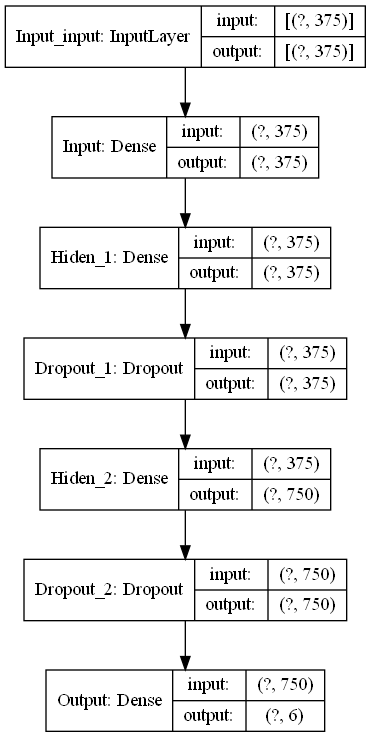

In [72]:
tf.keras.utils.plot_model(model_ANN, to_file= os.path.join(path_models, 'Model_ANN' + norm_type + model_surname + '.png'), show_shapes=True)

### Understanding the column "Param":

- 141,000 parameters is the result of 375 neurons with 375 features + 375  bias values
- 141,000 parameters is the result of 375 neurons with 375 features + 375  bias values
- 282,000 parameters is the result of 750 neurons with 375 features + 750 bias values
- 3,755   parameters is the result of 750 neurons with 5 features  + 5  bias values

In [73]:
print("\n==================================")
print("Training set\n")

print(f'X_train.........: {np.shape(X_train)}')
print(f'y_train.........: {np.shape(y_train)}')
print(f'y_train_OHEV....: {np.shape(y_train_OHEV)}')

print("\n==================================")
print("Testing set\n")

print(f'X_test..........: {np.shape(X_test)}')
print(f'y_test..........: {np.shape(y_test)}')
print(f'y_test_OHEV.....: {np.shape(y_test_OHEV)}')

print("\n==================================")
print("Validation set\n")

print(f'X_val_norm......: {np.shape(X_val_norm)}')
print(f'y_val...........: {np.shape(y_val)}')
print(f'y_OHEV_val......: {np.shape(y_OHEV_val)}')


Training set

X_train.........: (27909, 375)
y_train.........: (27909,)
y_train_OHEV....: (27909, 6)

Testing set

X_test..........: (3101, 375)
y_test..........: (3101,)
y_test_OHEV.....: (3101, 6)

Validation set

X_val_norm......: (3346, 375)
y_val...........: (3346,)
y_OHEV_val......: (3346, 6)


In [74]:
y_train_OHEV

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [75]:
batch_size_ANN = 32
epochs_ANN     = 350

history_ANN    = model_ANN.fit(X_train, y_train_OHEV,
                               batch_size      = batch_size_ANN,
                               epochs          = epochs_ANN,
                               verbose         = 1,
                               validation_data = (X_test, y_test_OHEV),
                               callbacks       = callbacks_list)

Epoch 1/350
860/873 [============================>.] - ETA: 0s - loss: 0.6989 - accuracy: 0.7555
Epoch 00001: val_accuracy improved from -inf to 0.86327, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_std_windowed.hdf5
873/873 [==============================] - 3s 3ms/step - loss: 0.6967 - accuracy: 0.7560 - val_loss: 0.3988 - val_accuracy: 0.8633
Epoch 2/350
864/873 [============================>.] - ETA: 0s - loss: 0.3706 - accuracy: 0.8694
Epoch 00002: val_accuracy improved from 0.86327 to 0.89165, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_std_windowed.hdf5
873/873 [==============================] - 3s 3ms/step - loss: 0.3701 - accuracy: 0.8697 - val_loss: 0.3124 - val_accuracy: 0.8916
Epoch 3/350
862/873 [============================>.] - ETA: 0s - loss: 0.2690 - accuracy: 0.9073
Epoch 00003: val_accuracy improved from 0.89165 to

851/873 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 00049: val_accuracy did not improve from 0.96098
873/873 [==============================] - 2s 2ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.2030 - val_accuracy: 0.9610
Epoch 50/350
858/873 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9999
Epoch 00050: val_accuracy did not improve from 0.96098
873/873 [==============================] - 2s 2ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.2018 - val_accuracy: 0.9587
Epoch 51/350
861/873 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 00051: val_accuracy did not improve from 0.96098
873/873 [==============================] - 2s 3ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.2017 - val_accuracy: 0.9597
Epoch 52/350
860/873 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9996
Epoch 00052: val_accuracy improved from 0.96098 to 0.96227, sav

Epoch 76/350
861/873 [============================>.] - ETA: 0s - loss: 5.3907e-04 - accuracy: 0.9999
Epoch 00076: val_accuracy did not improve from 0.96388
873/873 [==============================] - 2s 3ms/step - loss: 5.3560e-04 - accuracy: 0.9999 - val_loss: 0.2107 - val_accuracy: 0.9613
Epoch 77/350
859/873 [============================>.] - ETA: 0s - loss: 4.8709e-04 - accuracy: 1.0000
Epoch 00077: val_accuracy did not improve from 0.96388
873/873 [==============================] - 2s 3ms/step - loss: 4.9158e-04 - accuracy: 1.0000 - val_loss: 0.2117 - val_accuracy: 0.9607
Epoch 78/350
862/873 [============================>.] - ETA: 0s - loss: 4.8578e-04 - accuracy: 1.0000
Epoch 00078: val_accuracy did not improve from 0.96388
873/873 [==============================] - 2s 3ms/step - loss: 4.9310e-04 - accuracy: 1.0000 - val_loss: 0.2168 - val_accuracy: 0.9619
Epoch 79/350
854/873 [============================>.] - ETA: 0s - loss: 4.8520e-04 - accuracy: 1.0000
Epoch 00079: val_accur

869/873 [============================>.] - ETA: 0s - loss: 3.3889e-04 - accuracy: 1.0000
Epoch 00104: val_accuracy did not improve from 0.96388
873/873 [==============================] - 2s 3ms/step - loss: 3.3811e-04 - accuracy: 1.0000 - val_loss: 0.2286 - val_accuracy: 0.9607
Epoch 105/350
864/873 [============================>.] - ETA: 0s - loss: 3.8578e-04 - accuracy: 1.0000
Epoch 00105: val_accuracy did not improve from 0.96388
873/873 [==============================] - 2s 3ms/step - loss: 3.8442e-04 - accuracy: 1.0000 - val_loss: 0.2264 - val_accuracy: 0.9597
Epoch 106/350
866/873 [============================>.] - ETA: 0s - loss: 3.5611e-04 - accuracy: 1.0000
Epoch 00106: val_accuracy did not improve from 0.96388
873/873 [==============================] - 2s 3ms/step - loss: 3.5436e-04 - accuracy: 1.0000 - val_loss: 0.2272 - val_accuracy: 0.9600
Epoch 107/350
872/873 [============================>.] - ETA: 0s - loss: 2.9147e-04 - accuracy: 1.0000
Epoch 00107: val_accuracy did no

859/873 [============================>.] - ETA: 0s - loss: 3.0631e-04 - accuracy: 0.9999
Epoch 00132: val_accuracy did not improve from 0.96388
873/873 [==============================] - 2s 3ms/step - loss: 3.1047e-04 - accuracy: 0.9999 - val_loss: 0.2342 - val_accuracy: 0.9603
Epoch 133/350
871/873 [============================>.] - ETA: 0s - loss: 2.2394e-04 - accuracy: 1.0000
Epoch 00133: val_accuracy did not improve from 0.96388
873/873 [==============================] - 2s 3ms/step - loss: 2.2407e-04 - accuracy: 1.0000 - val_loss: 0.2380 - val_accuracy: 0.9600
Epoch 134/350
855/873 [============================>.] - ETA: 0s - loss: 2.3235e-04 - accuracy: 1.0000
Epoch 00134: val_accuracy did not improve from 0.96388
873/873 [==============================] - 2s 3ms/step - loss: 2.2913e-04 - accuracy: 1.0000 - val_loss: 0.2338 - val_accuracy: 0.9603
Epoch 135/350
861/873 [============================>.] - ETA: 0s - loss: 1.9737e-04 - accuracy: 1.0000
Epoch 00135: val_accuracy did no

864/873 [============================>.] - ETA: 0s - loss: 3.0919e-04 - accuracy: 0.9999
Epoch 00160: val_accuracy did not improve from 0.96388
873/873 [==============================] - 2s 3ms/step - loss: 3.0691e-04 - accuracy: 0.9999 - val_loss: 0.2441 - val_accuracy: 0.9613
Epoch 161/350
867/873 [============================>.] - ETA: 0s - loss: 3.2864e-04 - accuracy: 0.9999
Epoch 00161: val_accuracy did not improve from 0.96388
873/873 [==============================] - 2s 3ms/step - loss: 3.2793e-04 - accuracy: 0.9999 - val_loss: 0.2387 - val_accuracy: 0.9603
Epoch 162/350
870/873 [============================>.] - ETA: 0s - loss: 2.0736e-04 - accuracy: 1.0000
Epoch 00162: val_accuracy did not improve from 0.96388
873/873 [==============================] - 2s 3ms/step - loss: 2.0705e-04 - accuracy: 1.0000 - val_loss: 0.2354 - val_accuracy: 0.9607
Epoch 163/350
869/873 [============================>.] - ETA: 0s - loss: 2.3371e-04 - accuracy: 1.0000
Epoch 00163: val_accuracy did no

862/873 [============================>.] - ETA: 0s - loss: 1.6167e-04 - accuracy: 1.0000
Epoch 00188: val_accuracy did not improve from 0.96388
873/873 [==============================] - 2s 3ms/step - loss: 1.6235e-04 - accuracy: 1.0000 - val_loss: 0.2506 - val_accuracy: 0.9607
Epoch 189/350
854/873 [============================>.] - ETA: 0s - loss: 1.6011e-04 - accuracy: 1.0000
Epoch 00189: val_accuracy did not improve from 0.96388
873/873 [==============================] - 2s 3ms/step - loss: 1.5734e-04 - accuracy: 1.0000 - val_loss: 0.2459 - val_accuracy: 0.9603
Epoch 190/350
859/873 [============================>.] - ETA: 0s - loss: 3.5083e-04 - accuracy: 0.9999
Epoch 00190: val_accuracy did not improve from 0.96388
873/873 [==============================] - 3s 3ms/step - loss: 3.4597e-04 - accuracy: 0.9999 - val_loss: 0.2480 - val_accuracy: 0.9607
Epoch 191/350
856/873 [============================>.] - ETA: 0s - loss: 2.4312e-04 - accuracy: 0.9999
Epoch 00191: val_accuracy did no

858/873 [============================>.] - ETA: 0s - loss: 1.6866e-04 - accuracy: 1.0000
Epoch 00216: val_accuracy did not improve from 0.96388
873/873 [==============================] - 2s 3ms/step - loss: 1.6664e-04 - accuracy: 1.0000 - val_loss: 0.2531 - val_accuracy: 0.9600
Epoch 217/350
863/873 [============================>.] - ETA: 0s - loss: 9.9884e-05 - accuracy: 1.0000
Epoch 00217: val_accuracy did not improve from 0.96388
873/873 [==============================] - 2s 3ms/step - loss: 9.9452e-05 - accuracy: 1.0000 - val_loss: 0.2501 - val_accuracy: 0.9623
Epoch 218/350
865/873 [============================>.] - ETA: 0s - loss: 1.1447e-04 - accuracy: 1.0000
Epoch 00218: val_accuracy did not improve from 0.96388
873/873 [==============================] - 2s 3ms/step - loss: 1.1643e-04 - accuracy: 1.0000 - val_loss: 0.2506 - val_accuracy: 0.9597
Epoch 219/350
861/873 [============================>.] - ETA: 0s - loss: 3.2286e-04 - accuracy: 0.9999
Epoch 00219: val_accuracy did no

Epoch 244/350
869/873 [============================>.] - ETA: 0s - loss: 1.2592e-04 - accuracy: 1.0000
Epoch 00244: val_accuracy did not improve from 0.96421
873/873 [==============================] - 2s 3ms/step - loss: 1.2596e-04 - accuracy: 1.0000 - val_loss: 0.2470 - val_accuracy: 0.9610
Epoch 245/350
857/873 [============================>.] - ETA: 0s - loss: 1.7489e-04 - accuracy: 1.0000
Epoch 00245: val_accuracy did not improve from 0.96421
873/873 [==============================] - 2s 3ms/step - loss: 1.7267e-04 - accuracy: 1.0000 - val_loss: 0.2455 - val_accuracy: 0.9626
Epoch 246/350
859/873 [============================>.] - ETA: 0s - loss: 1.3847e-04 - accuracy: 1.0000
Epoch 00246: val_accuracy did not improve from 0.96421
873/873 [==============================] - 3s 3ms/step - loss: 1.3723e-04 - accuracy: 1.0000 - val_loss: 0.2494 - val_accuracy: 0.9616
Epoch 247/350
860/873 [============================>.] - ETA: 0s - loss: 1.2822e-04 - accuracy: 1.0000
Epoch 00247: val_a

Epoch 272/350
861/873 [============================>.] - ETA: 0s - loss: 9.6957e-05 - accuracy: 1.0000
Epoch 00272: val_accuracy did not improve from 0.96421
873/873 [==============================] - 2s 3ms/step - loss: 9.8445e-05 - accuracy: 1.0000 - val_loss: 0.2561 - val_accuracy: 0.9616
Epoch 273/350
859/873 [============================>.] - ETA: 0s - loss: 8.5278e-05 - accuracy: 1.0000
Epoch 00273: val_accuracy did not improve from 0.96421
873/873 [==============================] - 2s 3ms/step - loss: 8.4638e-05 - accuracy: 1.0000 - val_loss: 0.2552 - val_accuracy: 0.9619
Epoch 274/350
860/873 [============================>.] - ETA: 0s - loss: 7.3668e-05 - accuracy: 1.0000
Epoch 00274: val_accuracy did not improve from 0.96421
873/873 [==============================] - 2s 3ms/step - loss: 7.3186e-05 - accuracy: 1.0000 - val_loss: 0.2557 - val_accuracy: 0.9623
Epoch 275/350
867/873 [============================>.] - ETA: 0s - loss: 5.3192e-05 - accuracy: 1.0000
Epoch 00275: val_a

Epoch 300/350
868/873 [============================>.] - ETA: 0s - loss: 4.9929e-05 - accuracy: 1.0000
Epoch 00300: val_accuracy did not improve from 0.96421
873/873 [==============================] - 2s 3ms/step - loss: 4.9854e-05 - accuracy: 1.0000 - val_loss: 0.2573 - val_accuracy: 0.9603
Epoch 301/350
863/873 [============================>.] - ETA: 0s - loss: 6.4356e-05 - accuracy: 1.0000
Epoch 00301: val_accuracy did not improve from 0.96421
873/873 [==============================] - 2s 3ms/step - loss: 6.3837e-05 - accuracy: 1.0000 - val_loss: 0.2583 - val_accuracy: 0.9610
Epoch 302/350
856/873 [============================>.] - ETA: 0s - loss: 7.5946e-05 - accuracy: 1.0000
Epoch 00302: val_accuracy did not improve from 0.96421
873/873 [==============================] - 2s 3ms/step - loss: 7.6145e-05 - accuracy: 1.0000 - val_loss: 0.2613 - val_accuracy: 0.9607
Epoch 303/350
867/873 [============================>.] - ETA: 0s - loss: 1.3486e-04 - accuracy: 1.0000
Epoch 00303: val_a

Epoch 328/350
871/873 [============================>.] - ETA: 0s - loss: 1.6862e-04 - accuracy: 1.0000
Epoch 00328: val_accuracy did not improve from 0.96421
873/873 [==============================] - 2s 3ms/step - loss: 1.6848e-04 - accuracy: 1.0000 - val_loss: 0.2665 - val_accuracy: 0.9613
Epoch 329/350
858/873 [============================>.] - ETA: 0s - loss: 6.4984e-05 - accuracy: 1.0000
Epoch 00329: val_accuracy did not improve from 0.96421
873/873 [==============================] - 2s 3ms/step - loss: 6.5848e-05 - accuracy: 1.0000 - val_loss: 0.2654 - val_accuracy: 0.9613
Epoch 330/350
862/873 [============================>.] - ETA: 0s - loss: 5.1925e-05 - accuracy: 1.0000
Epoch 00330: val_accuracy did not improve from 0.96421
873/873 [==============================] - 2s 3ms/step - loss: 5.1834e-05 - accuracy: 1.0000 - val_loss: 0.2637 - val_accuracy: 0.9616
Epoch 331/350
858/873 [============================>.] - ETA: 0s - loss: 2.4992e-04 - accuracy: 0.9999
Epoch 00331: val_a

In [76]:
score_ANN = model_ANN.evaluate(X_test, y_test_OHEV, verbose=0, batch_size = 32)
print('Test loss:', score_ANN[0])
print('Test accuracy:', score_ANN[1])

Test loss: 0.2583782970905304
Test accuracy: 0.9616252779960632


In [77]:
score_ANN[1]

0.9616252779960632

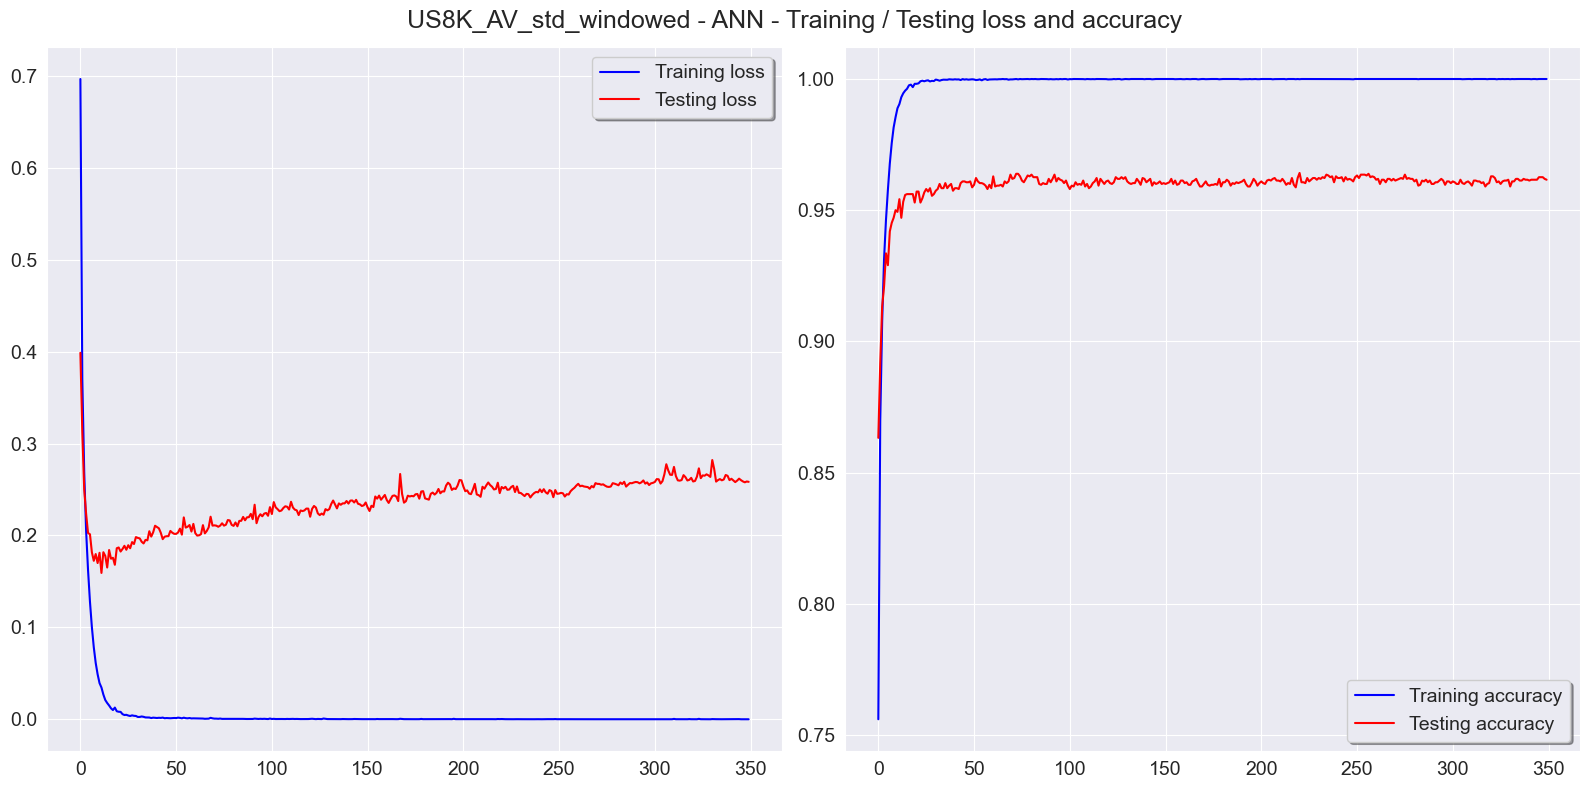

In [78]:
picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

fig, ax = plt.subplots(1,2, figsize=(16,8))
fig.suptitle(nom_dataset + norm_type + model_surname + ' - ANN - Training / Testing loss and accuracy', fontsize = 18)
ax[0].plot(history_ANN.history['loss'], color='b', label="Training loss")
ax[0].plot(history_ANN.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True, fontsize = 14)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)

ax[1].plot(history_ANN.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_ANN.history['val_accuracy'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True, fontsize = 14)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

fig.tight_layout()
plt.savefig(os.path.join(path_pic, picture_name))

In [79]:
# save model and architecture to single file (not the best model though)

#model_ANN.save(path_models + "Model_ANN.h5")
#print("Saved model to disk")

In [80]:
y_pred_ANN = np.argmax(model_ANN.predict(X_val_norm),axis=1)
y_pred_ANN

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

In [81]:
y_test_enc = np.argmax(y_OHEV_val, axis=1)
y_test_enc

array([3, 3, 3, ..., 4, 4, 4], dtype=int64)

In [82]:
metrics_set_ANN = classification_report(y_test_enc, y_pred_ANN, target_names=nom_classes)
print(metrics_set_ANN)

                  precision    recall  f1-score   support

      background       0.88      0.81      0.84       756
        car_horn       0.83      0.92      0.88       252
children_playing       0.72      0.78      0.75       700
        dog_bark       0.74      0.81      0.78       700
         silence       0.73      0.73      0.73       336
           siren       0.90      0.75      0.82       602

        accuracy                           0.79      3346
       macro avg       0.80      0.80      0.80      3346
    weighted avg       0.80      0.79      0.80      3346



In [83]:
# Load the model with the highest accuracy

model_ANN_saved = load_model(os.path.join(path_models, 'Model_ANN_weights_0_best' + norm_type + model_surname + '.hdf5'))
model_ANN_saved.summary()

Model: "ANN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 375)               141000    
_________________________________________________________________
Hiden_1 (Dense)              (None, 375)               141000    
_________________________________________________________________
Dropout_1 (Dropout)          (None, 375)               0         
_________________________________________________________________
Hiden_2 (Dense)              (None, 750)               282000    
_________________________________________________________________
Dropout_2 (Dropout)          (None, 750)               0         
_________________________________________________________________
Output (Dense)               (None, 6)                 4506      
Total params: 568,506
Trainable params: 568,506
Non-trainable params: 0
_______________________________________________________

In [84]:
score_ANN_saved = model_ANN_saved.evaluate(X_val_norm, y_OHEV_val, verbose=1, batch_size = 32)
print('Test loss:', score_ANN_saved[0])
print('Test accuracy:', score_ANN_saved[1])

105/105 [==============================] - 0s 2ms/step - loss: 2.9506 - accuracy: 0.7965
Test loss: 2.950645685195923
Test accuracy: 0.7964733839035034


In [85]:
y_pred_ANN_saved = np.argmax(model_ANN_saved.predict(X_val_norm),axis=1)
y_pred_ANN_saved

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

In [86]:
metrics_set_ANN_saved = classification_report(y_test_enc, y_pred_ANN_saved, target_names=nom_classes)
print(metrics_set_ANN_saved)

                  precision    recall  f1-score   support

      background       0.90      0.81      0.85       756
        car_horn       0.84      0.92      0.88       252
children_playing       0.70      0.80      0.75       700
        dog_bark       0.76      0.80      0.78       700
         silence       0.73      0.75      0.74       336
           siren       0.88      0.75      0.81       602

        accuracy                           0.80      3346
       macro avg       0.80      0.80      0.80      3346
    weighted avg       0.80      0.80      0.80      3346



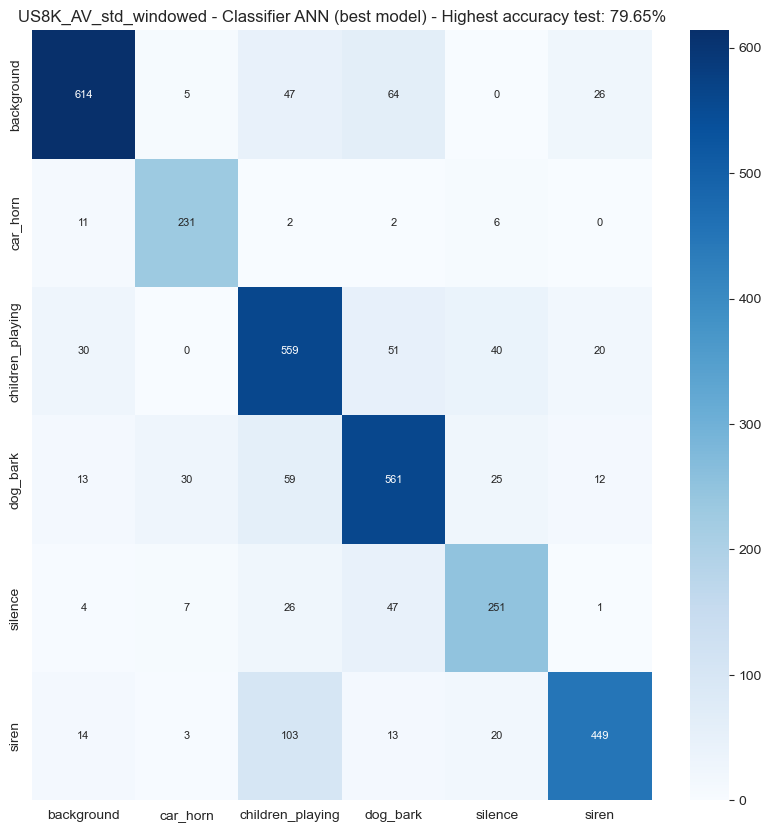

In [87]:
# Simple confusion matrix

picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

conf_matrix = metrics.confusion_matrix(y_test_enc, y_pred_ANN_saved)
title = nom_dataset + norm_type + model_surname + ' - Classifier ANN (best model) - Highest accuracy test: '+ str("{:0.2f}%".format(score_ANN_saved[1]*100))

plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='g', 
            cmap=cmap_cm, 
            annot_kws={"size": 8}, 
            xticklabels=nom_classes, 
            yticklabels=nom_classes)
plt.title(title, fontsize = 12)
plt.savefig(os.path.join(path_pic, picture_name))
plt.show()

In [88]:
model_ANN_saved.layers

In [89]:
for layer in model_ANN_saved.layers:
    print(layer.get_weights())

[array([[ 8.60434026e-02, -3.23027596e-02,  1.54248411e-02, ...,
         9.32446718e-02, -5.04881181e-02, -8.47131163e-02],
       [ 1.75083708e-02,  1.20252259e-01,  6.06274009e-02, ...,
         9.60133225e-03, -3.38306874e-02,  1.06871836e-01],
       [-5.75113073e-02,  3.00359558e-02,  7.97748938e-02, ...,
         7.31457956e-03, -5.22944257e-02,  4.60895002e-02],
       ...,
       [-1.54727800e-02,  1.14724919e-01, -4.50734720e-02, ...,
        -2.58587245e-02,  5.21447472e-02, -1.64158959e-02],
       [-1.43951485e-02,  9.49974544e-03, -7.08605919e-04, ...,
         4.04755510e-02,  1.30895106e-02, -3.31108272e-02],
       [-6.46284893e-02,  4.57120659e-05, -1.02865882e-02, ...,
        -5.65301552e-02, -8.85195434e-02, -4.60295891e-03]], dtype=float32), array([-9.67066456e-03, -2.18875445e-02,  2.55880615e-04, -1.81509629e-02,
       -3.66832912e-02, -3.03020049e-03,  2.71478109e-03, -3.55474465e-02,
       -8.58575292e-03, -2.01514945e-03, -8.82257149e-03,  2.87704840e-02,
 

In [90]:
weights = model_ANN_saved.get_layer('Output').get_weights()
weights[1]

array([ 0.0066599 , -0.00759209,  0.02160644, -0.01267812, -0.00977838,
       -0.00616209], dtype=float32)

### CNN 1D

In [91]:
# CNN (Convolutional Neural Network) using Tensorflow

def build_CNN_1D_model(model_name: str, neurons: int):
    
    model = Sequential(name = model_name)

    # 1st conv layer
    model.add(Conv1D(28, 7, activation = 'relu', input_shape = (neurons, 1), name = 'Conv1D_1'))
    #model.add(MaxPooling1D(3, name = 'MaxPool1D_1'))

    # 2nd conv layer
    model.add(Conv1D(34, 5, activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.01), padding='same', name = 'Conv1D_2'))
    #model.add(MaxPooling1D(2, name = 'MaxPool1D_2'))
    
    # 3nd conv layer 
    model.add(Conv1D(56, 3, activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.01), padding='same', name = 'Conv1D_3'))
    model.add(MaxPooling1D(2, name = 'MaxPool1D_3'))
    model.add(Dropout(0.2, name = 'Dropout_1'))
    
    # 4nd conv layer + dropout 20%
    model.add(Flatten())
    model.add(Dense(50, name = 'Dense'))

    # Final classification layer, with 1 neuron for each output class. Softmax divides the probability of each class.
    model.add(Dense(num_classes, activation = 'softmax', name = 'Output'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adamax', metrics = ['accuracy'])

    return model

In [92]:
monitor = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=50, verbose=1, mode='auto', restore_best_weights=True)

if not os.path.exists(path_models):
    os.makedirs(path_models)
    
filepath       = os.path.join(path_models, 'Model_CNN_1D_weights_0_best' + norm_type + model_surname + '.hdf5')
checkpoint     = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint, monitor]

In [93]:
model_CNN_1D = build_CNN_1D_model('CNN_1D', neurons = n_dim)
model_CNN_1D.summary()

Model: "CNN_1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 369, 28)           224       
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 369, 34)           4794      
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 369, 56)           5768      
_________________________________________________________________
MaxPool1D_3 (MaxPooling1D)   (None, 184, 56)           0         
_________________________________________________________________
Dropout_1 (Dropout)          (None, 184, 56)           0         
_________________________________________________________________
flatten (Flatten)            (None, 10304)             0         
_________________________________________________________________
Dense (Dense)                (None, 50)                51525

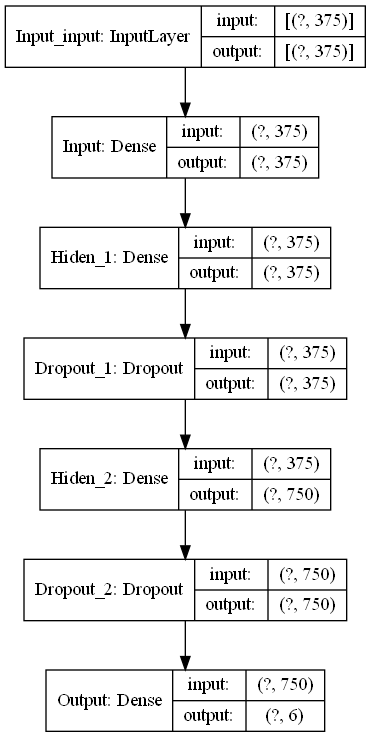

In [94]:
tf.keras.utils.plot_model(model_ANN, to_file= os.path.join(path_models, 'Model_CNN_1D' + norm_type + model_surname + '.png'), show_shapes=True)

### Understanding the column "Param":

1. For `Conv1D` layer:
   - The number of parameters for a `Conv1D` layer is calculated as `(kernel_size * input_channels + 1) * output_channels`, where `kernel_size` is the size of the convolutional kernel, `input_channels` is the number of input channels (1 in this case), and `output_channels` is the number of output channels.

2. For `Dense` layer:
   - The number of parameters for a `Dense` layer is calculated as `(input_units + 1) * output_units`, where `input_units` is the number of input units and `output_units` is the number of output units.
   
3. In the calculation of parameters for a convolutional layer, the term "channels" refers to the number of filters used in that layer.

- 224   parameters is the result of 28 filters * (7 kernels * 1 filter + 1)
- 4,794 parameters is the result of 34 filter * (5 kernels * 28 filters + 1)
- 5,768  parameters is the result of 56 filters * (3 kernels * 34 filters + 1)
- 515,250  parameters is the result of 50 neurons with 10,304 features + 50 bias values
- 255    parameters is the result of 5 neurons with 50 features + 5 bias values

In [95]:
batch_size_CNN_1D = 32
epochs_CNN_1D     = 150

history_CNN_1D    = model_CNN_1D.fit(X_train[..., np.newaxis], y_train_OHEV,
                                     batch_size      = batch_size_CNN_1D,
                                     epochs          = epochs_CNN_1D,
                                     verbose         = 1,
                                     validation_data =(X_test[..., np.newaxis], y_test_OHEV),
                                     callbacks       = callbacks_list)

Epoch 1/150
873/873 [==============================] - ETA: 0s - loss: 0.6091 - accuracy: 0.8108
Epoch 00001: val_accuracy improved from -inf to 0.87101, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_CNN_1D_weights_0_best_std_windowed.hdf5
873/873 [==============================] - 6s 7ms/step - loss: 0.6091 - accuracy: 0.8108 - val_loss: 0.4368 - val_accuracy: 0.8710
Epoch 2/150
871/873 [============================>.] - ETA: 0s - loss: 0.4208 - accuracy: 0.8731
Epoch 00002: val_accuracy improved from 0.87101 to 0.89004, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_CNN_1D_weights_0_best_std_windowed.hdf5
873/873 [==============================] - 6s 7ms/step - loss: 0.4206 - accuracy: 0.8732 - val_loss: 0.3862 - val_accuracy: 0.8900
Epoch 3/150
873/873 [==============================] - ETA: 0s - loss: 0.3622 - accuracy: 0.8942
Epoch 00003: val_accuracy improved from 0.89

Epoch 23/150
873/873 [==============================] - ETA: 0s - loss: 0.1204 - accuracy: 0.9716
Epoch 00023: val_accuracy did not improve from 0.93873
873/873 [==============================] - 7s 7ms/step - loss: 0.1204 - accuracy: 0.9716 - val_loss: 0.2635 - val_accuracy: 0.9349
Epoch 24/150
870/873 [============================>.] - ETA: 0s - loss: 0.1152 - accuracy: 0.9738
Epoch 00024: val_accuracy improved from 0.93873 to 0.94002, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_CNN_1D_weights_0_best_std_windowed.hdf5
873/873 [==============================] - 6s 7ms/step - loss: 0.1152 - accuracy: 0.9738 - val_loss: 0.2606 - val_accuracy: 0.9400
Epoch 25/150
867/873 [============================>.] - ETA: 0s - loss: 0.1102 - accuracy: 0.9768
Epoch 00025: val_accuracy improved from 0.94002 to 0.94034, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_CNN_1D_weights_0_best_s

Epoch 49/150
867/873 [============================>.] - ETA: 0s - loss: 0.0738 - accuracy: 0.9855
Epoch 00049: val_accuracy did not improve from 0.94357
873/873 [==============================] - 6s 7ms/step - loss: 0.0737 - accuracy: 0.9856 - val_loss: 0.2722 - val_accuracy: 0.9391
Epoch 50/150
873/873 [==============================] - ETA: 0s - loss: 0.0746 - accuracy: 0.9850
Epoch 00050: val_accuracy did not improve from 0.94357
873/873 [==============================] - 5s 6ms/step - loss: 0.0746 - accuracy: 0.9850 - val_loss: 0.2896 - val_accuracy: 0.9410
Epoch 51/150
871/873 [============================>.] - ETA: 0s - loss: 0.0698 - accuracy: 0.9874
Epoch 00051: val_accuracy improved from 0.94357 to 0.94389, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_CNN_1D_weights_0_best_std_windowed.hdf5
873/873 [==============================] - 5s 6ms/step - loss: 0.0698 - accuracy: 0.9874 - val_loss: 0.2704 - val_accuracy: 0.9439


Epoch 105/150
872/873 [============================>.] - ETA: 0s - loss: 0.0471 - accuracy: 0.9919
Epoch 00105: val_accuracy did not improve from 0.94776
873/873 [==============================] - 6s 7ms/step - loss: 0.0471 - accuracy: 0.9919 - val_loss: 0.2723 - val_accuracy: 0.9420
Epoch 106/150
870/873 [============================>.] - ETA: 0s - loss: 0.0462 - accuracy: 0.9923
Epoch 00106: val_accuracy did not improve from 0.94776
873/873 [==============================] - 6s 7ms/step - loss: 0.0462 - accuracy: 0.9923 - val_loss: 0.2854 - val_accuracy: 0.9449
Epoch 107/150
867/873 [============================>.] - ETA: 0s - loss: 0.0463 - accuracy: 0.9923
Epoch 00107: val_accuracy did not improve from 0.94776
873/873 [==============================] - 6s 6ms/step - loss: 0.0463 - accuracy: 0.9923 - val_loss: 0.2734 - val_accuracy: 0.9455
Epoch 108/150
870/873 [============================>.] - ETA: 0s - loss: 0.0465 - accuracy: 0.9923
Epoch 00108: val_accuracy did not improve from

Epoch 134/150
870/873 [============================>.] - ETA: 0s - loss: 0.0401 - accuracy: 0.9934
Epoch 00134: val_accuracy did not improve from 0.94776
873/873 [==============================] - 6s 6ms/step - loss: 0.0401 - accuracy: 0.9934 - val_loss: 0.2966 - val_accuracy: 0.9458
Epoch 135/150
873/873 [==============================] - ETA: 0s - loss: 0.0416 - accuracy: 0.9931
Epoch 00135: val_accuracy did not improve from 0.94776
873/873 [==============================] - 6s 6ms/step - loss: 0.0416 - accuracy: 0.9931 - val_loss: 0.2909 - val_accuracy: 0.9420
Epoch 136/150
865/873 [============================>.] - ETA: 0s - loss: 0.0415 - accuracy: 0.9935
Epoch 00136: val_accuracy did not improve from 0.94776
873/873 [==============================] - 6s 6ms/step - loss: 0.0414 - accuracy: 0.9936 - val_loss: 0.3004 - val_accuracy: 0.9455
Epoch 137/150
868/873 [============================>.] - ETA: 0s - loss: 0.0416 - accuracy: 0.9931
Epoch 00137: val_accuracy did not improve from

In [96]:
score_CNN_1D = model_CNN_1D.evaluate(X_test[..., np.newaxis], y_test_OHEV, verbose=0, batch_size = 32)
print('Test loss:', score_CNN_1D[0])
print('Test accuracy:', score_CNN_1D[1])

Test loss: 0.28005144000053406
Test accuracy: 0.9477587938308716


In [97]:
score_CNN_1D[1]

0.9477587938308716

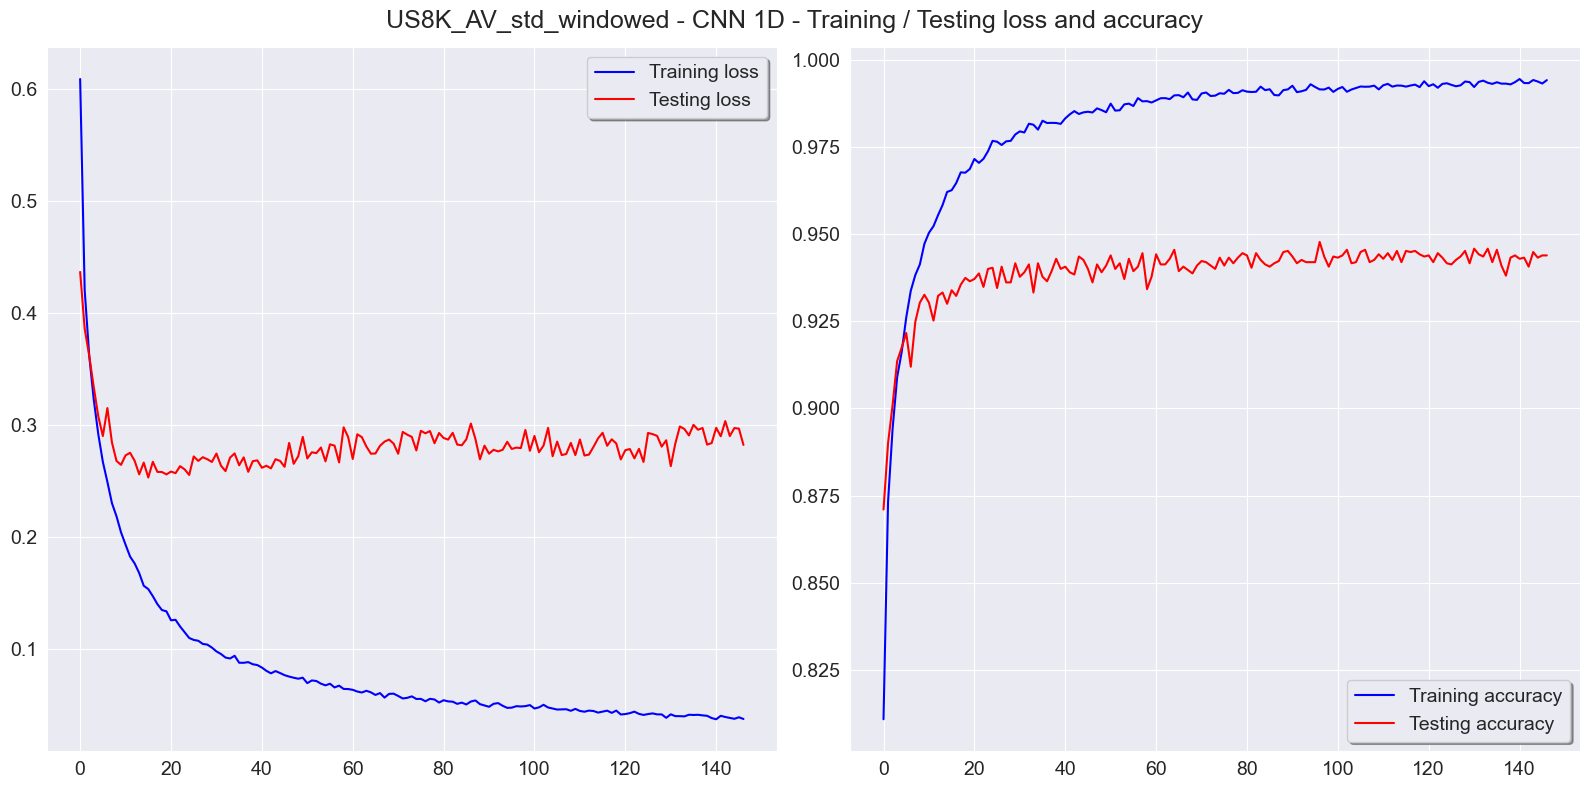

In [98]:
picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

fig, ax = plt.subplots(1,2, figsize=(16,8))
fig.suptitle(nom_dataset + norm_type + model_surname + ' - CNN 1D - Training / Testing loss and accuracy', fontsize = 18)
ax[0].plot(history_CNN_1D.history['loss'], color='b', label="Training loss")
ax[0].plot(history_CNN_1D.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True, fontsize = 14)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)

ax[1].plot(history_CNN_1D.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_CNN_1D.history['val_accuracy'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True, fontsize = 14)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

fig.tight_layout()
plt.savefig(os.path.join(path_pic, picture_name))

In [99]:
y_pred_CNN_1D = np.argmax(model_CNN_1D.predict(X_val_norm[..., np.newaxis]),axis=1)
y_pred_CNN_1D

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

In [100]:
y_test_enc = np.argmax(y_OHEV_val, axis=1)
y_test_enc

array([3, 3, 3, ..., 4, 4, 4], dtype=int64)

In [101]:
metrics_set_CNN_1D = classification_report(y_test_enc, y_pred_CNN_1D, target_names=nom_classes)
print(metrics_set_CNN_1D)

                  precision    recall  f1-score   support

      background       0.86      0.80      0.83       756
        car_horn       0.85      0.91      0.88       252
children_playing       0.74      0.77      0.75       700
        dog_bark       0.70      0.85      0.77       700
         silence       0.75      0.67      0.71       336
           siren       0.91      0.76      0.83       602

        accuracy                           0.79      3346
       macro avg       0.80      0.79      0.79      3346
    weighted avg       0.80      0.79      0.79      3346



In [102]:
# Load the model with the highest accuracy

model_CNN_1D_saved = load_model(os.path.join(path_models, 'Model_CNN_1D_weights_0_best' + norm_type + model_surname + '.hdf5'))
model_CNN_1D_saved.summary()

Model: "CNN_1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 369, 28)           224       
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 369, 34)           4794      
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 369, 56)           5768      
_________________________________________________________________
MaxPool1D_3 (MaxPooling1D)   (None, 184, 56)           0         
_________________________________________________________________
Dropout_1 (Dropout)          (None, 184, 56)           0         
_________________________________________________________________
flatten (Flatten)            (None, 10304)             0         
_________________________________________________________________
Dense (Dense)                (None, 50)                51525

In [103]:
score_CNN_1D_saved = model_CNN_1D_saved.evaluate(X_val_norm[..., np.newaxis], y_OHEV_val, verbose=1, batch_size = 32)
print('Test loss:', score_CNN_1D_saved[0])
print('Test accuracy:', score_CNN_1D_saved[1])

105/105 [==============================] - 0s 4ms/step - loss: 2.1328 - accuracy: 0.7914
Test loss: 2.1327853202819824
Test accuracy: 0.7913926839828491


In [104]:
y_pred_CNN_1D_saved = np.argmax(model_CNN_1D_saved.predict(X_val_norm[..., np.newaxis]),axis=1)
y_pred_CNN_1D_saved

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

In [105]:
metrics_set_CNN_1D_saved = classification_report(y_test_enc, y_pred_CNN_1D_saved, target_names=nom_classes)
print(metrics_set_CNN_1D_saved)

                  precision    recall  f1-score   support

      background       0.86      0.80      0.83       756
        car_horn       0.85      0.91      0.88       252
children_playing       0.74      0.77      0.75       700
        dog_bark       0.70      0.85      0.77       700
         silence       0.75      0.67      0.71       336
           siren       0.91      0.76      0.83       602

        accuracy                           0.79      3346
       macro avg       0.80      0.79      0.79      3346
    weighted avg       0.80      0.79      0.79      3346



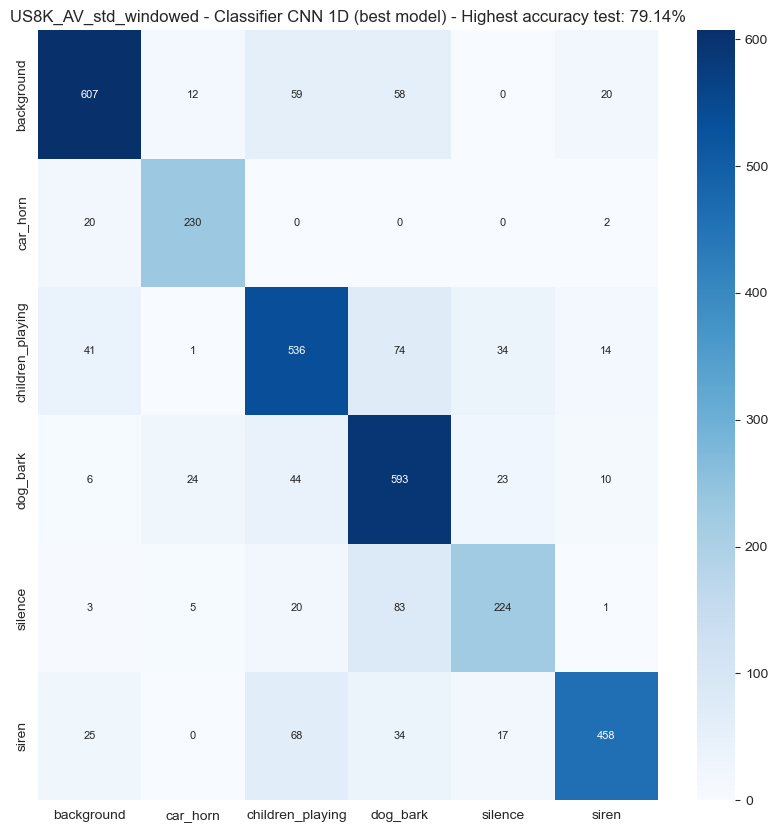

In [106]:
# Simple confusion matrix

picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

conf_matrix = metrics.confusion_matrix(y_test_enc, y_pred_CNN_1D_saved)
title = nom_dataset + norm_type + model_surname + ' - Classifier CNN 1D (best model) - Highest accuracy test: '+ str("{:0.2f}%".format(score_CNN_1D_saved[1]*100))

plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='g', 
            cmap=cmap_cm, 
            annot_kws={"size": 8}, 
            xticklabels=nom_classes, 
            yticklabels=nom_classes)
plt.title(title, fontsize = 12)
plt.savefig(os.path.join(path_pic, picture_name))
plt.show()


In [107]:
model_CNN_1D_saved.layers

In [108]:
for layer in model_CNN_1D_saved.layers:
    print(layer.get_weights())

[array([[[-0.46544674,  0.431688  ,  0.15536533,  0.10796122,
         -0.45840675, -0.6102847 , -0.7251457 , -0.0312892 ,
         -0.31508562, -0.29087225,  0.25314072,  0.09298484,
         -0.51075065,  0.13792628, -0.46989867, -0.7801054 ,
         -0.02648409, -0.54326624, -0.08252805,  0.05543854,
          0.04119245,  0.33169535,  0.39132252, -0.27874085,
         -0.63745403, -0.40064403,  0.32765707,  0.17104587]],

       [[-0.04342622, -0.0205739 ,  0.27134085,  0.07294746,
          0.3661299 ,  0.33588302, -0.3488987 , -0.37500647,
          0.4094649 ,  0.39592344, -0.32831278, -0.02694631,
         -0.17017677,  0.19230764, -0.02618945, -0.44685256,
          0.32622522, -0.5204424 ,  0.13585244,  0.28425026,
         -0.2612483 , -0.14267524, -0.10476843, -0.07890724,
         -0.16471197, -0.48213243, -0.24628845,  0.12005969]],

       [[ 0.45551422, -0.3501086 , -0.2209796 ,  0.09088959,
         -0.1460328 ,  0.06496631, -0.17014825,  0.17800848,
          0.33489

In [109]:
weights = model_CNN_1D_saved.get_layer('Output').get_weights()
weights[1]

array([-0.00633032, -0.01717515,  0.20415477, -0.13526587, -0.08291326,
       -0.0474568 ], dtype=float32)

## Metrics for the classifiers


1. Accuracy: Accuracy is a measure of how many correct predictions a model makes overall, i.e., the ratio of correct predictions to the total number of predictions. It's a commonly used metric for evaluating models, but it may not be suitable in certain situations.

2. Precision: Precision measures the ratio of true positives (correctly predicted positive instances) to all instances predicted as positive. It focuses on the accuracy of positive predictions.

3. Recall: Recall, also known as sensitivity or true positive rate, measures the ratio of true positives to all actual positive instances. It focuses on how well a model captures all the positive instances.

4. F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balanced measure that takes into account both false positives and false negatives. The F1 score is especially useful when you want to strike a balance between precision and recall.


The F1 score is a metric that combines precision and recall, and it is particularly useful in situations where class imbalance or unequal misclassification costs are present. In such contexts, the F1 score can be more informative and meaningful than accuracy.

A context where considering the F1 score makes more sense than accuracy:

**Medical Diagnosis:**

Imagine you're developing a model to diagnose a rare disease, and only 5% of the population has this disease. In this case, you have a significant class imbalance, where the majority of cases are negative (non-disease) and only a small fraction are positive (disease). If you were to use accuracy as the evaluation metric, the model could achieve a high accuracy by simply predicting "negative" for every case, because it would be correct 95% of the time due to the class imbalance. However, this would be entirely useless for detecting the actual disease.

In this scenario, you'd be more interested in the F1 score. The F1 score considers both precision and recall, helping you find a balance between correctly identifying the disease (high recall) and not making too many false positive predictions (high precision). A high F1 score in this context indicates that your model is effective at correctly identifying the disease while minimizing false alarms.

In [110]:
classifiers = ['ANN', 'CNN_1D']

In [111]:
# Pipeline to run the classifiers and their metrics

def model_classifiers(classifiers:list, 
                      db: pd.DataFrame, 
                      scalerOpt: str, 
                      use_PCA = False):
    
    # Clear the session to start a new training
    K.clear_session()
 
    es = EarlyStopping(monitor='accuracy', min_delta=0.0001, patience=50, verbose=1, mode='auto', restore_best_weights=True)
    
    count       = 1
    batch_size  = 32
    verbose     = True
    models      = []
    acc_set     = pd.DataFrame(index=None, columns=['Model',
                                                    'Fold',
                                                    'Accuracy(Train)',
                                                    'Accuracy(Val)',
                                                    'F1(Train)',
                                                    'F1(Val)', 
                                                    'Precision(Train)',
                                                    'Precision(Val)', 
                                                    'Recall(Train)',
                                                    'Recall(Val)', 
                                                    'Conf_M',
                                                    'Process_time',                                                     
                                                    'Class_report(Val)'])
    
    for fold in np.unique(db['Fold']):
        print(f"Validation fold: {fold}")

        DB_VAL = db[db['Fold'] == fold]
        DB_TRN = db[db['Fold'] != fold]

        X      = DB_TRN.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
        y      = np.array(DB_TRN.Class_categorical.to_list())
        y_OHEV = np.array(DB_TRN.Class_OHEV.to_list())

        X_val      = DB_VAL.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
        y_val      = np.array(DB_VAL.Class_categorical.to_list())
        y_OHEV_val = np.array(DB_VAL.Class_OHEV.to_list())
        
        neurons  = X.shape[1]
        
        X_statistics = pd.DataFrame({'mean': X.mean(), 'std': X.std(), 'min': X.min(), 'max': X.max()})

        X_mean   = X_statistics.values[:, 0]
        X_std    = X_statistics.values[:, 1]
        X_min    = X_statistics.values[:, 2]
        X_max    = X_statistics.values[:, 3]
        
        if scalerOpt == "normalization":
            X_train_norm = (X.values - X_min) / (X_max - X_min)
            X_val_norm   = (X_val.values - X_min) / (X_max - X_min)
            batch_type    = '_norm'
            print(f'X_train_norm shape...:{X_train_norm.shape}')
            print(f'X_val_norm shape.....:{X_val_norm.shape}\n')
            
        elif scalerOpt == "standardization":
            X_train_norm = (X.values - X_mean) / X_std
            X_val_norm   = (X_val.values - X_mean) / X_std
            batch_type    = '_std'
            print(f'X_train_norm shape...:{X_train_norm.shape}')
            print(f'X_val_norm shape.....:{X_val_norm.shape}\n')
            
        else:
            sys.exit()
            
        if use_PCA:
            pcaT = PCA()
            pcaT.fit(X_train_norm)
            ratio = pcaT.explained_variance_ratio_

            batch_type = batch_type + '_PCA'

            T           = 0.98
            current_sum = 0
            countComp   = 0

            for element in ratio:
                current_sum += element
                countComp   += 1

                if current_sum >= T:
                    break

            # Print the result
            print("Sum of elements:", current_sum)
            print("Number of elements summed:", countComp)           

            pca          = PCA(n_components = countComp)
            X_train_norm = pca.fit_transform(X_train_norm)
            X_val_norm   = pca.transform(X_val_norm)
            neurons      = countComp
        
        # The training dataset will be 10% reduced compared with the ML techniques, separating a test set to monitor
        # the accuracy during training
        X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_train_norm, y_OHEV, test_size=0.1, random_state=42, stratify=y_OHEV)

        for i in tqdm(range(len(classifiers))):
            
            name         = classifiers[i]
            model_name   = ('Model_' + classifiers[i] + '_' + str(count))
            count        = count + 1
            
            if classifiers[i] == 'ANN':
                
                filepath       = os.path.join(path_models, 'Model_ANN_weights_0_best' + norm_type + model_surname + '.hdf5')
                checkpoint     = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
                callbacks_list = [checkpoint, es]
               
                model = build_ANN_model(model_name, neurons)
                model.summary()
                print(name)
                print(np.shape(X_train_norm))    

                model.fit(X_train_norm, 
                          y_train, 
                          batch_size      = batch_size, 
                          epochs          = 350, 
                          verbose         = verbose,                               
                          validation_data = (X_test_norm, y_test),
                          callbacks       = callbacks_list)
                
                model= load_model(os.path.join(path_models, 'Model_ANN_weights_0_best' + norm_type + model_surname + '.hdf5'))
                print('Best model loaded')

            else:

                filepath       = os.path.join(path_models, 'Model_CNN_1D_weights_0_best' + norm_type + model_surname + '.hdf5')
                checkpoint     = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
                callbacks_list = [checkpoint]                

                X_train_norm = X_train_norm[..., np.newaxis]
                X_val_norm   = X_val_norm[..., np.newaxis]
                X_test_norm  = X_test_norm[..., np.newaxis]

                model = build_CNN_1D_model(model_name, neurons)
                model.summary()
                print(name)
                print(np.shape(X_train_norm))    
                
                model.fit(X_train_norm, 
                          y_train, 
                          batch_size = batch_size, 
                          epochs = 150, 
                          verbose = verbose,                          
                          validation_data = (X_test_norm, y_test),
                          callbacks       = callbacks_list)

                model= load_model(os.path.join(path_models, 'Model_CNN_1D_weights_0_best' + norm_type + model_surname + '.hdf5'))
                print('Best model loaded')

            # Get the model predictions
            y_train_enc = np.argmax(y_train, axis=1)
            y_val_enc   = np.argmax(y_OHEV_val, axis=1)

            y_train_predicted = np.argmax(model.predict(X_train_norm), axis=1)
            
            t_srt             = time.process_time_ns()
            y_val_predicted   = np.argmax(model.predict(X_val_norm), axis=1)
            t_end             = time.process_time_ns()
            proc_time         = ((t_end - t_srt) / 1000000)         
    
            # Compute the classifier metrics
            accuracy_train = metrics.accuracy_score(y_train_enc, y_train_predicted)
            accuracy_val   = metrics.accuracy_score(y_val_enc,  y_val_predicted)

            f1_Score_train = metrics.f1_score(y_train_enc, y_train_predicted, average = 'weighted')
            f1_Score_val   = metrics.f1_score(y_val_enc,  y_val_predicted,  average = 'weighted')

            precision_score_train = metrics.precision_score(y_train_enc, y_train_predicted, average = 'weighted')
            precision_score_val   = metrics.precision_score(y_val_enc,  y_val_predicted,  average = 'weighted')

            recall_score_train = metrics.recall_score(y_train_enc, y_train_predicted, average = 'weighted')
            recall_score_val   = metrics.recall_score(y_val_enc,  y_val_predicted,  average = 'weighted')

            class_report_val = classification_report(y_val_enc, y_val_predicted, target_names = nom_classes)
            print(class_report_val)
            
            # Compute the confusion matrix
            CM = metrics.confusion_matrix(y_val_enc, y_val_predicted)
            y_val_enc       = []
            y_val_predicted = []

            # Store the name, test accuracy results and model
            models.append((name, accuracy_val, model))
            
            K.clear_session()
            del model
                    
            acc_set = pd.concat([acc_set, pd.DataFrame({'Model': [name],
                                                        'Fold': [fold],
                                                        'Accuracy(Train)': [accuracy_train],
                                                        'Accuracy(Val)': [accuracy_val],
                                                        'F1(Train)': [f1_Score_train],
                                                        'F1(Val)': [f1_Score_val],
                                                        'Precision(Train)': [precision_score_train],
                                                        'Precision(Val)': [precision_score_val],
                                                        'Recall(Train)': [recall_score_train],
                                                        'Recall(Val)': [recall_score_val],
                                                        'Conf_M': [CM],
                                                        'Process_time': [proc_time],
                                                        'Class_report(Val)': class_report_val})], ignore_index = True)
                   
    return acc_set, models, batch_type

In [112]:
# Option for scalerOpt is either "normalization" or "standardization"

metrics_set, models_set, batch_name = model_classifiers(classifiers, 
                                                        DB_from_pkl, 
                                                        scalerOpt = 'standardization',
                                                        use_PCA = True)

Validation fold: 1
X_train_norm shape...:(31010, 375)
X_val_norm shape.....:(3346, 375)

Sum of elements: 0.9803760846154143
Number of elements summed: 231


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

Model: "Model_ANN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 231)               53592     
_________________________________________________________________
Hiden_1 (Dense)              (None, 231)               53592     
_________________________________________________________________
Dropout_1 (Dropout)          (None, 231)               0         
_________________________________________________________________
Hiden_2 (Dense)              (None, 750)               174000    
_________________________________________________________________
Dropout_2 (Dropout)          (None, 750)               0         
_________________________________________________________________
Output (Dense)               (None, 6)                 4506      
Total params: 285,690
Trainable params: 285,690
Non-trainable params: 0
_________________________________________________

Epoch 18/350
872/873 [============================>.] - ETA: 0s - loss: 0.0359 - accuracy: 0.9896
Epoch 00018: val_accuracy improved from 0.93905 to 0.94195, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_std_windowed.hdf5
873/873 [==============================] - 3s 3ms/step - loss: 0.0359 - accuracy: 0.9896 - val_loss: 0.1878 - val_accuracy: 0.9420
Epoch 19/350
858/873 [============================>.] - ETA: 0s - loss: 0.0317 - accuracy: 0.9913
Epoch 00019: val_accuracy did not improve from 0.94195
873/873 [==============================] - 2s 3ms/step - loss: 0.0316 - accuracy: 0.9914 - val_loss: 0.1865 - val_accuracy: 0.9400
Epoch 20/350
855/873 [============================>.] - ETA: 0s - loss: 0.0267 - accuracy: 0.9927
Epoch 00020: val_accuracy improved from 0.94195 to 0.94389, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_std_win

Epoch 42/350
856/873 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 0.9992
Epoch 00042: val_accuracy did not improve from 0.95131
873/873 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0.2260 - val_accuracy: 0.9497
Epoch 43/350
856/873 [============================>.] - ETA: 0s - loss: 0.0044 - accuracy: 0.9992
Epoch 00043: val_accuracy did not improve from 0.95131
873/873 [==============================] - 2s 2ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.2209 - val_accuracy: 0.9507
Epoch 44/350
852/873 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 0.9990
Epoch 00044: val_accuracy did not improve from 0.95131
873/873 [==============================] - 2s 2ms/step - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.2243 - val_accuracy: 0.9500
Epoch 45/350
862/873 [============================>.] - ETA: 0s - loss: 0.0042 - accuracy: 0.9991
Epoch 00045: val_accuracy improved from 0.95131 to

Epoch 98/350
854/873 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00098: val_accuracy did not improve from 0.95582
873/873 [==============================] - 2s 3ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.2631 - val_accuracy: 0.9552
Epoch 99/350
860/873 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00099: val_accuracy did not improve from 0.95582
873/873 [==============================] - 2s 3ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.2642 - val_accuracy: 0.9513
Epoch 100/350
871/873 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9999
Epoch 00100: val_accuracy did not improve from 0.95582
873/873 [==============================] - 2s 3ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.2664 - val_accuracy: 0.9523
Epoch 101/350
865/873 [============================>.] - ETA: 0s - loss: 9.2068e-04 - accuracy: 0.9999
Epoch 00101: val_accuracy did not improve fr

 50%|█████████████████████████████████████████▌                                         | 1/2 [04:24<04:24, 264.24s/it]

                  precision    recall  f1-score   support

      background       0.81      0.80      0.81       756
        car_horn       0.85      0.90      0.88       252
children_playing       0.72      0.80      0.76       700
        dog_bark       0.72      0.81      0.76       700
         silence       0.71      0.57      0.63       336
           siren       0.89      0.74      0.81       602

        accuracy                           0.78      3346
       macro avg       0.78      0.77      0.77      3346
    weighted avg       0.78      0.78      0.77      3346

Model: "Model_CNN_1D_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 225, 28)           224       
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 225, 34)           4794      
_______________________________________________________________

872/873 [============================>.] - ETA: 0s - loss: 0.1881 - accuracy: 0.9539
Epoch 00017: val_accuracy improved from 0.90971 to 0.91003, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_CNN_1D_weights_0_best_std_windowed.hdf5
873/873 [==============================] - 4s 4ms/step - loss: 0.1881 - accuracy: 0.9540 - val_loss: 0.3298 - val_accuracy: 0.9100
Epoch 18/150
862/873 [============================>.] - ETA: 0s - loss: 0.1816 - accuracy: 0.9546
Epoch 00018: val_accuracy improved from 0.91003 to 0.91132, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_CNN_1D_weights_0_best_std_windowed.hdf5
873/873 [==============================] - 4s 4ms/step - loss: 0.1825 - accuracy: 0.9543 - val_loss: 0.3269 - val_accuracy: 0.9113
Epoch 19/150
862/873 [============================>.] - ETA: 0s - loss: 0.1770 - accuracy: 0.9574
Epoch 00019: val_accuracy did not improve from 0.91

Epoch 71/150
866/873 [============================>.] - ETA: 0s - loss: 0.0891 - accuracy: 0.9823
Epoch 00071: val_accuracy did not improve from 0.92261
873/873 [==============================] - 4s 4ms/step - loss: 0.0891 - accuracy: 0.9823 - val_loss: 0.3308 - val_accuracy: 0.9178
Epoch 72/150
872/873 [============================>.] - ETA: 0s - loss: 0.0918 - accuracy: 0.9804
Epoch 00072: val_accuracy did not improve from 0.92261
873/873 [==============================] - 4s 4ms/step - loss: 0.0918 - accuracy: 0.9804 - val_loss: 0.3335 - val_accuracy: 0.9207
Epoch 73/150
870/873 [============================>.] - ETA: 0s - loss: 0.0905 - accuracy: 0.9806
Epoch 00073: val_accuracy did not improve from 0.92261
873/873 [==============================] - 4s 4ms/step - loss: 0.0904 - accuracy: 0.9807 - val_loss: 0.3283 - val_accuracy: 0.9152
Epoch 74/150
873/873 [==============================] - ETA: 0s - loss: 0.0881 - accuracy: 0.9822
Epoch 00074: val_accuracy did not improve from 0.9

Epoch 128/150
870/873 [============================>.] - ETA: 0s - loss: 0.0695 - accuracy: 0.9857
Epoch 00128: val_accuracy did not improve from 0.92519
873/873 [==============================] - 3s 3ms/step - loss: 0.0696 - accuracy: 0.9857 - val_loss: 0.3459 - val_accuracy: 0.9242
Epoch 129/150
855/873 [============================>.] - ETA: 0s - loss: 0.0667 - accuracy: 0.9874
Epoch 00129: val_accuracy improved from 0.92519 to 0.92551, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_CNN_1D_weights_0_best_std_windowed.hdf5
873/873 [==============================] - 3s 3ms/step - loss: 0.0668 - accuracy: 0.9874 - val_loss: 0.3474 - val_accuracy: 0.9255
Epoch 130/150
865/873 [============================>.] - ETA: 0s - loss: 0.0644 - accuracy: 0.9876
Epoch 00130: val_accuracy did not improve from 0.92551
873/873 [==============================] - 3s 3ms/step - loss: 0.0644 - accuracy: 0.9876 - val_loss: 0.3401 - val_accuracy: 0.92

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [20:06<00:00, 603.26s/it]

                  precision    recall  f1-score   support

      background       0.86      0.82      0.84       756
        car_horn       0.81      0.92      0.86       252
children_playing       0.72      0.77      0.74       700
        dog_bark       0.71      0.83      0.77       700
         silence       0.69      0.57      0.63       336
           siren       0.90      0.75      0.82       602

        accuracy                           0.78      3346
       macro avg       0.78      0.78      0.78      3346
    weighted avg       0.79      0.78      0.78      3346

Validation fold: 10


X_train_norm shape...:(31080, 375)
X_val_norm shape.....:(3276, 375)

Sum of elements: 0.9802768920638159
Number of elements summed: 234


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

Model: "Model_ANN_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 234)               54990     
_________________________________________________________________
Hiden_1 (Dense)              (None, 234)               54990     
_________________________________________________________________
Dropout_1 (Dropout)          (None, 234)               0         
_________________________________________________________________
Hiden_2 (Dense)              (None, 750)               176250    
_________________________________________________________________
Dropout_2 (Dropout)          (None, 750)               0         
_________________________________________________________________
Output (Dense)               (None, 6)                 4506      
Total params: 290,736
Trainable params: 290,736
Non-trainable params: 0
_________________________________________________

Epoch 18/350
870/875 [============================>.] - ETA: 0s - loss: 0.0380 - accuracy: 0.9893
Epoch 00018: val_accuracy did not improve from 0.94015
875/875 [==============================] - 2s 2ms/step - loss: 0.0380 - accuracy: 0.9892 - val_loss: 0.2072 - val_accuracy: 0.9385
Epoch 19/350
864/875 [============================>.] - ETA: 0s - loss: 0.0335 - accuracy: 0.9908
Epoch 00019: val_accuracy improved from 0.94015 to 0.94337, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_std_windowed.hdf5
875/875 [==============================] - 2s 2ms/step - loss: 0.0334 - accuracy: 0.9909 - val_loss: 0.2067 - val_accuracy: 0.9434
Epoch 20/350
849/875 [============================>.] - ETA: 0s - loss: 0.0282 - accuracy: 0.9920
Epoch 00020: val_accuracy did not improve from 0.94337
875/875 [==============================] - 2s 2ms/step - loss: 0.0286 - accuracy: 0.9919 - val_loss: 0.2077 - val_accuracy: 0.9408
Epo

Epoch 71/350
874/875 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9998
Epoch 00071: val_accuracy did not improve from 0.95109
875/875 [==============================] - 2s 2ms/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.2663 - val_accuracy: 0.9511
Epoch 72/350
853/875 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9997
Epoch 00072: val_accuracy did not improve from 0.95109
875/875 [==============================] - 2s 2ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.2687 - val_accuracy: 0.9498
Epoch 73/350
855/875 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9999
Epoch 00073: val_accuracy improved from 0.95109 to 0.95174, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_std_windowed.hdf5
875/875 [==============================] - 2s 2ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.2756 - val_accuracy: 0.9517
Epo

Epoch 99/350
846/875 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9999
Epoch 00099: val_accuracy did not improve from 0.95335
875/875 [==============================] - 2s 2ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.2867 - val_accuracy: 0.9498
Epoch 100/350
855/875 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9997
Epoch 00100: val_accuracy did not improve from 0.95335
875/875 [==============================] - 2s 2ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.2881 - val_accuracy: 0.9501
Epoch 101/350
870/875 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997
Epoch 00101: val_accuracy did not improve from 0.95335
875/875 [==============================] - 2s 2ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.2840 - val_accuracy: 0.9511
Epoch 102/350
860/875 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 00102: val_accuracy did not improve from 

Epoch 128/350
860/875 [============================>.] - ETA: 0s - loss: 7.9256e-04 - accuracy: 0.9999
Epoch 00128: val_accuracy did not improve from 0.95335
875/875 [==============================] - 2s 2ms/step - loss: 7.8284e-04 - accuracy: 0.9999 - val_loss: 0.2893 - val_accuracy: 0.9517
Epoch 129/350
867/875 [============================>.] - ETA: 0s - loss: 7.7708e-04 - accuracy: 0.9998
Epoch 00129: val_accuracy did not improve from 0.95335
875/875 [==============================] - 2s 2ms/step - loss: 7.7220e-04 - accuracy: 0.9998 - val_loss: 0.2902 - val_accuracy: 0.9514
Epoch 130/350
869/875 [============================>.] - ETA: 0s - loss: 9.2585e-04 - accuracy: 0.9997
Epoch 00130: val_accuracy did not improve from 0.95335
875/875 [==============================] - 2s 2ms/step - loss: 9.2130e-04 - accuracy: 0.9997 - val_loss: 0.2918 - val_accuracy: 0.9511
Epoch 131/350
849/875 [============================>.] - ETA: 0s - loss: 5.9484e-04 - accuracy: 1.0000
Epoch 00131: val_a

Epoch 156/350
866/875 [============================>.] - ETA: 0s - loss: 5.1374e-04 - accuracy: 0.9999
Epoch 00156: val_accuracy did not improve from 0.95335
Restoring model weights from the end of the best epoch.
875/875 [==============================] - 2s 2ms/step - loss: 5.0987e-04 - accuracy: 0.9999 - val_loss: 0.3154 - val_accuracy: 0.9514
Epoch 00156: early stopping
Best model loaded


 50%|█████████████████████████████████████████▌                                         | 1/2 [04:28<04:28, 268.33s/it]

                  precision    recall  f1-score   support

      background       0.83      0.88      0.85       721
        car_horn       0.78      0.75      0.77       231
children_playing       0.63      0.77      0.70       700
        dog_bark       0.64      0.75      0.69       700
         silence       0.87      0.60      0.71       343
           siren       0.80      0.51      0.62       581

        accuracy                           0.73      3276
       macro avg       0.76      0.71      0.72      3276
    weighted avg       0.74      0.73      0.72      3276

Model: "Model_CNN_1D_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 228, 28)           224       
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 228, 34)           4794      
_______________________________________________________________

Epoch 18/150
869/875 [============================>.] - ETA: 0s - loss: 0.1810 - accuracy: 0.9554
Epoch 00018: val_accuracy improved from 0.91088 to 0.91152, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_CNN_1D_weights_0_best_std_windowed.hdf5
875/875 [==============================] - 3s 3ms/step - loss: 0.1809 - accuracy: 0.9554 - val_loss: 0.3428 - val_accuracy: 0.9115
Epoch 19/150
858/875 [============================>.] - ETA: 0s - loss: 0.1716 - accuracy: 0.9564
Epoch 00019: val_accuracy did not improve from 0.91152
875/875 [==============================] - 3s 3ms/step - loss: 0.1716 - accuracy: 0.9563 - val_loss: 0.3509 - val_accuracy: 0.9102
Epoch 20/150
870/875 [============================>.] - ETA: 0s - loss: 0.1716 - accuracy: 0.9578
Epoch 00020: val_accuracy did not improve from 0.91152
875/875 [==============================] - 3s 3ms/step - loss: 0.1716 - accuracy: 0.9578 - val_loss: 0.3537 - val_accuracy: 0.9112


Epoch 44/150
857/875 [============================>.] - ETA: 0s - loss: 0.1126 - accuracy: 0.9735
Epoch 00044: val_accuracy did not improve from 0.91892
875/875 [==============================] - 3s 3ms/step - loss: 0.1124 - accuracy: 0.9736 - val_loss: 0.3654 - val_accuracy: 0.9167
Epoch 45/150
860/875 [============================>.] - ETA: 0s - loss: 0.1068 - accuracy: 0.9784
Epoch 00045: val_accuracy did not improve from 0.91892
875/875 [==============================] - 3s 3ms/step - loss: 0.1069 - accuracy: 0.9783 - val_loss: 0.3736 - val_accuracy: 0.9144
Epoch 46/150
870/875 [============================>.] - ETA: 0s - loss: 0.1097 - accuracy: 0.9764
Epoch 00046: val_accuracy did not improve from 0.91892
875/875 [==============================] - 3s 3ms/step - loss: 0.1096 - accuracy: 0.9765 - val_loss: 0.3726 - val_accuracy: 0.9176
Epoch 47/150
858/875 [============================>.] - ETA: 0s - loss: 0.1038 - accuracy: 0.9781
Epoch 00047: val_accuracy improved from 0.91892 to

Epoch 72/150
861/875 [============================>.] - ETA: 0s - loss: 0.0823 - accuracy: 0.9845
Epoch 00072: val_accuracy did not improve from 0.92439
875/875 [==============================] - 3s 3ms/step - loss: 0.0824 - accuracy: 0.9845 - val_loss: 0.3854 - val_accuracy: 0.9205
Epoch 73/150
868/875 [============================>.] - ETA: 0s - loss: 0.0857 - accuracy: 0.9824
Epoch 00073: val_accuracy did not improve from 0.92439
875/875 [==============================] - 3s 3ms/step - loss: 0.0856 - accuracy: 0.9825 - val_loss: 0.3969 - val_accuracy: 0.9208
Epoch 74/150
875/875 [==============================] - ETA: 0s - loss: 0.0839 - accuracy: 0.9829
Epoch 00074: val_accuracy did not improve from 0.92439
875/875 [==============================] - 3s 3ms/step - loss: 0.0839 - accuracy: 0.9829 - val_loss: 0.3872 - val_accuracy: 0.9218
Epoch 75/150
861/875 [============================>.] - ETA: 0s - loss: 0.0810 - accuracy: 0.9841
Epoch 00075: val_accuracy did not improve from 0.9

870/875 [============================>.] - ETA: 0s - loss: 0.0658 - accuracy: 0.9871
Epoch 00128: val_accuracy did not improve from 0.92600
875/875 [==============================] - 3s 3ms/step - loss: 0.0657 - accuracy: 0.9871 - val_loss: 0.4025 - val_accuracy: 0.9212
Epoch 129/150
874/875 [============================>.] - ETA: 0s - loss: 0.0609 - accuracy: 0.9888
Epoch 00129: val_accuracy did not improve from 0.92600
875/875 [==============================] - 3s 3ms/step - loss: 0.0609 - accuracy: 0.9888 - val_loss: 0.4003 - val_accuracy: 0.9208
Epoch 130/150
869/875 [============================>.] - ETA: 0s - loss: 0.0622 - accuracy: 0.9877
Epoch 00130: val_accuracy did not improve from 0.92600
875/875 [==============================] - 2s 3ms/step - loss: 0.0622 - accuracy: 0.9877 - val_loss: 0.4133 - val_accuracy: 0.9215
Epoch 131/150
858/875 [============================>.] - ETA: 0s - loss: 0.0672 - accuracy: 0.9867
Epoch 00131: val_accuracy did not improve from 0.92600
875/8

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [11:11<00:00, 335.85s/it]

                  precision    recall  f1-score   support

      background       0.85      0.86      0.85       721
        car_horn       0.80      0.74      0.77       231
children_playing       0.60      0.80      0.69       700
        dog_bark       0.63      0.72      0.67       700
         silence       0.79      0.62      0.69       343
           siren       0.85      0.48      0.61       581

        accuracy                           0.72      3276
       macro avg       0.75      0.70      0.71      3276
    weighted avg       0.74      0.72      0.71      3276

Validation fold: 2


X_train_norm shape...:(30961, 375)
X_val_norm shape.....:(3395, 375)

Sum of elements: 0.980045772469373
Number of elements summed: 232


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

Model: "Model_ANN_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 232)               54056     
_________________________________________________________________
Hiden_1 (Dense)              (None, 232)               54056     
_________________________________________________________________
Dropout_1 (Dropout)          (None, 232)               0         
_________________________________________________________________
Hiden_2 (Dense)              (None, 750)               174750    
_________________________________________________________________
Dropout_2 (Dropout)          (None, 750)               0         
_________________________________________________________________
Output (Dense)               (None, 6)                 4506      
Total params: 287,368
Trainable params: 287,368
Non-trainable params: 0
_________________________________________________

Epoch 19/350
863/871 [============================>.] - ETA: 0s - loss: 0.0340 - accuracy: 0.9901
Epoch 00019: val_accuracy improved from 0.94769 to 0.94801, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_std_windowed.hdf5
871/871 [==============================] - 2s 3ms/step - loss: 0.0341 - accuracy: 0.9900 - val_loss: 0.1821 - val_accuracy: 0.9480
Epoch 20/350
870/871 [============================>.] - ETA: 0s - loss: 0.0294 - accuracy: 0.9925
Epoch 00020: val_accuracy improved from 0.94801 to 0.94995, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_std_windowed.hdf5
871/871 [==============================] - 2s 2ms/step - loss: 0.0294 - accuracy: 0.9925 - val_loss: 0.1786 - val_accuracy: 0.9500
Epoch 21/350
871/871 [==============================] - ETA: 0s - loss: 0.0261 - accuracy: 0.9929
Epoch 00021: val_accuracy did not improve fr

Epoch 72/350
861/871 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9997
Epoch 00072: val_accuracy did not improve from 0.95512
871/871 [==============================] - 2s 2ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.2535 - val_accuracy: 0.9512
Epoch 73/350
861/871 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9996
Epoch 00073: val_accuracy did not improve from 0.95512
871/871 [==============================] - 2s 2ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.2524 - val_accuracy: 0.9512
Epoch 74/350
844/871 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9997
Epoch 00074: val_accuracy did not improve from 0.95512
871/871 [==============================] - 2s 2ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.2527 - val_accuracy: 0.9529
Epoch 75/350
849/871 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9998
Epoch 00075: val_accuracy did not improve from 0.9

862/871 [============================>.] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 00128: val_accuracy did not improve from 0.95576
Restoring model weights from the end of the best epoch.
871/871 [==============================] - 2s 2ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.2775 - val_accuracy: 0.9532
Epoch 00128: early stopping
Best model loaded


 50%|█████████████████████████████████████████▌                                         | 1/2 [06:00<06:00, 360.95s/it]

                  precision    recall  f1-score   support

      background       0.64      0.63      0.63       672
        car_horn       0.70      0.50      0.59       294
children_playing       0.80      0.86      0.83       700
        dog_bark       0.81      0.83      0.82       700
         silence       0.91      0.96      0.94       392
           siren       0.73      0.74      0.74       637

        accuracy                           0.77      3395
       macro avg       0.77      0.75      0.76      3395
    weighted avg       0.76      0.77      0.76      3395

Model: "Model_CNN_1D_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 226, 28)           224       
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 226, 34)           4794      
_______________________________________________________________

Epoch 18/150
864/871 [============================>.] - ETA: 0s - loss: 0.1895 - accuracy: 0.9502
Epoch 00018: val_accuracy did not improve from 0.91702
871/871 [==============================] - 3s 3ms/step - loss: 0.1892 - accuracy: 0.9504 - val_loss: 0.3257 - val_accuracy: 0.9160
Epoch 19/150
859/871 [============================>.] - ETA: 0s - loss: 0.1787 - accuracy: 0.9546
Epoch 00019: val_accuracy did not improve from 0.91702
871/871 [==============================] - 3s 3ms/step - loss: 0.1791 - accuracy: 0.9545 - val_loss: 0.3552 - val_accuracy: 0.9106
Epoch 20/150
860/871 [============================>.] - ETA: 0s - loss: 0.1740 - accuracy: 0.9577
Epoch 00020: val_accuracy did not improve from 0.91702
871/871 [==============================] - 3s 3ms/step - loss: 0.1737 - accuracy: 0.9578 - val_loss: 0.3393 - val_accuracy: 0.9160
Epoch 21/150
858/871 [============================>.] - ETA: 0s - loss: 0.1724 - accuracy: 0.9582
Epoch 00021: val_accuracy did not improve from 0.9

Epoch 75/150
868/871 [============================>.] - ETA: 0s - loss: 0.0884 - accuracy: 0.9826
Epoch 00075: val_accuracy did not improve from 0.92444
871/871 [==============================] - 3s 3ms/step - loss: 0.0883 - accuracy: 0.9827 - val_loss: 0.3592 - val_accuracy: 0.9209
Epoch 76/150
855/871 [============================>.] - ETA: 0s - loss: 0.0909 - accuracy: 0.9811
Epoch 00076: val_accuracy improved from 0.92444 to 0.92670, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_CNN_1D_weights_0_best_std_windowed.hdf5
871/871 [==============================] - 3s 3ms/step - loss: 0.0908 - accuracy: 0.9811 - val_loss: 0.3574 - val_accuracy: 0.9267
Epoch 77/150
859/871 [============================>.] - ETA: 0s - loss: 0.0819 - accuracy: 0.9844
Epoch 00077: val_accuracy did not improve from 0.92670
871/871 [==============================] - 3s 3ms/step - loss: 0.0817 - accuracy: 0.9845 - val_loss: 0.3719 - val_accuracy: 0.9183


870/871 [============================>.] - ETA: 0s - loss: 0.0645 - accuracy: 0.9879
Epoch 00131: val_accuracy did not improve from 0.92767
871/871 [==============================] - 3s 3ms/step - loss: 0.0645 - accuracy: 0.9879 - val_loss: 0.3678 - val_accuracy: 0.9251
Epoch 132/150
863/871 [============================>.] - ETA: 0s - loss: 0.0696 - accuracy: 0.9854
Epoch 00132: val_accuracy did not improve from 0.92767
871/871 [==============================] - 3s 3ms/step - loss: 0.0697 - accuracy: 0.9853 - val_loss: 0.3753 - val_accuracy: 0.9219
Epoch 133/150
871/871 [==============================] - ETA: 0s - loss: 0.0655 - accuracy: 0.9881
Epoch 00133: val_accuracy did not improve from 0.92767
871/871 [==============================] - 3s 3ms/step - loss: 0.0655 - accuracy: 0.9881 - val_loss: 0.3666 - val_accuracy: 0.9267
Epoch 134/150
866/871 [============================>.] - ETA: 0s - loss: 0.0675 - accuracy: 0.9866
Epoch 00134: val_accuracy did not improve from 0.92767
871/8

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [13:15<00:00, 397.91s/it]

                  precision    recall  f1-score   support

      background       0.62      0.69      0.65       672
        car_horn       0.64      0.44      0.52       294
children_playing       0.74      0.83      0.78       700
        dog_bark       0.80      0.80      0.80       700
         silence       0.91      0.90      0.90       392
           siren       0.76      0.68      0.72       637

        accuracy                           0.74      3395
       macro avg       0.74      0.72      0.73      3395
    weighted avg       0.74      0.74      0.74      3395

Validation fold: 3


X_train_norm shape...:(30604, 375)
X_val_norm shape.....:(3752, 375)

Sum of elements: 0.9800232968811126
Number of elements summed: 232


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

Model: "Model_ANN_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 232)               54056     
_________________________________________________________________
Hiden_1 (Dense)              (None, 232)               54056     
_________________________________________________________________
Dropout_1 (Dropout)          (None, 232)               0         
_________________________________________________________________
Hiden_2 (Dense)              (None, 750)               174750    
_________________________________________________________________
Dropout_2 (Dropout)          (None, 750)               0         
_________________________________________________________________
Output (Dense)               (None, 6)                 4506      
Total params: 287,368
Trainable params: 287,368
Non-trainable params: 0
_________________________________________________

834/861 [============================>.] - ETA: 0s - loss: 0.0047 - accuracy: 0.9989
Epoch 00045: val_accuracy improved from 0.95002 to 0.95230, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_std_windowed.hdf5
861/861 [==============================] - 2s 2ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.2406 - val_accuracy: 0.9523
Epoch 46/350
859/861 [============================>.] - ETA: 0s - loss: 0.0051 - accuracy: 0.9989
Epoch 00046: val_accuracy did not improve from 0.95230
861/861 [==============================] - 2s 2ms/step - loss: 0.0051 - accuracy: 0.9989 - val_loss: 0.2468 - val_accuracy: 0.9513
Epoch 47/350
850/861 [============================>.] - ETA: 0s - loss: 0.0044 - accuracy: 0.9992
Epoch 00047: val_accuracy did not improve from 0.95230
861/861 [==============================] - 2s 2ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.2395 - val_accuracy: 0.9507
Epoch 48/350
856

Epoch 73/350
858/861 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9996
Epoch 00073: val_accuracy did not improve from 0.95296
861/861 [==============================] - 2s 2ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.2683 - val_accuracy: 0.9510
Epoch 74/350
828/861 [===========================>..] - ETA: 0s - loss: 0.0024 - accuracy: 0.9996
Epoch 00074: val_accuracy did not improve from 0.95296
861/861 [==============================] - 1s 2ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.2745 - val_accuracy: 0.9490
Epoch 75/350
834/861 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9998
Epoch 00075: val_accuracy did not improve from 0.95296
861/861 [==============================] - 1s 2ms/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 0.2714 - val_accuracy: 0.9477
Epoch 76/350
835/861 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9996
Epoch 00076: val_accuracy did not improve from 0.9

Epoch 102/350
842/861 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9996
Epoch 00102: val_accuracy did not improve from 0.95296
861/861 [==============================] - 2s 2ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.2818 - val_accuracy: 0.9500
Epoch 103/350
857/861 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9999
Epoch 00103: val_accuracy did not improve from 0.95296
861/861 [==============================] - 2s 2ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.2941 - val_accuracy: 0.9500
Epoch 104/350
842/861 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9996
Epoch 00104: val_accuracy did not improve from 0.95296
861/861 [==============================] - 2s 2ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.2810 - val_accuracy: 0.9503
Epoch 105/350
841/861 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9997
Epoch 00105: val_accuracy did not improve from

 50%|█████████████████████████████████████████▌                                         | 1/2 [03:39<03:39, 219.25s/it]

                  precision    recall  f1-score   support

      background       0.77      0.81      0.79       840
        car_horn       0.79      0.96      0.86       301
children_playing       0.72      0.77      0.75       700
        dog_bark       0.76      0.78      0.77       700
         silence       0.92      0.72      0.81       378
           siren       0.91      0.82      0.86       833

        accuracy                           0.80      3752
       macro avg       0.81      0.81      0.81      3752
    weighted avg       0.81      0.80      0.80      3752

Model: "Model_CNN_1D_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 226, 28)           224       
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 226, 34)           4794      
_______________________________________________________________

Epoch 18/150
860/861 [============================>.] - ETA: 0s - loss: 0.1864 - accuracy: 0.9545
Epoch 00018: val_accuracy did not improve from 0.91310
861/861 [==============================] - 3s 3ms/step - loss: 0.1863 - accuracy: 0.9545 - val_loss: 0.3208 - val_accuracy: 0.9124
Epoch 19/150
849/861 [============================>.] - ETA: 0s - loss: 0.1810 - accuracy: 0.9551
Epoch 00019: val_accuracy improved from 0.91310 to 0.91441, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_CNN_1D_weights_0_best_std_windowed.hdf5
861/861 [==============================] - 3s 3ms/step - loss: 0.1811 - accuracy: 0.9549 - val_loss: 0.3235 - val_accuracy: 0.9144
Epoch 20/150
845/861 [============================>.] - ETA: 0s - loss: 0.1760 - accuracy: 0.9573
Epoch 00020: val_accuracy did not improve from 0.91441
861/861 [==============================] - 3s 3ms/step - loss: 0.1758 - accuracy: 0.9574 - val_loss: 0.3261 - val_accuracy: 0.9134


Epoch 43/150
861/861 [==============================] - ETA: 0s - loss: 0.1197 - accuracy: 0.9734
Epoch 00043: val_accuracy did not improve from 0.92355
861/861 [==============================] - 3s 3ms/step - loss: 0.1197 - accuracy: 0.9734 - val_loss: 0.3136 - val_accuracy: 0.9203
Epoch 44/150
856/861 [============================>.] - ETA: 0s - loss: 0.1190 - accuracy: 0.9738
Epoch 00044: val_accuracy did not improve from 0.92355
861/861 [==============================] - 3s 3ms/step - loss: 0.1189 - accuracy: 0.9738 - val_loss: 0.3297 - val_accuracy: 0.9190
Epoch 45/150
849/861 [============================>.] - ETA: 0s - loss: 0.1149 - accuracy: 0.9755
Epoch 00045: val_accuracy did not improve from 0.92355
861/861 [==============================] - 3s 3ms/step - loss: 0.1148 - accuracy: 0.9755 - val_loss: 0.3115 - val_accuracy: 0.9209
Epoch 46/150
854/861 [============================>.] - ETA: 0s - loss: 0.1063 - accuracy: 0.9781
Epoch 00046: val_accuracy did not improve from 0.9

Epoch 71/150
850/861 [============================>.] - ETA: 0s - loss: 0.0858 - accuracy: 0.9825
Epoch 00071: val_accuracy did not improve from 0.92715
861/861 [==============================] - 3s 3ms/step - loss: 0.0863 - accuracy: 0.9823 - val_loss: 0.3320 - val_accuracy: 0.9183
Epoch 72/150
845/861 [============================>.] - ETA: 0s - loss: 0.0876 - accuracy: 0.9832
Epoch 00072: val_accuracy did not improve from 0.92715
861/861 [==============================] - 3s 3ms/step - loss: 0.0877 - accuracy: 0.9831 - val_loss: 0.3353 - val_accuracy: 0.9209
Epoch 73/150
847/861 [============================>.] - ETA: 0s - loss: 0.0884 - accuracy: 0.9826
Epoch 00073: val_accuracy did not improve from 0.92715
861/861 [==============================] - 3s 3ms/step - loss: 0.0889 - accuracy: 0.9824 - val_loss: 0.3344 - val_accuracy: 0.9209
Epoch 74/150
861/861 [==============================] - ETA: 0s - loss: 0.0848 - accuracy: 0.9828
Epoch 00074: val_accuracy did not improve from 0.9

Epoch 100/150
851/861 [============================>.] - ETA: 0s - loss: 0.0723 - accuracy: 0.9864
Epoch 00100: val_accuracy did not improve from 0.92747
861/861 [==============================] - 3s 3ms/step - loss: 0.0727 - accuracy: 0.9863 - val_loss: 0.3420 - val_accuracy: 0.9242
Epoch 101/150
850/861 [============================>.] - ETA: 0s - loss: 0.0750 - accuracy: 0.9858
Epoch 00101: val_accuracy did not improve from 0.92747
861/861 [==============================] - 3s 3ms/step - loss: 0.0749 - accuracy: 0.9858 - val_loss: 0.3433 - val_accuracy: 0.9236
Epoch 102/150
847/861 [============================>.] - ETA: 0s - loss: 0.0701 - accuracy: 0.9866
Epoch 00102: val_accuracy did not improve from 0.92747
861/861 [==============================] - 3s 3ms/step - loss: 0.0703 - accuracy: 0.9866 - val_loss: 0.3401 - val_accuracy: 0.9252
Epoch 103/150
845/861 [============================>.] - ETA: 0s - loss: 0.0704 - accuracy: 0.9871
Epoch 00103: val_accuracy did not improve from

861/861 [==============================] - 3s 3ms/step - loss: 0.0674 - accuracy: 0.9868 - val_loss: 0.3412 - val_accuracy: 0.9288
Epoch 129/150
845/861 [============================>.] - ETA: 0s - loss: 0.0641 - accuracy: 0.9871
Epoch 00129: val_accuracy did not improve from 0.92878
861/861 [==============================] - 3s 3ms/step - loss: 0.0643 - accuracy: 0.9871 - val_loss: 0.3443 - val_accuracy: 0.9281
Epoch 130/150
848/861 [============================>.] - ETA: 0s - loss: 0.0654 - accuracy: 0.9879
Epoch 00130: val_accuracy did not improve from 0.92878
861/861 [==============================] - 3s 3ms/step - loss: 0.0656 - accuracy: 0.9879 - val_loss: 0.3466 - val_accuracy: 0.9239
Epoch 131/150
854/861 [============================>.] - ETA: 0s - loss: 0.0680 - accuracy: 0.9864
Epoch 00131: val_accuracy did not improve from 0.92878
861/861 [==============================] - 3s 3ms/step - loss: 0.0678 - accuracy: 0.9865 - val_loss: 0.3599 - val_accuracy: 0.9206
Epoch 132/150


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [10:48<00:00, 324.45s/it]

                  precision    recall  f1-score   support

      background       0.73      0.82      0.77       840
        car_horn       0.79      0.89      0.84       301
children_playing       0.73      0.76      0.74       700
        dog_bark       0.73      0.73      0.73       700
         silence       0.92      0.63      0.75       378
           siren       0.88      0.82      0.85       833

        accuracy                           0.78      3752
       macro avg       0.80      0.78      0.78      3752
    weighted avg       0.79      0.78      0.78      3752

Validation fold: 4


X_train_norm shape...:(30163, 375)
X_val_norm shape.....:(4193, 375)

Sum of elements: 0.9801101224227347
Number of elements summed: 236


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

Model: "Model_ANN_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 236)               55932     
_________________________________________________________________
Hiden_1 (Dense)              (None, 236)               55932     
_________________________________________________________________
Dropout_1 (Dropout)          (None, 236)               0         
_________________________________________________________________
Hiden_2 (Dense)              (None, 750)               177750    
_________________________________________________________________
Dropout_2 (Dropout)          (None, 750)               0         
_________________________________________________________________
Output (Dense)               (None, 6)                 4506      
Total params: 294,120
Trainable params: 294,120
Non-trainable params: 0
_________________________________________________

Epoch 19/350
822/849 [============================>.] - ETA: 0s - loss: 0.0293 - accuracy: 0.9916
Epoch 00019: val_accuracy improved from 0.94365 to 0.94730, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_std_windowed.hdf5
849/849 [==============================] - 2s 2ms/step - loss: 0.0294 - accuracy: 0.9917 - val_loss: 0.2074 - val_accuracy: 0.9473
Epoch 20/350
833/849 [============================>.] - ETA: 0s - loss: 0.0252 - accuracy: 0.9934
Epoch 00020: val_accuracy did not improve from 0.94730
849/849 [==============================] - 2s 2ms/step - loss: 0.0255 - accuracy: 0.9934 - val_loss: 0.2138 - val_accuracy: 0.9460
Epoch 21/350
837/849 [============================>.] - ETA: 0s - loss: 0.0237 - accuracy: 0.9937
Epoch 00021: val_accuracy did not improve from 0.94730
849/849 [==============================] - 2s 2ms/step - loss: 0.0236 - accuracy: 0.9937 - val_loss: 0.2155 - val_accuracy: 0.9460
Epo

Epoch 46/350
846/849 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 0.9994
Epoch 00046: val_accuracy did not improve from 0.95094
849/849 [==============================] - 2s 2ms/step - loss: 0.0043 - accuracy: 0.9994 - val_loss: 0.2608 - val_accuracy: 0.9500
Epoch 47/350
847/849 [============================>.] - ETA: 0s - loss: 0.0031 - accuracy: 0.9994
Epoch 00047: val_accuracy improved from 0.95094 to 0.95326, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_std_windowed.hdf5
849/849 [==============================] - 2s 3ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.2633 - val_accuracy: 0.9533
Epoch 48/350
844/849 [============================>.] - ETA: 0s - loss: 0.0034 - accuracy: 0.9992
Epoch 00048: val_accuracy did not improve from 0.95326
849/849 [==============================] - 2s 2ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.2627 - val_accuracy: 0.9523
Epo

848/849 [============================>.] - ETA: 0s - loss: 9.2267e-04 - accuracy: 0.9999
Epoch 00102: val_accuracy did not improve from 0.95393
849/849 [==============================] - 2s 2ms/step - loss: 9.2233e-04 - accuracy: 0.9999 - val_loss: 0.2984 - val_accuracy: 0.9516
Epoch 103/350
823/849 [============================>.] - ETA: 0s - loss: 9.3880e-04 - accuracy: 0.9998
Epoch 00103: val_accuracy did not improve from 0.95393
849/849 [==============================] - 2s 2ms/step - loss: 9.6130e-04 - accuracy: 0.9998 - val_loss: 0.3026 - val_accuracy: 0.9519
Epoch 104/350
827/849 [============================>.] - ETA: 0s - loss: 6.9166e-04 - accuracy: 0.9999
Epoch 00104: val_accuracy did not improve from 0.95393
849/849 [==============================] - 2s 2ms/step - loss: 7.5310e-04 - accuracy: 0.9999 - val_loss: 0.3031 - val_accuracy: 0.9516
Epoch 105/350
832/849 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00105: val_accuracy did not im

Epoch 128/350
831/849 [============================>.] - ETA: 0s - loss: 5.7868e-04 - accuracy: 0.9999
Epoch 00128: val_accuracy did not improve from 0.95592
849/849 [==============================] - 2s 2ms/step - loss: 5.7535e-04 - accuracy: 0.9999 - val_loss: 0.3075 - val_accuracy: 0.9536
Epoch 129/350
839/849 [============================>.] - ETA: 0s - loss: 5.9993e-04 - accuracy: 0.9999
Epoch 00129: val_accuracy did not improve from 0.95592
849/849 [==============================] - 2s 2ms/step - loss: 5.9833e-04 - accuracy: 0.9999 - val_loss: 0.3073 - val_accuracy: 0.9519
Epoch 130/350
844/849 [============================>.] - ETA: 0s - loss: 5.4830e-04 - accuracy: 1.0000
Epoch 00130: val_accuracy did not improve from 0.95592
849/849 [==============================] - 2s 2ms/step - loss: 5.4592e-04 - accuracy: 1.0000 - val_loss: 0.3057 - val_accuracy: 0.9533
Epoch 131/350
835/849 [============================>.] - ETA: 0s - loss: 8.8445e-04 - accuracy: 0.9998
Epoch 00131: val_a

 50%|█████████████████████████████████████████▌                                         | 1/2 [04:11<04:11, 251.72s/it]

                  precision    recall  f1-score   support

      background       0.68      0.80      0.74       798
        car_horn       0.80      0.55      0.65       413
children_playing       0.65      0.63      0.64       700
        dog_bark       0.62      0.83      0.71       700
         silence       0.94      0.55      0.70       420
           siren       0.89      0.84      0.86      1162

        accuracy                           0.74      4193
       macro avg       0.76      0.70      0.72      4193
    weighted avg       0.76      0.74      0.74      4193

Model: "Model_CNN_1D_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 230, 28)           224       
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 230, 34)           4794      
______________________________________________________________

Epoch 18/150
832/849 [============================>.] - ETA: 0s - loss: 0.1734 - accuracy: 0.9589
Epoch 00018: val_accuracy did not improve from 0.91448
849/849 [==============================] - 3s 3ms/step - loss: 0.1742 - accuracy: 0.9585 - val_loss: 0.3572 - val_accuracy: 0.9088
Epoch 19/150
837/849 [============================>.] - ETA: 0s - loss: 0.1699 - accuracy: 0.9599
Epoch 00019: val_accuracy did not improve from 0.91448
849/849 [==============================] - 3s 3ms/step - loss: 0.1695 - accuracy: 0.9601 - val_loss: 0.3519 - val_accuracy: 0.9122
Epoch 20/150
837/849 [============================>.] - ETA: 0s - loss: 0.1683 - accuracy: 0.9594
Epoch 00020: val_accuracy did not improve from 0.91448
849/849 [==============================] - 3s 3ms/step - loss: 0.1686 - accuracy: 0.9594 - val_loss: 0.3479 - val_accuracy: 0.9118
Epoch 21/150
844/849 [============================>.] - ETA: 0s - loss: 0.1614 - accuracy: 0.9611
Epoch 00021: val_accuracy did not improve from 0.9

849/849 [==============================] - ETA: 0s - loss: 0.0819 - accuracy: 0.9837
Epoch 00071: val_accuracy did not improve from 0.92145
849/849 [==============================] - 3s 3ms/step - loss: 0.0819 - accuracy: 0.9837 - val_loss: 0.3783 - val_accuracy: 0.9155
Epoch 72/150
833/849 [============================>.] - ETA: 0s - loss: 0.0810 - accuracy: 0.9841
Epoch 00072: val_accuracy did not improve from 0.92145
849/849 [==============================] - 3s 3ms/step - loss: 0.0814 - accuracy: 0.9839 - val_loss: 0.3566 - val_accuracy: 0.9188
Epoch 73/150
846/849 [============================>.] - ETA: 0s - loss: 0.0835 - accuracy: 0.9838
Epoch 00073: val_accuracy did not improve from 0.92145
849/849 [==============================] - 3s 3ms/step - loss: 0.0834 - accuracy: 0.9838 - val_loss: 0.3630 - val_accuracy: 0.9171
Epoch 74/150
834/849 [============================>.] - ETA: 0s - loss: 0.0837 - accuracy: 0.9834
Epoch 00074: val_accuracy did not improve from 0.92145
849/849 

Epoch 100/150
839/849 [============================>.] - ETA: 0s - loss: 0.0703 - accuracy: 0.9867
Epoch 00100: val_accuracy did not improve from 0.92145
849/849 [==============================] - 3s 3ms/step - loss: 0.0702 - accuracy: 0.9867 - val_loss: 0.3561 - val_accuracy: 0.9195
Epoch 101/150
839/849 [============================>.] - ETA: 0s - loss: 0.0676 - accuracy: 0.9871
Epoch 00101: val_accuracy did not improve from 0.92145
849/849 [==============================] - 3s 3ms/step - loss: 0.0674 - accuracy: 0.9872 - val_loss: 0.3528 - val_accuracy: 0.9198
Epoch 102/150
837/849 [============================>.] - ETA: 0s - loss: 0.0700 - accuracy: 0.9866
Epoch 00102: val_accuracy did not improve from 0.92145
849/849 [==============================] - 3s 3ms/step - loss: 0.0701 - accuracy: 0.9866 - val_loss: 0.3467 - val_accuracy: 0.9191
Epoch 103/150
843/849 [============================>.] - ETA: 0s - loss: 0.0714 - accuracy: 0.9860
Epoch 00103: val_accuracy did not improve from

Epoch 128/150
838/849 [============================>.] - ETA: 0s - loss: 0.0595 - accuracy: 0.9892
Epoch 00128: val_accuracy did not improve from 0.92410
849/849 [==============================] - 3s 3ms/step - loss: 0.0595 - accuracy: 0.9892 - val_loss: 0.3725 - val_accuracy: 0.9198
Epoch 129/150
831/849 [============================>.] - ETA: 0s - loss: 0.0598 - accuracy: 0.9881
Epoch 00129: val_accuracy did not improve from 0.92410
849/849 [==============================] - 2s 3ms/step - loss: 0.0597 - accuracy: 0.9882 - val_loss: 0.3837 - val_accuracy: 0.9145
Epoch 130/150
841/849 [============================>.] - ETA: 0s - loss: 0.0630 - accuracy: 0.9873
Epoch 00130: val_accuracy did not improve from 0.92410
849/849 [==============================] - 2s 3ms/step - loss: 0.0630 - accuracy: 0.9873 - val_loss: 0.3726 - val_accuracy: 0.9145
Epoch 131/150
840/849 [============================>.] - ETA: 0s - loss: 0.0620 - accuracy: 0.9871
Epoch 00131: val_accuracy did not improve from

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [10:45<00:00, 322.57s/it]

                  precision    recall  f1-score   support

      background       0.66      0.72      0.69       798
        car_horn       0.81      0.51      0.63       413
children_playing       0.62      0.63      0.63       700
        dog_bark       0.58      0.84      0.69       700
         silence       0.93      0.45      0.61       420
           siren       0.87      0.85      0.86      1162

        accuracy                           0.72      4193
       macro avg       0.75      0.67      0.68      4193
    weighted avg       0.74      0.72      0.71      4193

Validation fold: 5


X_train_norm shape...:(30653, 375)
X_val_norm shape.....:(3703, 375)

Sum of elements: 0.9800656529692651
Number of elements summed: 238


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

Model: "Model_ANN_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 238)               56882     
_________________________________________________________________
Hiden_1 (Dense)              (None, 238)               56882     
_________________________________________________________________
Dropout_1 (Dropout)          (None, 238)               0         
_________________________________________________________________
Hiden_2 (Dense)              (None, 750)               179250    
_________________________________________________________________
Dropout_2 (Dropout)          (None, 750)               0         
_________________________________________________________________
Output (Dense)               (None, 6)                 4506      
Total params: 297,520
Trainable params: 297,520
Non-trainable params: 0
________________________________________________

844/863 [============================>.] - ETA: 0s - loss: 0.0039 - accuracy: 0.9995
Epoch 00043: val_accuracy did not improve from 0.94684
863/863 [==============================] - 3s 4ms/step - loss: 0.0040 - accuracy: 0.9995 - val_loss: 0.2460 - val_accuracy: 0.9439
Epoch 44/350
853/863 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9993
Epoch 00044: val_accuracy did not improve from 0.94684
863/863 [==============================] - 2s 3ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.2504 - val_accuracy: 0.9446
Epoch 45/350
853/863 [============================>.] - ETA: 0s - loss: 0.0042 - accuracy: 0.9992
Epoch 00045: val_accuracy did not improve from 0.94684
863/863 [==============================] - 2s 2ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.2642 - val_accuracy: 0.9432
Epoch 46/350
863/863 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 0.9989
Epoch 00046: val_accuracy did not improve from 0.94684
863/863 

Epoch 98/350
848/863 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00098: val_accuracy did not improve from 0.95075
863/863 [==============================] - 2s 2ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.2739 - val_accuracy: 0.9504
Epoch 99/350
839/863 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00099: val_accuracy did not improve from 0.95075
863/863 [==============================] - 2s 2ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.2756 - val_accuracy: 0.9478
Epoch 100/350
848/863 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00100: val_accuracy did not improve from 0.95075
863/863 [==============================] - 2s 2ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.2842 - val_accuracy: 0.9462
Epoch 101/350
843/863 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00101: val_accuracy did not improve from 0

 50%|█████████████████████████████████████████▌                                         | 1/2 [06:20<06:20, 380.48s/it]

                  precision    recall  f1-score   support

      background       0.69      0.88      0.77       693
        car_horn       0.92      0.68      0.78       686
children_playing       0.78      0.73      0.76       700
        dog_bark       0.63      0.75      0.69       700
         silence       0.92      0.66      0.77       427
           siren       0.80      0.82      0.81       497

        accuracy                           0.76      3703
       macro avg       0.79      0.75      0.76      3703
    weighted avg       0.78      0.76      0.76      3703

Model: "Model_CNN_1D_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 232, 28)           224       
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 232, 34)           4794      
______________________________________________________________

863/863 [==============================] - 3s 3ms/step - loss: 0.1964 - accuracy: 0.9505 - val_loss: 0.3490 - val_accuracy: 0.9074
Epoch 17/150
845/863 [============================>.] - ETA: 0s - loss: 0.1889 - accuracy: 0.9540
Epoch 00017: val_accuracy did not improve from 0.90737
863/863 [==============================] - 3s 3ms/step - loss: 0.1900 - accuracy: 0.9536 - val_loss: 0.3556 - val_accuracy: 0.9074
Epoch 18/150
860/863 [============================>.] - ETA: 0s - loss: 0.1835 - accuracy: 0.9549
Epoch 00018: val_accuracy improved from 0.90737 to 0.91292, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_CNN_1D_weights_0_best_std_windowed.hdf5
863/863 [==============================] - 3s 3ms/step - loss: 0.1834 - accuracy: 0.9549 - val_loss: 0.3464 - val_accuracy: 0.9129
Epoch 19/150
857/863 [============================>.] - ETA: 0s - loss: 0.1775 - accuracy: 0.9577
Epoch 00019: val_accuracy did not improve from 0.91292


Epoch 72/150
850/863 [============================>.] - ETA: 0s - loss: 0.0902 - accuracy: 0.9819
Epoch 00072: val_accuracy did not improve from 0.92140
863/863 [==============================] - 3s 3ms/step - loss: 0.0902 - accuracy: 0.9820 - val_loss: 0.3602 - val_accuracy: 0.9178
Epoch 73/150
859/863 [============================>.] - ETA: 0s - loss: 0.0896 - accuracy: 0.9821
Epoch 00073: val_accuracy did not improve from 0.92140
863/863 [==============================] - 3s 3ms/step - loss: 0.0896 - accuracy: 0.9821 - val_loss: 0.3452 - val_accuracy: 0.9201
Epoch 74/150
852/863 [============================>.] - ETA: 0s - loss: 0.0859 - accuracy: 0.9828
Epoch 00074: val_accuracy did not improve from 0.92140
863/863 [==============================] - 3s 3ms/step - loss: 0.0859 - accuracy: 0.9827 - val_loss: 0.3719 - val_accuracy: 0.9149
Epoch 75/150
863/863 [==============================] - ETA: 0s - loss: 0.0895 - accuracy: 0.9812
Epoch 00075: val_accuracy did not improve from 0.9

858/863 [============================>.] - ETA: 0s - loss: 0.0650 - accuracy: 0.9877
Epoch 00127: val_accuracy did not improve from 0.92335
863/863 [==============================] - 3s 3ms/step - loss: 0.0649 - accuracy: 0.9877 - val_loss: 0.3880 - val_accuracy: 0.9142
Epoch 128/150
852/863 [============================>.] - ETA: 0s - loss: 0.0677 - accuracy: 0.9859
Epoch 00128: val_accuracy did not improve from 0.92335
863/863 [==============================] - 3s 3ms/step - loss: 0.0678 - accuracy: 0.9858 - val_loss: 0.3810 - val_accuracy: 0.9188
Epoch 129/150
852/863 [============================>.] - ETA: 0s - loss: 0.0699 - accuracy: 0.9860
Epoch 00129: val_accuracy did not improve from 0.92335
863/863 [==============================] - 3s 3ms/step - loss: 0.0696 - accuracy: 0.9861 - val_loss: 0.3669 - val_accuracy: 0.9220
Epoch 130/150
861/863 [============================>.] - ETA: 0s - loss: 0.0643 - accuracy: 0.9878
Epoch 00130: val_accuracy did not improve from 0.92335
863/8

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [13:26<00:00, 403.10s/it]

                  precision    recall  f1-score   support

      background       0.63      0.83      0.72       693
        car_horn       0.94      0.66      0.78       686
children_playing       0.74      0.72      0.73       700
        dog_bark       0.67      0.73      0.70       700
         silence       0.95      0.85      0.90       427
           siren       0.83      0.79      0.81       497

        accuracy                           0.76      3703
       macro avg       0.79      0.77      0.77      3703
    weighted avg       0.78      0.76      0.76      3703

Validation fold: 6


X_train_norm shape...:(31136, 375)
X_val_norm shape.....:(3220, 375)

Sum of elements: 0.9801274611133504
Number of elements summed: 232


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

Model: "Model_ANN_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 232)               54056     
_________________________________________________________________
Hiden_1 (Dense)              (None, 232)               54056     
_________________________________________________________________
Dropout_1 (Dropout)          (None, 232)               0         
_________________________________________________________________
Hiden_2 (Dense)              (None, 750)               174750    
_________________________________________________________________
Dropout_2 (Dropout)          (None, 750)               0         
_________________________________________________________________
Output (Dense)               (None, 6)                 4506      
Total params: 287,368
Trainable params: 287,368
Non-trainable params: 0
________________________________________________

876/876 [==============================] - 2s 2ms/step - loss: 0.0359 - accuracy: 0.9892 - val_loss: 0.2249 - val_accuracy: 0.9393
Epoch 19/350
874/876 [============================>.] - ETA: 0s - loss: 0.0316 - accuracy: 0.9915
Epoch 00019: val_accuracy improved from 0.93931 to 0.94252, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_std_windowed.hdf5
876/876 [==============================] - 2s 2ms/step - loss: 0.0317 - accuracy: 0.9915 - val_loss: 0.2259 - val_accuracy: 0.9425
Epoch 20/350
856/876 [============================>.] - ETA: 0s - loss: 0.0287 - accuracy: 0.9925
Epoch 00020: val_accuracy did not improve from 0.94252
876/876 [==============================] - 2s 2ms/step - loss: 0.0287 - accuracy: 0.9925 - val_loss: 0.2299 - val_accuracy: 0.9374
Epoch 21/350
859/876 [============================>.] - ETA: 0s - loss: 0.0249 - accuracy: 0.9936
Epoch 00021: val_accuracy did not improve from 0.94252
876

Epoch 45/350
869/876 [============================>.] - ETA: 0s - loss: 0.0044 - accuracy: 0.9991
Epoch 00045: val_accuracy did not improve from 0.94477
876/876 [==============================] - 2s 2ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.2862 - val_accuracy: 0.9432
Epoch 46/350
845/876 [===========================>..] - ETA: 0s - loss: 0.0042 - accuracy: 0.9990
Epoch 00046: val_accuracy did not improve from 0.94477
876/876 [==============================] - 2s 2ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.3000 - val_accuracy: 0.9428
Epoch 47/350
872/876 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 0.9992
Epoch 00047: val_accuracy did not improve from 0.94477
876/876 [==============================] - 2s 2ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.2951 - val_accuracy: 0.9406
Epoch 48/350
852/876 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 0.9989
Epoch 00048: val_accuracy did not improve from 0.9

Epoch 73/350
854/876 [============================>.] - ETA: 0s - loss: 0.0025 - accuracy: 0.9993
Epoch 00073: val_accuracy did not improve from 0.94573
876/876 [==============================] - 2s 2ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.3240 - val_accuracy: 0.9425
Epoch 74/350
875/876 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9996
Epoch 00074: val_accuracy did not improve from 0.94573
876/876 [==============================] - 2s 2ms/step - loss: 0.0035 - accuracy: 0.9996 - val_loss: 0.3204 - val_accuracy: 0.9438
Epoch 75/350
850/876 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9997
Epoch 00075: val_accuracy did not improve from 0.94573
876/876 [==============================] - 2s 2ms/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.3208 - val_accuracy: 0.9444
Epoch 76/350
858/876 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9997
Epoch 00076: val_accuracy did not improve from 0.9

Epoch 102/350
846/876 [===========================>..] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 00102: val_accuracy did not improve from 0.94573
876/876 [==============================] - 1s 2ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.3404 - val_accuracy: 0.9441
Epoch 103/350
872/876 [============================>.] - ETA: 0s - loss: 8.6898e-04 - accuracy: 0.9999
Epoch 00103: val_accuracy did not improve from 0.94573
876/876 [==============================] - 2s 2ms/step - loss: 8.6603e-04 - accuracy: 0.9999 - val_loss: 0.3451 - val_accuracy: 0.9441
Epoch 104/350
851/876 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00104: val_accuracy did not improve from 0.94573
876/876 [==============================] - 2s 2ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.3416 - val_accuracy: 0.9441
Epoch 105/350
866/876 [============================>.] - ETA: 0s - loss: 0.0010 - accuracy: 0.9999    
Epoch 00105: val_accuracy did not 

Epoch 130/350
864/876 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9997
Epoch 00130: val_accuracy did not improve from 0.94605
876/876 [==============================] - 2s 2ms/step - loss: 0.0023 - accuracy: 0.9998 - val_loss: 0.3437 - val_accuracy: 0.9444
Epoch 131/350
856/876 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9996  
Epoch 00131: val_accuracy improved from 0.94605 to 0.94733, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_std_windowed.hdf5
876/876 [==============================] - 2s 2ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.3458 - val_accuracy: 0.9473
Epoch 132/350
864/876 [============================>.] - ETA: 0s - loss: 9.4135e-04 - accuracy: 0.9999
Epoch 00132: val_accuracy did not improve from 0.94733
876/876 [==============================] - 2s 2ms/step - loss: 9.3735e-04 - accuracy: 0.9999 - val_loss: 0.3485 - val_accurac

 50%|█████████████████████████████████████████▌                                         | 1/2 [03:59<03:59, 239.31s/it]

                  precision    recall  f1-score   support

      background       0.72      0.75      0.73       686
        car_horn       0.76      0.93      0.83       196
children_playing       0.78      0.83      0.80       700
        dog_bark       0.81      0.73      0.77       700
         silence       0.94      0.93      0.93       420
           siren       0.73      0.66      0.69       518

        accuracy                           0.78      3220
       macro avg       0.79      0.80      0.79      3220
    weighted avg       0.78      0.78      0.78      3220

Model: "Model_CNN_1D_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 226, 28)           224       
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 226, 34)           4794      
______________________________________________________________

Epoch 44/150
869/876 [============================>.] - ETA: 0s - loss: 0.1128 - accuracy: 0.9754
Epoch 00044: val_accuracy did not improve from 0.91972
876/876 [==============================] - 3s 3ms/step - loss: 0.1133 - accuracy: 0.9752 - val_loss: 0.3763 - val_accuracy: 0.9162
Epoch 45/150
862/876 [============================>.] - ETA: 0s - loss: 0.1133 - accuracy: 0.9753
Epoch 00045: val_accuracy did not improve from 0.91972
876/876 [==============================] - 3s 4ms/step - loss: 0.1132 - accuracy: 0.9753 - val_loss: 0.3829 - val_accuracy: 0.9171
Epoch 46/150
875/876 [============================>.] - ETA: 0s - loss: 0.1128 - accuracy: 0.9748
Epoch 00046: val_accuracy did not improve from 0.91972
876/876 [==============================] - 3s 4ms/step - loss: 0.1128 - accuracy: 0.9748 - val_loss: 0.3589 - val_accuracy: 0.9191
Epoch 47/150
874/876 [============================>.] - ETA: 0s - loss: 0.1087 - accuracy: 0.9757
Epoch 00047: val_accuracy did not improve from 0.9

Epoch 101/150
870/876 [============================>.] - ETA: 0s - loss: 0.0705 - accuracy: 0.9867
Epoch 00101: val_accuracy did not improve from 0.92100
876/876 [==============================] - 3s 3ms/step - loss: 0.0704 - accuracy: 0.9868 - val_loss: 0.4056 - val_accuracy: 0.9165
Epoch 102/150
865/876 [============================>.] - ETA: 0s - loss: 0.0676 - accuracy: 0.9867
Epoch 00102: val_accuracy did not improve from 0.92100
876/876 [==============================] - 3s 3ms/step - loss: 0.0677 - accuracy: 0.9867 - val_loss: 0.4144 - val_accuracy: 0.9165
Epoch 103/150
871/876 [============================>.] - ETA: 0s - loss: 0.0731 - accuracy: 0.9863
Epoch 00103: val_accuracy did not improve from 0.92100
876/876 [==============================] - 3s 3ms/step - loss: 0.0730 - accuracy: 0.9863 - val_loss: 0.4173 - val_accuracy: 0.9159
Epoch 104/150
862/876 [============================>.] - ETA: 0s - loss: 0.0716 - accuracy: 0.9868
Epoch 00104: val_accuracy did not improve from

Epoch 130/150
862/876 [============================>.] - ETA: 0s - loss: 0.0656 - accuracy: 0.9877
Epoch 00130: val_accuracy did not improve from 0.92100
876/876 [==============================] - 3s 3ms/step - loss: 0.0656 - accuracy: 0.9877 - val_loss: 0.4010 - val_accuracy: 0.9204
Epoch 131/150
862/876 [============================>.] - ETA: 0s - loss: 0.0633 - accuracy: 0.9880
Epoch 00131: val_accuracy did not improve from 0.92100
876/876 [==============================] - 3s 3ms/step - loss: 0.0634 - accuracy: 0.9880 - val_loss: 0.4043 - val_accuracy: 0.9210
Epoch 132/150
873/876 [============================>.] - ETA: 0s - loss: 0.0635 - accuracy: 0.9884
Epoch 00132: val_accuracy did not improve from 0.92100
876/876 [==============================] - 3s 3ms/step - loss: 0.0634 - accuracy: 0.9884 - val_loss: 0.4057 - val_accuracy: 0.9194
Epoch 133/150
862/876 [============================>.] - ETA: 0s - loss: 0.0621 - accuracy: 0.9891
Epoch 00133: val_accuracy did not improve from

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [11:26<00:00, 343.48s/it]

                  precision    recall  f1-score   support

      background       0.72      0.76      0.74       686
        car_horn       0.76      0.84      0.80       196
children_playing       0.80      0.83      0.81       700
        dog_bark       0.74      0.75      0.75       700
         silence       0.94      0.88      0.91       420
           siren       0.80      0.69      0.74       518

        accuracy                           0.78      3220
       macro avg       0.79      0.79      0.79      3220
    weighted avg       0.79      0.78      0.78      3220

Validation fold: 7


X_train_norm shape...:(31101, 375)
X_val_norm shape.....:(3255, 375)

Sum of elements: 0.9800434088734443
Number of elements summed: 233


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

Model: "Model_ANN_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 233)               54522     
_________________________________________________________________
Hiden_1 (Dense)              (None, 233)               54522     
_________________________________________________________________
Dropout_1 (Dropout)          (None, 233)               0         
_________________________________________________________________
Hiden_2 (Dense)              (None, 750)               175500    
_________________________________________________________________
Dropout_2 (Dropout)          (None, 750)               0         
_________________________________________________________________
Output (Dense)               (None, 6)                 4506      
Total params: 289,050
Trainable params: 289,050
Non-trainable params: 0
________________________________________________

Epoch 19/350
875/875 [==============================] - ETA: 0s - loss: 0.0308 - accuracy: 0.9916
Epoch 00019: val_accuracy improved from 0.93925 to 0.94021, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_std_windowed.hdf5
875/875 [==============================] - 2s 2ms/step - loss: 0.0308 - accuracy: 0.9916 - val_loss: 0.2297 - val_accuracy: 0.9402
Epoch 20/350
862/875 [============================>.] - ETA: 0s - loss: 0.0280 - accuracy: 0.9916
Epoch 00020: val_accuracy did not improve from 0.94021
875/875 [==============================] - 2s 2ms/step - loss: 0.0279 - accuracy: 0.9917 - val_loss: 0.2356 - val_accuracy: 0.9392
Epoch 21/350
871/875 [============================>.] - ETA: 0s - loss: 0.0234 - accuracy: 0.9936
Epoch 00021: val_accuracy did not improve from 0.94021
875/875 [==============================] - 2s 2ms/step - loss: 0.0234 - accuracy: 0.9936 - val_loss: 0.2337 - val_accuracy: 0.9376
Epo

Epoch 71/350
867/875 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9996
Epoch 00071: val_accuracy did not improve from 0.94953
875/875 [==============================] - 2s 2ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.3075 - val_accuracy: 0.9450
Epoch 72/350
869/875 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9997
Epoch 00072: val_accuracy did not improve from 0.94953
875/875 [==============================] - 2s 2ms/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.3016 - val_accuracy: 0.9457
Epoch 73/350
874/875 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9997
Epoch 00073: val_accuracy did not improve from 0.94953
875/875 [==============================] - 2s 2ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.3069 - val_accuracy: 0.9473
Epoch 74/350
861/875 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9996
Epoch 00074: val_accuracy did not improve from 0.9

Epoch 100/350
873/875 [============================>.] - ETA: 0s - loss: 9.7694e-04 - accuracy: 0.9999
Epoch 00100: val_accuracy did not improve from 0.94953
875/875 [==============================] - 2s 2ms/step - loss: 9.7549e-04 - accuracy: 0.9999 - val_loss: 0.3257 - val_accuracy: 0.9489
Epoch 101/350
860/875 [============================>.] - ETA: 0s - loss: 9.9752e-04 - accuracy: 0.9999
Epoch 00101: val_accuracy did not improve from 0.94953
875/875 [==============================] - 2s 2ms/step - loss: 9.8595e-04 - accuracy: 0.9999 - val_loss: 0.3260 - val_accuracy: 0.9479
Epoch 102/350
856/875 [============================>.] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 00102: val_accuracy did not improve from 0.94953
875/875 [==============================] - 2s 2ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.3257 - val_accuracy: 0.9495
Epoch 103/350
865/875 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9999
Epoch 00103: val_accuracy did 

Epoch 128/350
858/875 [============================>.] - ETA: 0s - loss: 8.7639e-04 - accuracy: 0.9999
Epoch 00128: val_accuracy did not improve from 0.95114
875/875 [==============================] - 2s 2ms/step - loss: 8.6698e-04 - accuracy: 0.9999 - val_loss: 0.3255 - val_accuracy: 0.9489
Epoch 129/350
852/875 [============================>.] - ETA: 0s - loss: 5.9794e-04 - accuracy: 1.0000
Epoch 00129: val_accuracy did not improve from 0.95114
875/875 [==============================] - 2s 2ms/step - loss: 5.9445e-04 - accuracy: 1.0000 - val_loss: 0.3270 - val_accuracy: 0.9502
Epoch 130/350
859/875 [============================>.] - ETA: 0s - loss: 8.4056e-04 - accuracy: 0.9998
Epoch 00130: val_accuracy did not improve from 0.95114
875/875 [==============================] - 2s 2ms/step - loss: 8.3917e-04 - accuracy: 0.9998 - val_loss: 0.3289 - val_accuracy: 0.9502
Epoch 131/350
870/875 [============================>.] - ETA: 0s - loss: 7.7267e-04 - accuracy: 0.9999
Epoch 00131: val_a

 50%|█████████████████████████████████████████▌                                         | 1/2 [04:01<04:01, 241.79s/it]

                  precision    recall  f1-score   support

      background       0.74      0.77      0.76       700
        car_horn       0.71      0.72      0.72       196
children_playing       0.71      0.73      0.72       700
        dog_bark       0.70      0.84      0.76       700
         silence       0.87      0.71      0.78       420
           siren       0.76      0.61      0.68       539

        accuracy                           0.74      3255
       macro avg       0.75      0.73      0.74      3255
    weighted avg       0.74      0.74      0.74      3255

Model: "Model_CNN_1D_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 227, 28)           224       
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 227, 34)           4794      
______________________________________________________________

875/875 [==============================] - 3s 3ms/step - loss: 0.1110 - accuracy: 0.9761 - val_loss: 0.3686 - val_accuracy: 0.9196
Epoch 44/150
866/875 [============================>.] - ETA: 0s - loss: 0.1049 - accuracy: 0.9778
Epoch 00044: val_accuracy did not improve from 0.91964
875/875 [==============================] - 3s 3ms/step - loss: 0.1050 - accuracy: 0.9778 - val_loss: 0.3763 - val_accuracy: 0.9167
Epoch 45/150
859/875 [============================>.] - ETA: 0s - loss: 0.1106 - accuracy: 0.9755
Epoch 00045: val_accuracy did not improve from 0.91964
875/875 [==============================] - 3s 3ms/step - loss: 0.1107 - accuracy: 0.9754 - val_loss: 0.3810 - val_accuracy: 0.9139
Epoch 46/150
871/875 [============================>.] - ETA: 0s - loss: 0.1065 - accuracy: 0.9768
Epoch 00046: val_accuracy did not improve from 0.91964
875/875 [==============================] - 3s 3ms/step - loss: 0.1066 - accuracy: 0.9767 - val_loss: 0.3807 - val_accuracy: 0.9045
Epoch 47/150
872/

Epoch 73/150
875/875 [==============================] - ETA: 0s - loss: 0.0838 - accuracy: 0.9832
Epoch 00073: val_accuracy improved from 0.91964 to 0.91996, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_CNN_1D_weights_0_best_std_windowed.hdf5
875/875 [==============================] - 3s 3ms/step - loss: 0.0838 - accuracy: 0.9832 - val_loss: 0.3897 - val_accuracy: 0.9200
Epoch 74/150
870/875 [============================>.] - ETA: 0s - loss: 0.0802 - accuracy: 0.9842
Epoch 00074: val_accuracy did not improve from 0.91996
875/875 [==============================] - 3s 3ms/step - loss: 0.0801 - accuracy: 0.9842 - val_loss: 0.4052 - val_accuracy: 0.9196
Epoch 75/150
860/875 [============================>.] - ETA: 0s - loss: 0.0816 - accuracy: 0.9833
Epoch 00075: val_accuracy did not improve from 0.91996
875/875 [==============================] - 3s 3ms/step - loss: 0.0820 - accuracy: 0.9832 - val_loss: 0.3886 - val_accuracy: 0.9184


Epoch 129/150
864/875 [============================>.] - ETA: 0s - loss: 0.0633 - accuracy: 0.9873
Epoch 00129: val_accuracy did not improve from 0.92350
875/875 [==============================] - 3s 4ms/step - loss: 0.0635 - accuracy: 0.9871 - val_loss: 0.4124 - val_accuracy: 0.9222
Epoch 130/150
863/875 [============================>.] - ETA: 0s - loss: 0.0620 - accuracy: 0.9884
Epoch 00130: val_accuracy did not improve from 0.92350
875/875 [==============================] - 3s 4ms/step - loss: 0.0619 - accuracy: 0.9884 - val_loss: 0.4492 - val_accuracy: 0.9193
Epoch 131/150
860/875 [============================>.] - ETA: 0s - loss: 0.0638 - accuracy: 0.9878
Epoch 00131: val_accuracy did not improve from 0.92350
875/875 [==============================] - 3s 4ms/step - loss: 0.0641 - accuracy: 0.9878 - val_loss: 0.4015 - val_accuracy: 0.9200
Epoch 132/150
870/875 [============================>.] - ETA: 0s - loss: 0.0618 - accuracy: 0.9883
Epoch 00132: val_accuracy did not improve from

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [15:07<00:00, 453.74s/it]

                  precision    recall  f1-score   support

      background       0.68      0.62      0.65       700
        car_horn       0.74      0.66      0.70       196
children_playing       0.63      0.74      0.68       700
        dog_bark       0.67      0.84      0.75       700
         silence       0.89      0.55      0.68       420
           siren       0.71      0.62      0.66       539

        accuracy                           0.69      3255
       macro avg       0.72      0.67      0.69      3255
    weighted avg       0.70      0.69      0.69      3255

Validation fold: 8


X_train_norm shape...:(31269, 375)
X_val_norm shape.....:(3087, 375)

Sum of elements: 0.9802477548544963
Number of elements summed: 234


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

Model: "Model_ANN_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 234)               54990     
_________________________________________________________________
Hiden_1 (Dense)              (None, 234)               54990     
_________________________________________________________________
Dropout_1 (Dropout)          (None, 234)               0         
_________________________________________________________________
Hiden_2 (Dense)              (None, 750)               176250    
_________________________________________________________________
Dropout_2 (Dropout)          (None, 750)               0         
_________________________________________________________________
Output (Dense)               (None, 6)                 4506      
Total params: 290,736
Trainable params: 290,736
Non-trainable params: 0
________________________________________________

Epoch 19/350
877/880 [============================>.] - ETA: 0s - loss: 0.0308 - accuracy: 0.9918
Epoch 00019: val_accuracy improved from 0.93412 to 0.93732, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_std_windowed.hdf5
880/880 [==============================] - 4s 4ms/step - loss: 0.0307 - accuracy: 0.9918 - val_loss: 0.2372 - val_accuracy: 0.9373
Epoch 20/350
870/880 [============================>.] - ETA: 0s - loss: 0.0277 - accuracy: 0.9920
Epoch 00020: val_accuracy improved from 0.93732 to 0.93860, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_std_windowed.hdf5
880/880 [==============================] - 3s 4ms/step - loss: 0.0276 - accuracy: 0.9921 - val_loss: 0.2337 - val_accuracy: 0.9386
Epoch 21/350
877/880 [============================>.] - ETA: 0s - loss: 0.0261 - accuracy: 0.9929
Epoch 00021: val_accuracy improved from 0.93

Epoch 72/350
870/880 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9997
Epoch 00072: val_accuracy did not improve from 0.94947
880/880 [==============================] - 4s 4ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.2963 - val_accuracy: 0.9485
Epoch 73/350
878/880 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9996
Epoch 00073: val_accuracy did not improve from 0.94947
880/880 [==============================] - 4s 4ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.3051 - val_accuracy: 0.9469
Epoch 74/350
876/880 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9998
Epoch 00074: val_accuracy did not improve from 0.94947
880/880 [==============================] - 4s 4ms/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 0.3067 - val_accuracy: 0.9476
Epoch 75/350
879/880 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9999
Epoch 00075: val_accuracy did not improve from 0.9

Epoch 100/350
870/880 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00100: val_accuracy did not improve from 0.95011
880/880 [==============================] - 4s 4ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.3203 - val_accuracy: 0.9485
Epoch 101/350
878/880 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00101: val_accuracy did not improve from 0.95011
880/880 [==============================] - 3s 4ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.3284 - val_accuracy: 0.9485
Epoch 102/350
867/880 [============================>.] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 00102: val_accuracy did not improve from 0.95011
880/880 [==============================] - 3s 4ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.3245 - val_accuracy: 0.9482
Epoch 103/350
872/880 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 00103: val_accuracy did not improve from

Epoch 128/350
869/880 [============================>.] - ETA: 0s - loss: 8.2574e-04 - accuracy: 0.9999
Epoch 00128: val_accuracy did not improve from 0.95075
880/880 [==============================] - 4s 4ms/step - loss: 8.3722e-04 - accuracy: 0.9999 - val_loss: 0.3349 - val_accuracy: 0.9492
Epoch 129/350
876/880 [============================>.] - ETA: 0s - loss: 6.5194e-04 - accuracy: 1.0000
Epoch 00129: val_accuracy did not improve from 0.95075
880/880 [==============================] - 4s 4ms/step - loss: 6.4960e-04 - accuracy: 1.0000 - val_loss: 0.3368 - val_accuracy: 0.9508
Epoch 130/350
880/880 [==============================] - ETA: 0s - loss: 7.7111e-04 - accuracy: 0.9999
Epoch 00130: val_accuracy did not improve from 0.95075
880/880 [==============================] - 4s 4ms/step - loss: 7.7111e-04 - accuracy: 0.9999 - val_loss: 0.3334 - val_accuracy: 0.9504
Epoch 131/350
879/880 [============================>.] - ETA: 0s - loss: 5.9901e-04 - accuracy: 0.9999
Epoch 00131: val_a

 50%|█████████████████████████████████████████▌                                         | 1/2 [08:25<08:25, 505.78s/it]

                  precision    recall  f1-score   support

      background       0.71      0.78      0.74       560
        car_horn       0.78      0.90      0.84       210
children_playing       0.76      0.69      0.72       700
        dog_bark       0.82      0.75      0.78       700
         silence       0.85      0.95      0.89       357
           siren       0.76      0.77      0.77       560

        accuracy                           0.78      3087
       macro avg       0.78      0.80      0.79      3087
    weighted avg       0.78      0.78      0.77      3087

Model: "Model_CNN_1D_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 228, 28)           224       
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 228, 34)           4794      
______________________________________________________________

Epoch 17/150
879/880 [============================>.] - ETA: 0s - loss: 0.1870 - accuracy: 0.9545
Epoch 00017: val_accuracy did not improve from 0.91174
880/880 [==============================] - 19s 21ms/step - loss: 0.1870 - accuracy: 0.9545 - val_loss: 0.3548 - val_accuracy: 0.9050
Epoch 18/150
878/880 [============================>.] - ETA: 0s - loss: 0.1811 - accuracy: 0.9549
Epoch 00018: val_accuracy improved from 0.91174 to 0.91206, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_CNN_1D_weights_0_best_std_windowed.hdf5
880/880 [==============================] - 20s 23ms/step - loss: 0.1813 - accuracy: 0.9548 - val_loss: 0.3488 - val_accuracy: 0.9121
Epoch 19/150
880/880 [==============================] - ETA: 0s - loss: 0.1703 - accuracy: 0.9600
Epoch 00019: val_accuracy improved from 0.91206 to 0.91557, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_CNN_1D_weights_0_be

Epoch 44/150
880/880 [==============================] - ETA: 0s - loss: 0.1100 - accuracy: 0.9758
Epoch 00044: val_accuracy did not improve from 0.91877
880/880 [==============================] - 20s 23ms/step - loss: 0.1100 - accuracy: 0.9758 - val_loss: 0.3755 - val_accuracy: 0.9156
Epoch 45/150
879/880 [============================>.] - ETA: 0s - loss: 0.1058 - accuracy: 0.9781
Epoch 00045: val_accuracy did not improve from 0.91877
880/880 [==============================] - 21s 23ms/step - loss: 0.1058 - accuracy: 0.9781 - val_loss: 0.3563 - val_accuracy: 0.9130
Epoch 46/150
880/880 [==============================] - ETA: 0s - loss: 0.1049 - accuracy: 0.9786
Epoch 00046: val_accuracy did not improve from 0.91877
880/880 [==============================] - 20s 23ms/step - loss: 0.1049 - accuracy: 0.9786 - val_loss: 0.3582 - val_accuracy: 0.9153
Epoch 47/150
880/880 [==============================] - ETA: 0s - loss: 0.1059 - accuracy: 0.9773
Epoch 00047: val_accuracy did not improve fr

Epoch 72/150
877/880 [============================>.] - ETA: 0s - loss: 0.0844 - accuracy: 0.9836
Epoch 00072: val_accuracy did not improve from 0.92165
880/880 [==============================] - 18s 21ms/step - loss: 0.0844 - accuracy: 0.9837 - val_loss: 0.3704 - val_accuracy: 0.9194
Epoch 73/150
879/880 [============================>.] - ETA: 0s - loss: 0.0842 - accuracy: 0.9836
Epoch 00073: val_accuracy did not improve from 0.92165
880/880 [==============================] - 18s 21ms/step - loss: 0.0842 - accuracy: 0.9835 - val_loss: 0.3941 - val_accuracy: 0.9153
Epoch 74/150
877/880 [============================>.] - ETA: 0s - loss: 0.0826 - accuracy: 0.9836
Epoch 00074: val_accuracy did not improve from 0.92165
880/880 [==============================] - 18s 20ms/step - loss: 0.0826 - accuracy: 0.9837 - val_loss: 0.3864 - val_accuracy: 0.9146
Epoch 75/150
877/880 [============================>.] - ETA: 0s - loss: 0.0818 - accuracy: 0.9839
Epoch 00075: val_accuracy did not improve fr

Epoch 100/150
880/880 [==============================] - ETA: 0s - loss: 0.0706 - accuracy: 0.9861
Epoch 00100: val_accuracy did not improve from 0.92325
880/880 [==============================] - 20s 23ms/step - loss: 0.0706 - accuracy: 0.9861 - val_loss: 0.3923 - val_accuracy: 0.9178
Epoch 101/150
880/880 [==============================] - ETA: 0s - loss: 0.0700 - accuracy: 0.9870
Epoch 00101: val_accuracy did not improve from 0.92325
880/880 [==============================] - 20s 23ms/step - loss: 0.0700 - accuracy: 0.9870 - val_loss: 0.3713 - val_accuracy: 0.9207
Epoch 102/150
880/880 [==============================] - ETA: 0s - loss: 0.0712 - accuracy: 0.9858
Epoch 00102: val_accuracy did not improve from 0.92325
880/880 [==============================] - 20s 22ms/step - loss: 0.0712 - accuracy: 0.9858 - val_loss: 0.3631 - val_accuracy: 0.9220
Epoch 103/150
880/880 [==============================] - ETA: 0s - loss: 0.0706 - accuracy: 0.9857
Epoch 00103: val_accuracy improved from 

Epoch 128/150
880/880 [==============================] - ETA: 0s - loss: 0.0632 - accuracy: 0.9881
Epoch 00128: val_accuracy did not improve from 0.92485
880/880 [==============================] - 18s 21ms/step - loss: 0.0632 - accuracy: 0.9881 - val_loss: 0.3787 - val_accuracy: 0.9242
Epoch 129/150
880/880 [==============================] - ETA: 0s - loss: 0.0620 - accuracy: 0.9876
Epoch 00129: val_accuracy did not improve from 0.92485
880/880 [==============================] - 19s 21ms/step - loss: 0.0620 - accuracy: 0.9876 - val_loss: 0.3826 - val_accuracy: 0.9236
Epoch 130/150
880/880 [==============================] - ETA: 0s - loss: 0.0599 - accuracy: 0.9890
Epoch 00130: val_accuracy did not improve from 0.92485
880/880 [==============================] - 20s 23ms/step - loss: 0.0599 - accuracy: 0.9890 - val_loss: 0.3787 - val_accuracy: 0.9226
Epoch 131/150
880/880 [==============================] - ETA: 0s - loss: 0.0619 - accuracy: 0.9878
Epoch 00131: val_accuracy did not improv

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [59:57<00:00, 1798.63s/it]

                  precision    recall  f1-score   support

      background       0.66      0.77      0.71       560
        car_horn       0.92      0.90      0.91       210
children_playing       0.77      0.65      0.71       700
        dog_bark       0.79      0.75      0.77       700
         silence       0.82      0.88      0.85       357
           siren       0.75      0.78      0.77       560

        accuracy                           0.76      3087
       macro avg       0.79      0.79      0.79      3087
    weighted avg       0.77      0.76      0.76      3087

Validation fold: 9


X_train_norm shape...:(31227, 375)
X_val_norm shape.....:(3129, 375)

Sum of elements: 0.9803508148478126
Number of elements summed: 235


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

Model: "Model_ANN_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 235)               55460     
_________________________________________________________________
Hiden_1 (Dense)              (None, 235)               55460     
_________________________________________________________________
Dropout_1 (Dropout)          (None, 235)               0         
_________________________________________________________________
Hiden_2 (Dense)              (None, 750)               177000    
_________________________________________________________________
Dropout_2 (Dropout)          (None, 750)               0         
_________________________________________________________________
Output (Dense)               (None, 6)                 4506      
Total params: 292,426
Trainable params: 292,426
Non-trainable params: 0
________________________________________________

Epoch 19/350
874/879 [============================>.] - ETA: 0s - loss: 0.0306 - accuracy: 0.9918
Epoch 00019: val_accuracy improved from 0.93884 to 0.94172, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_std_windowed.hdf5
879/879 [==============================] - 3s 4ms/step - loss: 0.0307 - accuracy: 0.9918 - val_loss: 0.2161 - val_accuracy: 0.9417
Epoch 20/350
876/879 [============================>.] - ETA: 0s - loss: 0.0262 - accuracy: 0.9927
Epoch 00020: val_accuracy did not improve from 0.94172
879/879 [==============================] - 3s 4ms/step - loss: 0.0262 - accuracy: 0.9927 - val_loss: 0.2280 - val_accuracy: 0.9376
Epoch 21/350
874/879 [============================>.] - ETA: 0s - loss: 0.0243 - accuracy: 0.9933
Epoch 00021: val_accuracy did not improve from 0.94172
879/879 [==============================] - 3s 4ms/step - loss: 0.0242 - accuracy: 0.9933 - val_loss: 0.2246 - val_accuracy: 0.9388
Epo

879/879 [==============================] - 3s 4ms/step - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.2682 - val_accuracy: 0.9452
Epoch 46/350
870/879 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.9995
Epoch 00046: val_accuracy did not improve from 0.94524
879/879 [==============================] - 3s 4ms/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 0.2694 - val_accuracy: 0.9452
Epoch 47/350
869/879 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9992
Epoch 00047: val_accuracy did not improve from 0.94524
879/879 [==============================] - 3s 4ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.2710 - val_accuracy: 0.9436
Epoch 48/350
873/879 [============================>.] - ETA: 0s - loss: 0.0038 - accuracy: 0.9993
Epoch 00048: val_accuracy did not improve from 0.94524
879/879 [==============================] - 3s 4ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.2714 - val_accuracy: 0.9443
Epoch 49/350
868/

Epoch 74/350
871/879 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9997
Epoch 00074: val_accuracy did not improve from 0.94621
879/879 [==============================] - 3s 4ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.2985 - val_accuracy: 0.9452
Epoch 75/350
878/879 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9997
Epoch 00075: val_accuracy did not improve from 0.94621
879/879 [==============================] - 3s 4ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.2943 - val_accuracy: 0.9446
Epoch 76/350
873/879 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997
Epoch 00076: val_accuracy did not improve from 0.94621
879/879 [==============================] - 3s 3ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.3035 - val_accuracy: 0.9436
Epoch 77/350
870/879 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9997
Epoch 00077: val_accuracy did not improve from 0.9

Epoch 102/350
866/879 [============================>.] - ETA: 0s - loss: 8.0354e-04 - accuracy: 0.9999
Epoch 00102: val_accuracy did not improve from 0.94685
879/879 [==============================] - 3s 3ms/step - loss: 7.9897e-04 - accuracy: 0.9999 - val_loss: 0.3216 - val_accuracy: 0.9459
Epoch 103/350
864/879 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997
Epoch 00103: val_accuracy did not improve from 0.94685
879/879 [==============================] - 3s 3ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.3219 - val_accuracy: 0.9446
Epoch 104/350
871/879 [============================>.] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 00104: val_accuracy did not improve from 0.94685
879/879 [==============================] - 3s 3ms/step - loss: 9.9998e-04 - accuracy: 0.9998 - val_loss: 0.3225 - val_accuracy: 0.9436
Epoch 105/350
864/879 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00105: val_accuracy did not 

Epoch 130/350
865/879 [============================>.] - ETA: 0s - loss: 6.7962e-04 - accuracy: 0.9999
Epoch 00130: val_accuracy did not improve from 0.94717
879/879 [==============================] - 3s 3ms/step - loss: 6.7309e-04 - accuracy: 0.9999 - val_loss: 0.3273 - val_accuracy: 0.9456
Epoch 131/350
867/879 [============================>.] - ETA: 0s - loss: 7.2046e-04 - accuracy: 0.9999
Epoch 00131: val_accuracy did not improve from 0.94717
879/879 [==============================] - 3s 3ms/step - loss: 7.1390e-04 - accuracy: 0.9999 - val_loss: 0.3250 - val_accuracy: 0.9449
Epoch 132/350
863/879 [============================>.] - ETA: 0s - loss: 5.8494e-04 - accuracy: 1.0000
Epoch 00132: val_accuracy did not improve from 0.94717
879/879 [==============================] - 3s 3ms/step - loss: 5.8269e-04 - accuracy: 1.0000 - val_loss: 0.3279 - val_accuracy: 0.9440
Epoch 133/350
877/879 [============================>.] - ETA: 0s - loss: 8.5564e-04 - accuracy: 0.9999
Epoch 00133: val_a

 50%|█████████████████████████████████████████▌                                         | 1/2 [07:53<07:53, 473.52s/it]

                  precision    recall  f1-score   support

      background       0.84      0.84      0.84       574
        car_horn       0.79      0.96      0.87       224
children_playing       0.81      0.76      0.79       700
        dog_bark       0.71      0.70      0.70       700
         silence       0.82      0.68      0.74       357
           siren       0.86      0.96      0.91       574

        accuracy                           0.80      3129
       macro avg       0.81      0.82      0.81      3129
    weighted avg       0.80      0.80      0.80      3129

Model: "Model_CNN_1D_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 229, 28)           224       
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 229, 34)           4794      
______________________________________________________________

877/879 [============================>.] - ETA: 0s - loss: 0.1826 - accuracy: 0.9546
Epoch 00017: val_accuracy did not improve from 0.90906
879/879 [==============================] - 17s 19ms/step - loss: 0.1825 - accuracy: 0.9546 - val_loss: 0.3422 - val_accuracy: 0.9059
Epoch 18/150
878/879 [============================>.] - ETA: 0s - loss: 0.1755 - accuracy: 0.9574
Epoch 00018: val_accuracy did not improve from 0.90906
879/879 [==============================] - 16s 18ms/step - loss: 0.1755 - accuracy: 0.9574 - val_loss: 0.3450 - val_accuracy: 0.9068
Epoch 19/150
876/879 [============================>.] - ETA: 0s - loss: 0.1704 - accuracy: 0.9591
Epoch 00019: val_accuracy improved from 0.90906 to 0.90970, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_CNN_1D_weights_0_best_std_windowed.hdf5
879/879 [==============================] - 16s 18ms/step - loss: 0.1703 - accuracy: 0.9592 - val_loss: 0.3371 - val_accuracy: 0.9097
Epoch 2

Epoch 71/150
876/879 [============================>.] - ETA: 0s - loss: 0.0863 - accuracy: 0.9822
Epoch 00071: val_accuracy did not improve from 0.92187
879/879 [==============================] - 13s 15ms/step - loss: 0.0864 - accuracy: 0.9821 - val_loss: 0.3576 - val_accuracy: 0.9158
Epoch 72/150
876/879 [============================>.] - ETA: 0s - loss: 0.0889 - accuracy: 0.9821
Epoch 00072: val_accuracy did not improve from 0.92187
879/879 [==============================] - 13s 15ms/step - loss: 0.0888 - accuracy: 0.9821 - val_loss: 0.3648 - val_accuracy: 0.9100
Epoch 73/150
876/879 [============================>.] - ETA: 0s - loss: 0.0864 - accuracy: 0.9831
Epoch 00073: val_accuracy did not improve from 0.92187
879/879 [==============================] - 14s 15ms/step - loss: 0.0864 - accuracy: 0.9831 - val_loss: 0.3603 - val_accuracy: 0.9171
Epoch 74/150
877/879 [============================>.] - ETA: 0s - loss: 0.0886 - accuracy: 0.9817
Epoch 00074: val_accuracy did not improve fr

Epoch 100/150
877/879 [============================>.] - ETA: 0s - loss: 0.0738 - accuracy: 0.9851
Epoch 00100: val_accuracy did not improve from 0.92187
879/879 [==============================] - 17s 19ms/step - loss: 0.0738 - accuracy: 0.9851 - val_loss: 0.3631 - val_accuracy: 0.9183
Epoch 101/150
877/879 [============================>.] - ETA: 0s - loss: 0.0696 - accuracy: 0.9871
Epoch 00101: val_accuracy did not improve from 0.92187
879/879 [==============================] - 16s 18ms/step - loss: 0.0696 - accuracy: 0.9871 - val_loss: 0.3795 - val_accuracy: 0.9151
Epoch 102/150
876/879 [============================>.] - ETA: 0s - loss: 0.0707 - accuracy: 0.9857
Epoch 00102: val_accuracy did not improve from 0.92187
879/879 [==============================] - 16s 19ms/step - loss: 0.0707 - accuracy: 0.9857 - val_loss: 0.3747 - val_accuracy: 0.9145
Epoch 103/150
878/879 [============================>.] - ETA: 0s - loss: 0.0765 - accuracy: 0.9834
Epoch 00103: val_accuracy did not improv

Epoch 129/150
879/879 [==============================] - ETA: 0s - loss: 0.0631 - accuracy: 0.9876
Epoch 00129: val_accuracy did not improve from 0.92187
879/879 [==============================] - 14s 16ms/step - loss: 0.0631 - accuracy: 0.9876 - val_loss: 0.3841 - val_accuracy: 0.9164
Epoch 130/150
879/879 [==============================] - ETA: 0s - loss: 0.0620 - accuracy: 0.9883
Epoch 00130: val_accuracy did not improve from 0.92187
879/879 [==============================] - 14s 16ms/step - loss: 0.0620 - accuracy: 0.9883 - val_loss: 0.3904 - val_accuracy: 0.9177
Epoch 131/150
878/879 [============================>.] - ETA: 0s - loss: 0.0647 - accuracy: 0.9869
Epoch 00131: val_accuracy did not improve from 0.92187
879/879 [==============================] - 14s 16ms/step - loss: 0.0647 - accuracy: 0.9869 - val_loss: 0.3881 - val_accuracy: 0.9193
Epoch 132/150
878/879 [============================>.] - ETA: 0s - loss: 0.0662 - accuracy: 0.9868
Epoch 00132: val_accuracy did not improv

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [51:02<00:00, 1531.26s/it]

                  precision    recall  f1-score   support

      background       0.80      0.83      0.81       574
        car_horn       0.83      0.95      0.89       224
children_playing       0.74      0.78      0.76       700
        dog_bark       0.79      0.64      0.70       700
         silence       0.85      0.76      0.80       357
           siren       0.85      0.96      0.90       574

        accuracy                           0.80      3129
       macro avg       0.81      0.82      0.81      3129
    weighted avg       0.80      0.80      0.80      3129



In [113]:
metrics_set

,Model,Fold,Accuracy(Train),Accuracy(Val),...,Recall(Val),Conf_M,Process_time,Class_report(Val)
0,ANN,1,1.000000,0.775553,...,0.775553,"[[605, 7, 43, 70, 1, 30], [16, 228, 1, 5, 1, 1], [47, 1, 559, 46, 34, 13], [17, 29, 51, 566, 24, 13], [20, 0, 35, 90...",140.625,precision recall f1-score support\n\n background 0.81 0.80 0.81 7...
1,CNN_1D,1,0.999821,0.781530,...,0.781530,"[[620, 22, 56, 34, 0, 24], [9, 232, 1, 6, 0, 4], [38, 0, 539, 67, 43, 13], [4, 27, 56, 578, 28, 7], [17, 6, 28, 91, ...",765.625,precision recall f1-score support\n\n background 0.86 0.82 0.84 7...
2,ANN,10,1.000000,0.725580,...,0.725580,"[[632, 12, 30, 14, 2, 31], [34, 174, 19, 4, 0, 0], [22, 3, 540, 95, 15, 25], [31, 15, 99, 528, 10, 17], [7, 0, 8, 12...",109.375,precision recall f1-score support\n\n background 0.83 0.88 0.85 7...
3,CNN_1D,10,0.999714,0.715201,...,0.715201,"[[618, 15, 49, 21, 2, 16], [35, 172, 16, 5, 0, 3], [22, 0, 558, 72, 26, 22], [35, 19, 113, 507, 17, 9], [0, 0, 32, 1...",421.875,precision recall f1-score support\n\n background 0.85 0.86 0.85 7...
4,ANN,2,1.000000,0.766716,...,0.766716,"[[422, 25, 70, 24, 6, 125], [115, 148, 3, 12, 7, 9], [38, 0, 604, 27, 6, 25], [38, 18, 39, 583, 13, 9], [2, 0, 4, 8,...",78.125,precision recall f1-score support\n\n background 0.64 0.63 0.63 6...
5,CNN_1D,2,0.999821,0.743152,...,0.743152,"[[461, 33, 63, 29, 8, 78], [126, 129, 0, 12, 11, 16], [45, 0, 582, 43, 3, 27], [36, 15, 70, 563, 5, 11], [14, 0, 6, ...",421.875,precision recall f1-score support\n\n background 0.62 0.69 0.65 6...
6,ANN,3,0.999964,0.800906,...,0.800906,"[[680, 53, 64, 16, 8, 19], [3, 288, 0, 7, 3, 0], [45, 5, 539, 89, 3, 19], [27, 15, 85, 544, 9, 20], [5, 2, 39, 53, 2...",93.750,precision recall f1-score support\n\n background 0.77 0.81 0.79 8...
7,CNN_1D,3,0.999927,0.779851,...,0.779851,"[[689, 55, 49, 28, 4, 15], [20, 269, 0, 9, 0, 3], [51, 5, 534, 81, 5, 24], [41, 6, 93, 512, 9, 39], [17, 3, 49, 57, ...",328.125,precision recall f1-score support\n\n background 0.73 0.82 0.77 8...
8,ANN,4,1.000000,0.739089,...,0.739089,"[[641, 16, 56, 39, 4, 42], [148, 226, 5, 25, 0, 9], [79, 28, 443, 132, 3, 15], [38, 8, 37, 581, 8, 28], [26, 2, 55, ...",109.375,precision recall f1-score support\n\n background 0.68 0.80 0.74 7...
9,CNN_1D,4,0.999705,0.715717,...,0.715717,"[[578, 41, 91, 48, 3, 37], [153, 211, 9, 21, 1, 18], [71, 1, 442, 164, 1, 21], [23, 2, 46, 588, 10, 31], [29, 1, 57,...",359.375,precision recall f1-score support\n\n background 0.66 0.72 0.69 7...


In [114]:
# Sort by Model and Accuracy test. Reset the index.

metrics_set = metrics_set.sort_values(['Model', 'Accuracy(Val)'], ascending = [True, True]).reset_index()
metrics_set

,index,Model,Fold,Accuracy(Train),...,Recall(Val),Conf_M,Process_time,Class_report(Val)
0,2,ANN,10,1.000000,...,0.725580,"[[632, 12, 30, 14, 2, 31], [34, 174, 19, 4, 0, 0], [22, 3, 540, 95, 15, 25], [31, 15, 99, 528, 10, 17], [7, 0, 8, 12...",109.375,precision recall f1-score support\n\n background 0.83 0.88 0.85 7...
1,14,ANN,7,1.000000,...,0.738556,"[[537, 6, 71, 45, 1, 40], [18, 141, 24, 2, 6, 5], [68, 10, 512, 69, 16, 25], [14, 1, 47, 587, 23, 28], [20, 0, 39, 5...",78.125,precision recall f1-score support\n\n background 0.74 0.77 0.76 7...
2,8,ANN,4,1.000000,...,0.739089,"[[641, 16, 56, 39, 4, 42], [148, 226, 5, 25, 0, 9], [79, 28, 443, 132, 3, 15], [38, 8, 37, 581, 8, 28], [26, 2, 55, ...",109.375,precision recall f1-score support\n\n background 0.68 0.80 0.74 7...
3,10,ANN,5,1.000000,...,0.757224,"[[607, 4, 23, 51, 1, 7], [155, 464, 8, 25, 0, 34], [73, 6, 513, 57, 2, 49], [30, 1, 106, 528, 22, 13], [0, 0, 0, 145...",93.750,precision recall f1-score support\n\n background 0.69 0.88 0.77 6...
4,4,ANN,2,1.000000,...,0.766716,"[[422, 25, 70, 24, 6, 125], [115, 148, 3, 12, 7, 9], [38, 0, 604, 27, 6, 25], [38, 18, 39, 583, 13, 9], [2, 0, 4, 8,...",78.125,precision recall f1-score support\n\n background 0.64 0.63 0.63 6...
5,0,ANN,1,1.000000,...,0.775553,"[[605, 7, 43, 70, 1, 30], [16, 228, 1, 5, 1, 1], [47, 1, 559, 46, 34, 13], [17, 29, 51, 566, 24, 13], [20, 0, 35, 90...",140.625,precision recall f1-score support\n\n background 0.81 0.80 0.81 7...
6,16,ANN,8,1.000000,...,0.776158,"[[434, 13, 46, 28, 2, 37], [9, 189, 10, 2, 0, 0], [81, 36, 480, 47, 11, 45], [46, 1, 69, 523, 10, 51], [0, 0, 0, 16,...",140.625,precision recall f1-score support\n\n background 0.71 0.78 0.74 5...
7,12,ANN,6,1.000000,...,0.781677,"[[513, 26, 53, 34, 3, 57], [11, 182, 0, 2, 0, 1], [42, 11, 579, 41, 10, 17], [52, 2, 84, 514, 7, 41], [0, 0, 6, 18, ...",109.375,precision recall f1-score support\n\n background 0.72 0.75 0.73 6...
8,6,ANN,3,0.999964,...,0.800906,"[[680, 53, 64, 16, 8, 19], [3, 288, 0, 7, 3, 0], [45, 5, 539, 89, 3, 19], [27, 15, 85, 544, 9, 20], [5, 2, 39, 53, 2...",93.750,precision recall f1-score support\n\n background 0.77 0.81 0.79 8...
9,18,ANN,9,1.000000,...,0.803452,"[[482, 35, 34, 6, 1, 16], [2, 216, 2, 0, 0, 4], [17, 7, 531, 98, 18, 29], [69, 17, 73, 490, 31, 20], [0, 0, 11, 86, ...",125.000,precision recall f1-score support\n\n background 0.84 0.84 0.84 5...


In [115]:
metrics_set[['Model', 'Accuracy(Val)']].style.background_gradient(cmap = cmap_cm)

,Model,Accuracy(Val)
0,ANN,0.725580
1,ANN,0.738556
2,ANN,0.739089
3,ANN,0.757224
4,ANN,0.766716
5,ANN,0.775553
6,ANN,0.776158
7,ANN,0.781677
8,ANN,0.800906
9,ANN,0.803452


In [116]:
highest_accuracy = metrics_set.groupby('Model')['Accuracy(Val)'].max()
highest_accuracy

Model
ANN       0.803452
CNN_1D    0.799616
Name: Accuracy(Val), dtype: float64

In [117]:
# Creates a dictionary of each classifier and its data explanation

unique_models = []
results       = {}

for c in classifiers:
    unique_models.append(c)

for model in unique_models:
    result = metrics_set[metrics_set['Model'] == model].describe().round(4)
    results[model] = result

In [118]:
for model in results.keys():
    print(f'Model...: {model}')
    display(results[model])

Model...: ANN


,index,Accuracy(Train),Accuracy(Val),F1(Train),...,Precision(Val),Recall(Train),Recall(Val),Process_time
count,10.0000,10.0,10.0000,10.0,...,10.0000,10.0,10.0000,10.0000
mean,9.0000,1.0,0.7665,1.0,...,0.7738,1.0,0.7665,107.8125
std,6.0553,0.0,0.0263,0.0,...,0.0221,0.0,0.0263,22.6428
min,0.0000,1.0,0.7256,1.0,...,0.7417,1.0,0.7256,78.1250
25%,4.5000,1.0,0.7436,1.0,...,0.7607,1.0,0.7436,93.7500
50%,9.0000,1.0,0.7711,1.0,...,0.7778,1.0,0.7711,109.3750
75%,13.5000,1.0,0.7803,1.0,...,0.7821,1.0,0.7803,121.0938
max,18.0000,1.0,0.8035,1.0,...,0.8079,1.0,0.8035,140.6250


Model...: CNN_1D


,index,Accuracy(Train),Accuracy(Val),F1(Train),...,Precision(Val),Recall(Train),Recall(Val),Process_time
count,10.0000,10.0000,10.0000,10.0000,...,10.0000,10.0000,10.0000,10.0000
mean,10.0000,0.9996,0.7528,0.9996,...,0.7630,0.9996,0.7528,675.0000
std,6.0553,0.0005,0.0364,0.0005,...,0.0306,0.0005,0.0364,271.2137
min,1.0000,0.9983,0.6882,0.9983,...,0.7019,0.9983,0.6882,328.1250
25%,5.5000,0.9995,0.7226,0.9995,...,0.7421,0.9995,0.7226,421.8750
50%,10.0000,0.9997,0.7607,0.9997,...,0.7728,0.9997,0.7607,773.4375
75%,14.5000,0.9998,0.7811,0.9998,...,0.7869,0.9998,0.7811,839.8438
max,19.0000,0.9999,0.7996,0.9999,...,0.7990,0.9999,0.7996,1125.0000


In [119]:
metrics_set_no_cm = metrics_set.drop(['Conf_M', 'Class_report(Val)'], axis=1)
metrics_set_no_cm

,index,Model,Fold,Accuracy(Train),...,Precision(Val),Recall(Train),Recall(Val),Process_time
0,2,ANN,10,1.000000,...,0.741722,1.000000,0.725580,109.375
1,14,ANN,7,1.000000,...,0.743953,1.000000,0.738556,78.125
2,8,ANN,4,1.000000,...,0.759928,1.000000,0.739089,109.375
3,10,ANN,5,1.000000,...,0.778873,1.000000,0.757224,93.750
4,4,ANN,2,1.000000,...,0.763110,1.000000,0.766716,78.125
5,0,ANN,1,1.000000,...,0.780054,1.000000,0.775553,140.625
6,16,ANN,8,1.000000,...,0.776776,1.000000,0.776158,140.625
7,12,ANN,6,1.000000,...,0.782728,1.000000,0.781677,109.375
8,6,ANN,3,0.999964,...,0.807927,0.999964,0.800906,93.750
9,18,ANN,9,1.000000,...,0.802804,1.000000,0.803452,125.000


In [120]:
metrics_set_name       = nom_dataset + '_metrics_set_NN' + batch_name +  model_surname + '.pkl'
metrics_set_name_no_cm = nom_dataset + '_metrics_set_NN' + batch_name +  model_surname + '_no_cm.csv'

print(metrics_set_name)
print(metrics_set_name_no_cm)

US8K_AV_metrics_set_NN_std_PCA_windowed.pkl
US8K_AV_metrics_set_NN_std_PCA_windowed_no_cm.csv


In [121]:
# Writes de results to a PKL and CSV file

with open(os.path.join(path_models, metrics_set_name), 'wb') as file:
    pickle.dump(metrics_set, file)
    
metrics_set_no_cm.to_csv(os.path.join(path_models, metrics_set_name_no_cm), sep='\t', encoding='utf-8')

In [122]:
metrics_set_from_pkl = pd.read_pickle(os.path.join(path_models, metrics_set_name))
metrics_set_from_pkl

,index,Model,Fold,Accuracy(Train),...,Recall(Val),Conf_M,Process_time,Class_report(Val)
0,2,ANN,10,1.000000,...,0.725580,"[[632, 12, 30, 14, 2, 31], [34, 174, 19, 4, 0, 0], [22, 3, 540, 95, 15, 25], [31, 15, 99, 528, 10, 17], [7, 0, 8, 12...",109.375,precision recall f1-score support\n\n background 0.83 0.88 0.85 7...
1,14,ANN,7,1.000000,...,0.738556,"[[537, 6, 71, 45, 1, 40], [18, 141, 24, 2, 6, 5], [68, 10, 512, 69, 16, 25], [14, 1, 47, 587, 23, 28], [20, 0, 39, 5...",78.125,precision recall f1-score support\n\n background 0.74 0.77 0.76 7...
2,8,ANN,4,1.000000,...,0.739089,"[[641, 16, 56, 39, 4, 42], [148, 226, 5, 25, 0, 9], [79, 28, 443, 132, 3, 15], [38, 8, 37, 581, 8, 28], [26, 2, 55, ...",109.375,precision recall f1-score support\n\n background 0.68 0.80 0.74 7...
3,10,ANN,5,1.000000,...,0.757224,"[[607, 4, 23, 51, 1, 7], [155, 464, 8, 25, 0, 34], [73, 6, 513, 57, 2, 49], [30, 1, 106, 528, 22, 13], [0, 0, 0, 145...",93.750,precision recall f1-score support\n\n background 0.69 0.88 0.77 6...
4,4,ANN,2,1.000000,...,0.766716,"[[422, 25, 70, 24, 6, 125], [115, 148, 3, 12, 7, 9], [38, 0, 604, 27, 6, 25], [38, 18, 39, 583, 13, 9], [2, 0, 4, 8,...",78.125,precision recall f1-score support\n\n background 0.64 0.63 0.63 6...
5,0,ANN,1,1.000000,...,0.775553,"[[605, 7, 43, 70, 1, 30], [16, 228, 1, 5, 1, 1], [47, 1, 559, 46, 34, 13], [17, 29, 51, 566, 24, 13], [20, 0, 35, 90...",140.625,precision recall f1-score support\n\n background 0.81 0.80 0.81 7...
6,16,ANN,8,1.000000,...,0.776158,"[[434, 13, 46, 28, 2, 37], [9, 189, 10, 2, 0, 0], [81, 36, 480, 47, 11, 45], [46, 1, 69, 523, 10, 51], [0, 0, 0, 16,...",140.625,precision recall f1-score support\n\n background 0.71 0.78 0.74 5...
7,12,ANN,6,1.000000,...,0.781677,"[[513, 26, 53, 34, 3, 57], [11, 182, 0, 2, 0, 1], [42, 11, 579, 41, 10, 17], [52, 2, 84, 514, 7, 41], [0, 0, 6, 18, ...",109.375,precision recall f1-score support\n\n background 0.72 0.75 0.73 6...
8,6,ANN,3,0.999964,...,0.800906,"[[680, 53, 64, 16, 8, 19], [3, 288, 0, 7, 3, 0], [45, 5, 539, 89, 3, 19], [27, 15, 85, 544, 9, 20], [5, 2, 39, 53, 2...",93.750,precision recall f1-score support\n\n background 0.77 0.81 0.79 8...
9,18,ANN,9,1.000000,...,0.803452,"[[482, 35, 34, 6, 1, 16], [2, 216, 2, 0, 0, 4], [17, 7, 531, 98, 18, 29], [69, 17, 73, 490, 31, 20], [0, 0, 11, 86, ...",125.000,precision recall f1-score support\n\n background 0.84 0.84 0.84 5...


In [123]:
idx = metrics_set.groupby('Model')['Accuracy(Val)'].idxmax()
conf_matrices = metrics_set.loc[idx, ['Model','Accuracy(Val)','Conf_M']]
conf_matrices.set_index('Model', inplace=True)
conf_matrices_dict = conf_matrices.to_dict('index')
conf_matrices_dict

{'ANN': {'Accuracy(Val)': 0.8034515819750719,
  'Conf_M': array([[482,  35,  34,   6,   1,  16],
         [  2, 216,   2,   0,   0,   4],
         [ 17,   7, 531,  98,  18,  29],
         [ 69,  17,  73, 490,  31,  20],
         [  0,   0,  11,  86, 242,  18],
         [  5,   0,   1,  13,   2, 553]], dtype=int64)},
 'CNN_1D': {'Accuracy(Val)': 0.7996164908916586,
  'Conf_M': array([[477,  31,  36,   5,   3,  22],
         [ 10, 213,   1,   0,   0,   0],
         [ 21,   3, 545,  84,  16,  31],
         [ 77,  10, 123, 446,  26,  18],
         [  3,   0,  29,  26, 271,  28],
         [ 11,   0,   4,   6,   3, 550]], dtype=int64)}}

In [124]:
conf_matrices_dict['ANN']['Conf_M']

array([[482,  35,  34,   6,   1,  16],
       [  2, 216,   2,   0,   0,   4],
       [ 17,   7, 531,  98,  18,  29],
       [ 69,  17,  73, 490,  31,  20],
       [  0,   0,  11,  86, 242,  18],
       [  5,   0,   1,  13,   2, 553]], dtype=int64)

In [125]:
for i, idx in zip(conf_matrices_dict.keys(), range(1, len(conf_matrices_dict) + 1)):
    print(idx)
    print(i)
    print(conf_matrices_dict[i]['Accuracy(Val)'])
    print(conf_matrices_dict[i]['Conf_M'])

1
ANN
0.8034515819750719
[[482  35  34   6   1  16]
 [  2 216   2   0   0   4]
 [ 17   7 531  98  18  29]
 [ 69  17  73 490  31  20]
 [  0   0  11  86 242  18]
 [  5   0   1  13   2 553]]
2
CNN_1D
0.7996164908916586
[[477  31  36   5   3  22]
 [ 10 213   1   0   0   0]
 [ 21   3 545  84  16  31]
 [ 77  10 123 446  26  18]
 [  3   0  29  26 271  28]
 [ 11   0   4   6   3 550]]


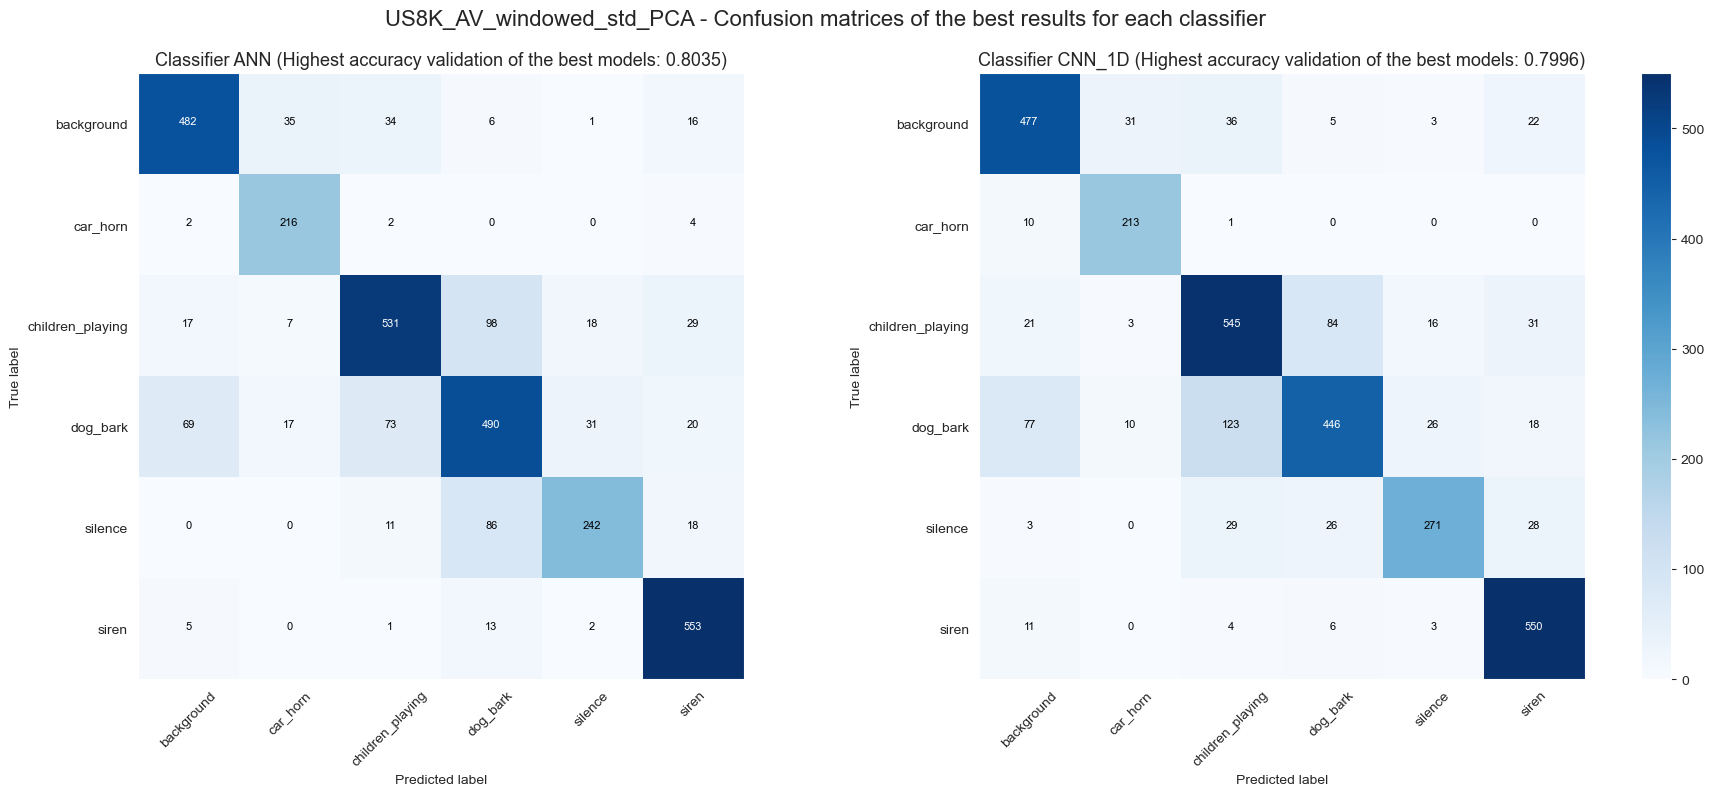

In [126]:
# Plot the confusion matrix for the highest accuracy test classifiers

picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

plt.figure(figsize=(20,8))
plt.suptitle(nom_dataset + model_surname + batch_name + ' - Confusion matrices of the best results for each classifier', fontsize = 16,  y=0.99)
for i, idx in zip(conf_matrices_dict.keys(), range(1, len(conf_matrices_dict) + 1)):
    title = 'Classifier '+ i + ' (Highest accuracy validation of the best models: ' + str("{:0.4f}".format(conf_matrices_dict[i]['Accuracy(Val)'])) +')'
    plt.subplot(1,2,idx)
    plot_confusion_matrix(conf_matrices_dict[i]['Conf_M'],  
                          nom_classes, 
                          title,
                          cmap = None,                          
                          normalize = False)

plt.savefig(os.path.join(path_pic, picture_name))
plt.tight_layout()

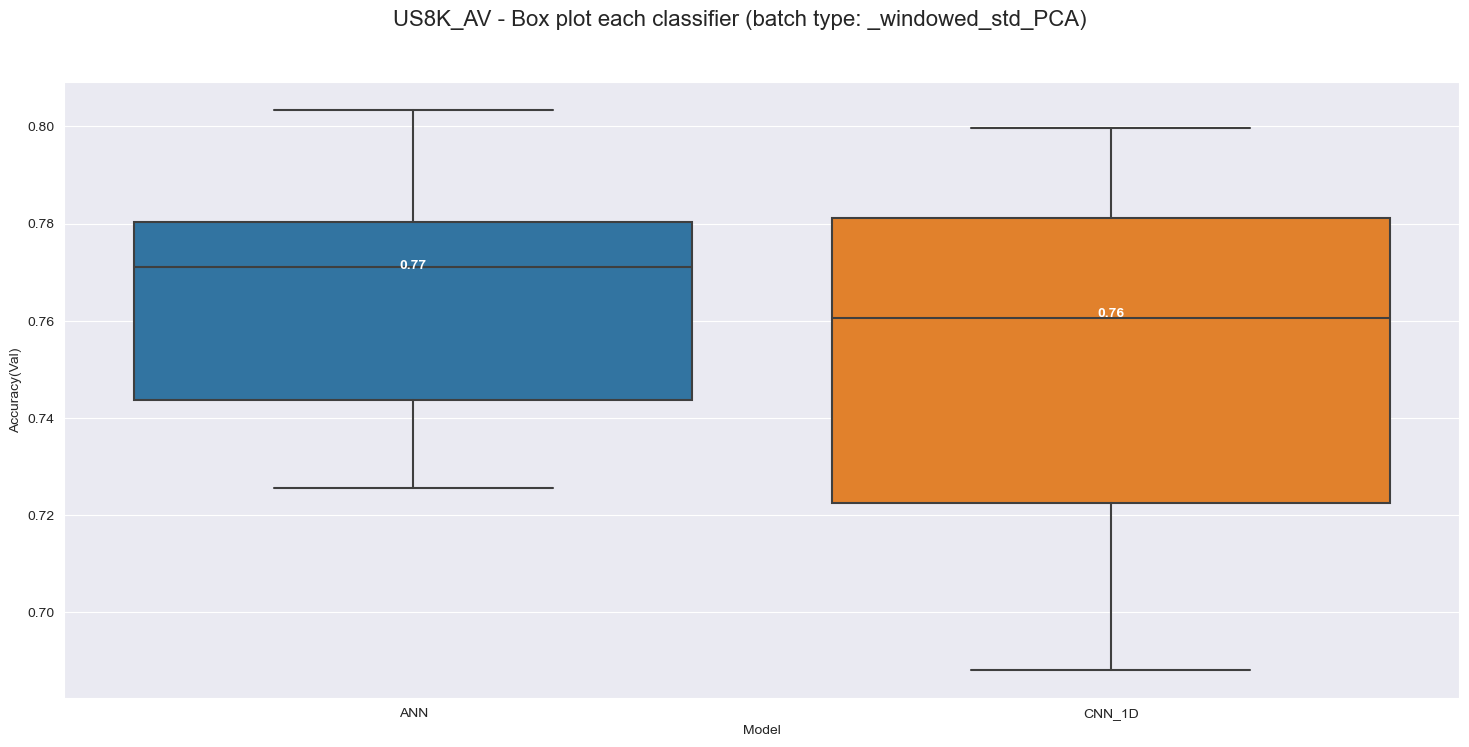

In [127]:
picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

plt.figure(figsize=(18,8))
plt.suptitle(f'{nom_dataset} - Box plot each classifier (batch type: {model_surname + batch_name})', fontsize = 16,  y=0.97)
box_plot = sns.boxplot(data=metrics_set, x="Model", y="Accuracy(Val)", showfliers = True)

medians = list(metrics_set.groupby(['Model'])['Accuracy(Val)'].median())
medians = [round(element, 2) for element in medians]

vertical_offset = metrics_set['Accuracy(Val)'].median()*0.001  # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick], 
            horizontalalignment='center',size='medium',color='w',weight='semibold')
plt.savefig(os.path.join(path_pic, picture_name))

## Results ESC-10 (including the ML results) - Compiled in Excel

Original x Augmented

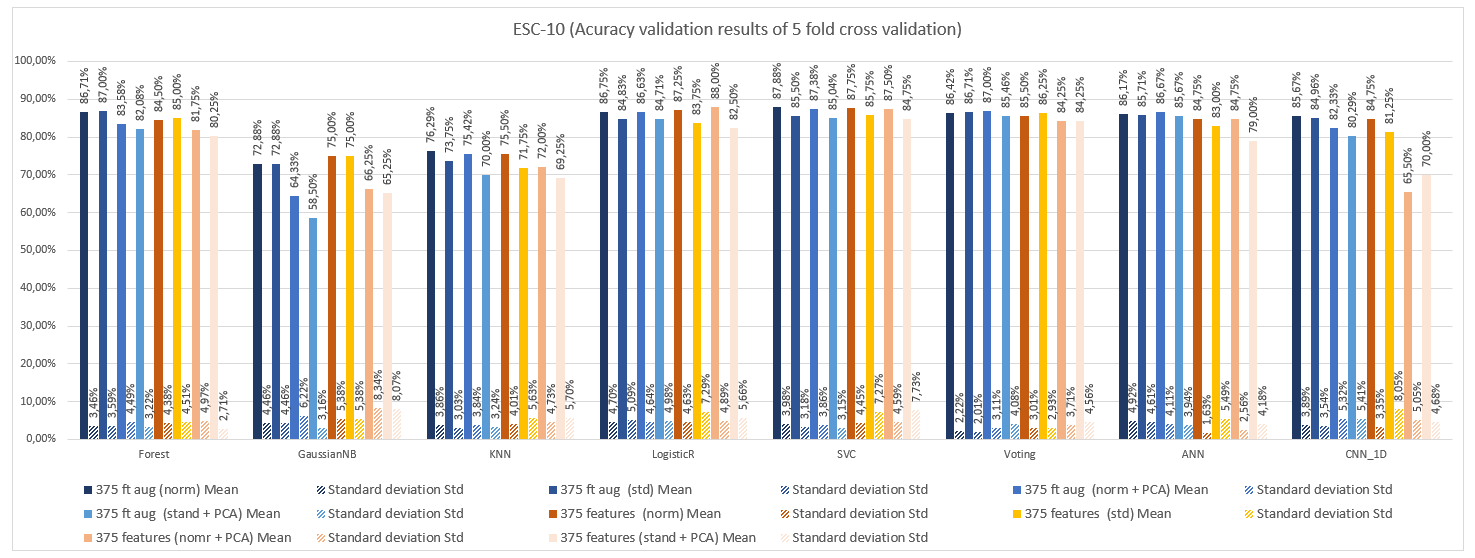

Augmented x Windowed

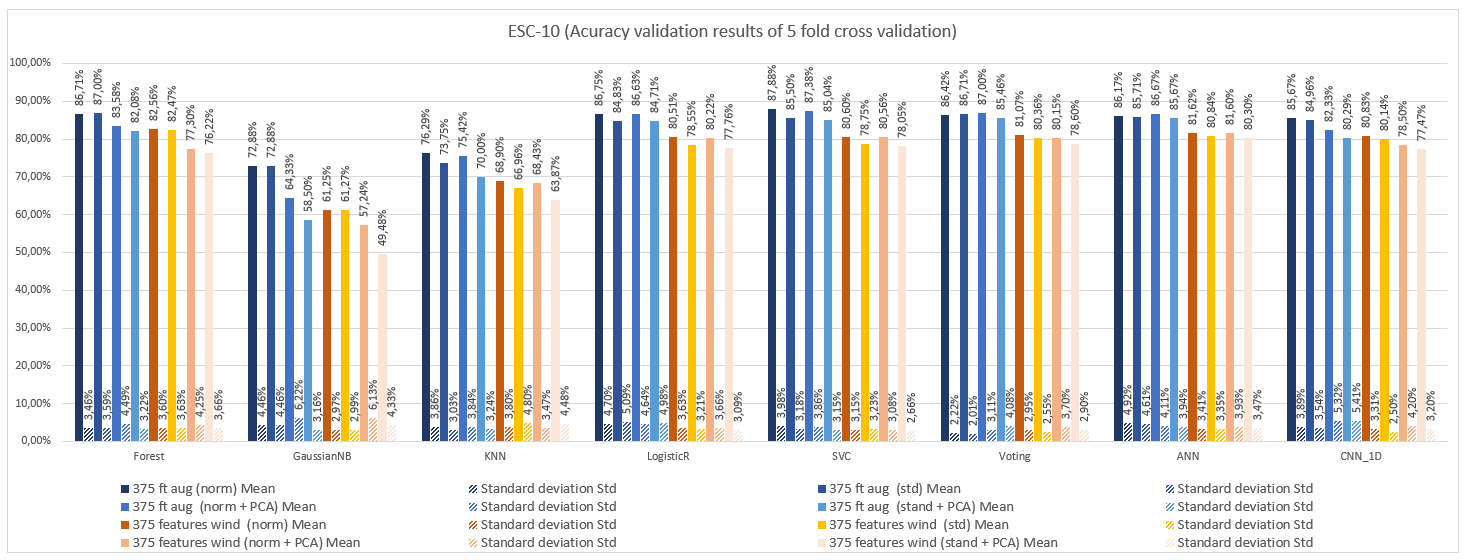

## Results BDLib2 (including the ML results) - Compiled in Excel

Original x Augmented

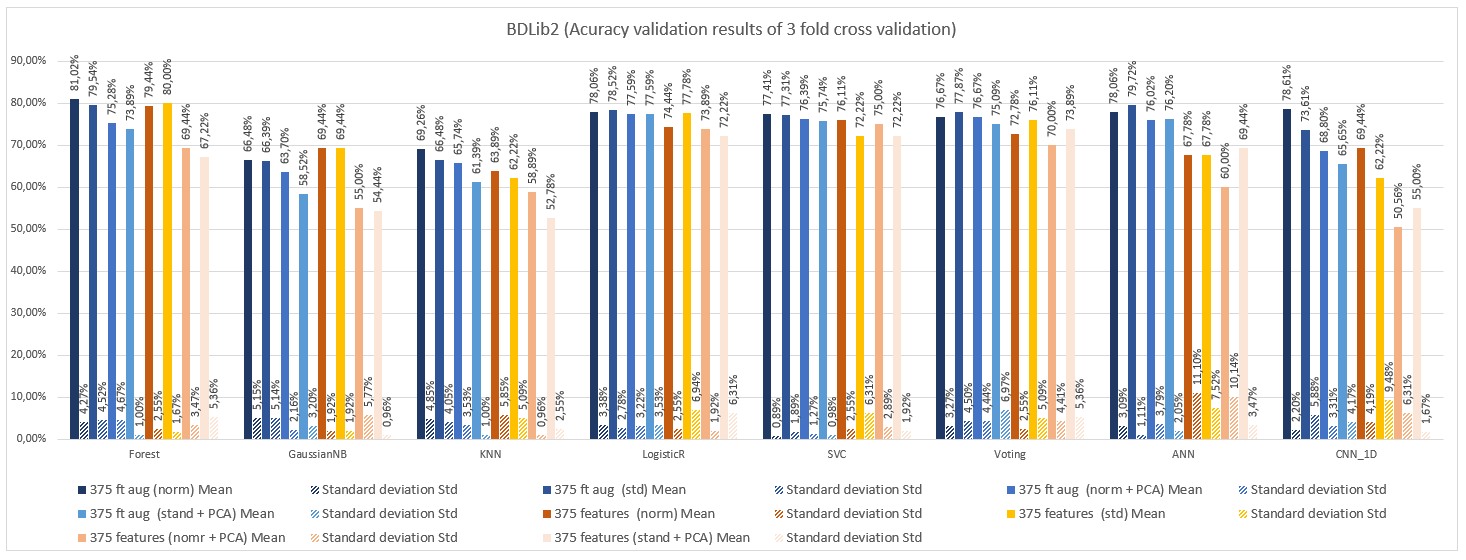

Augmented x Windowed

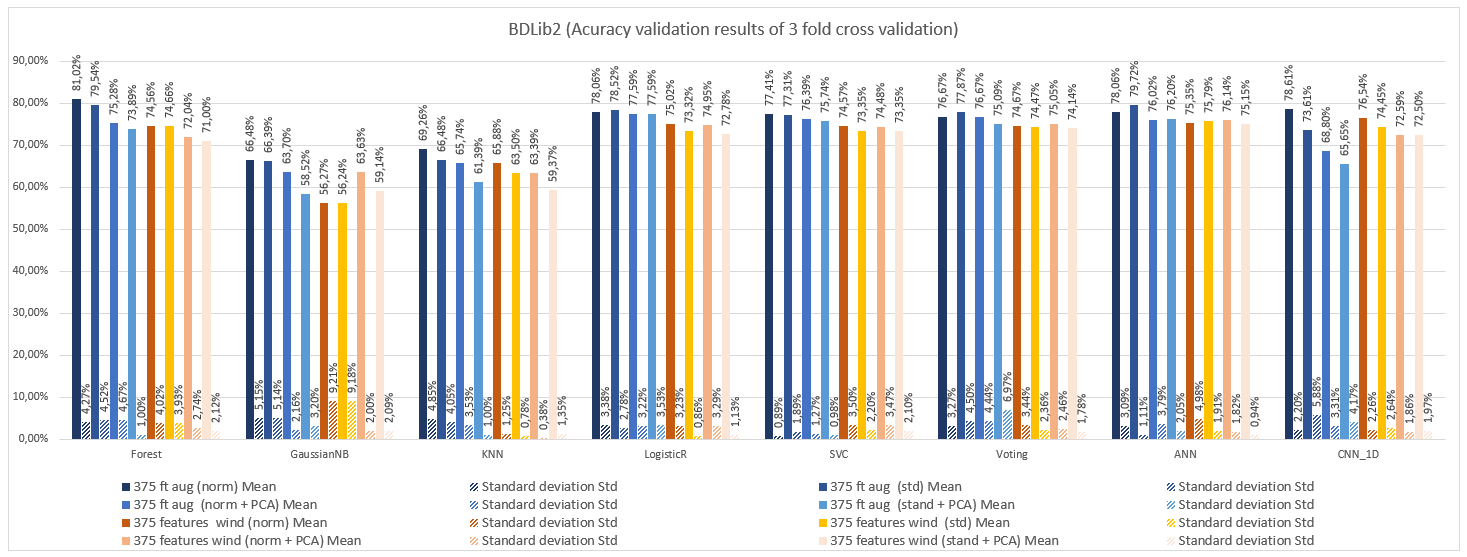

## Results US8K (including the ML results) - Compiled in Excel

Original x Augmented

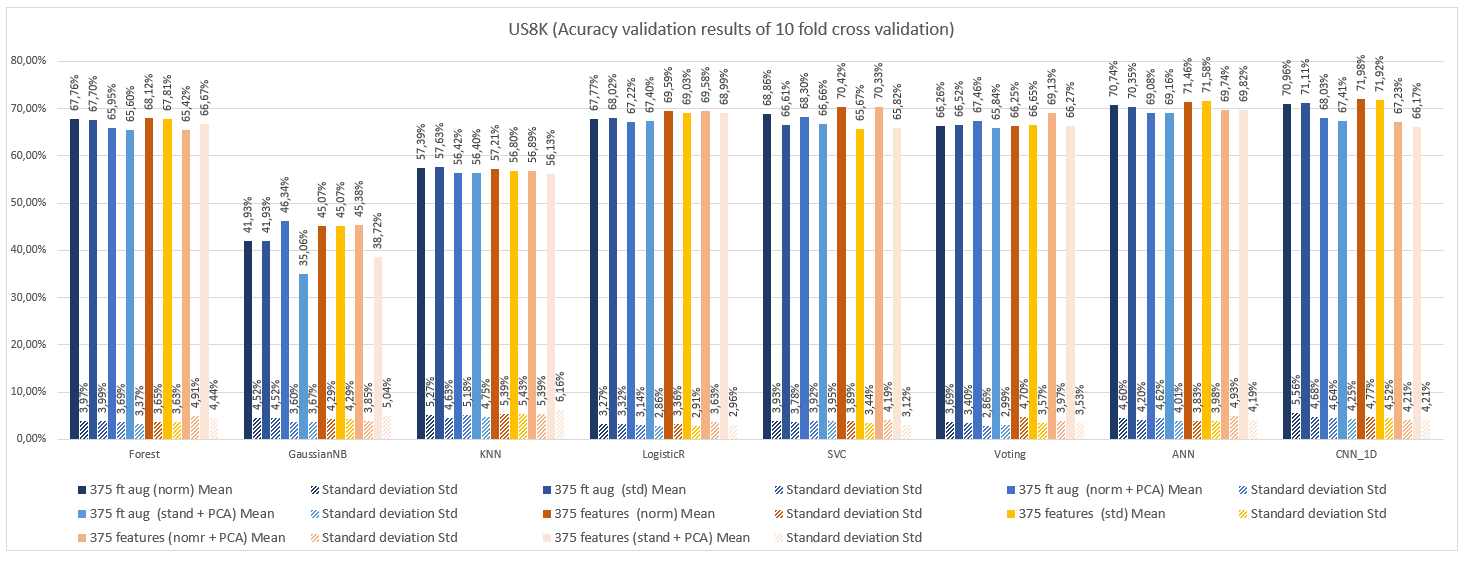

Augmented x Windowed

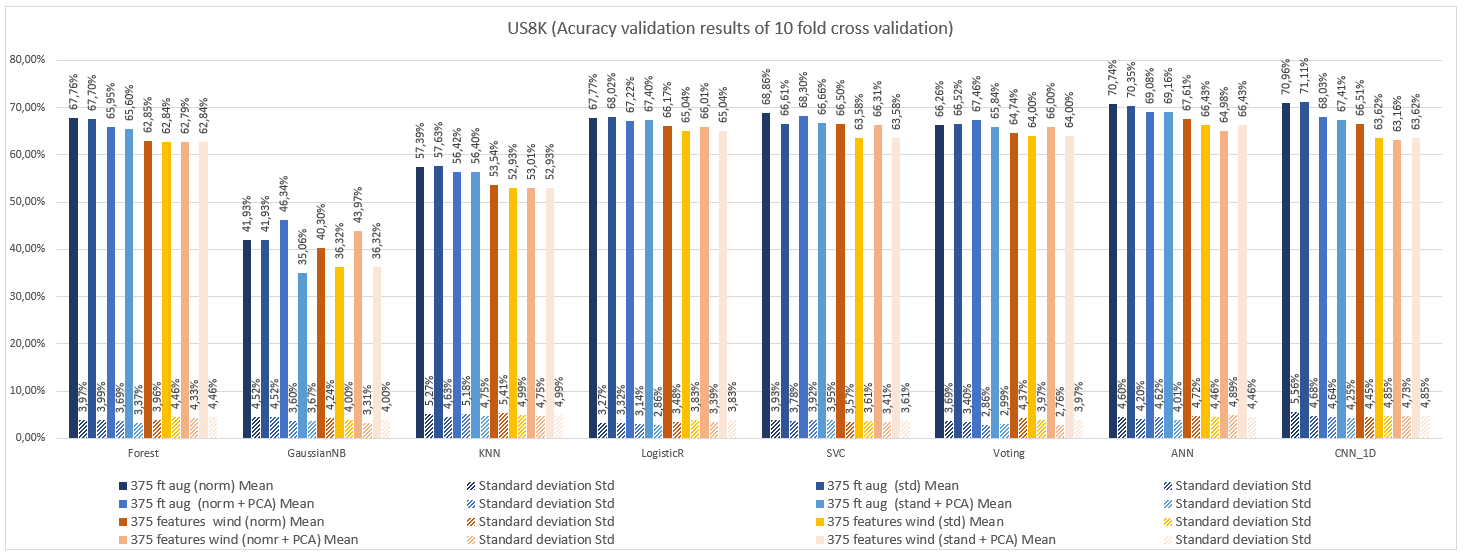

## Results US8K_AV (including the ML results) - Compiled in Excel

Original x Augmented

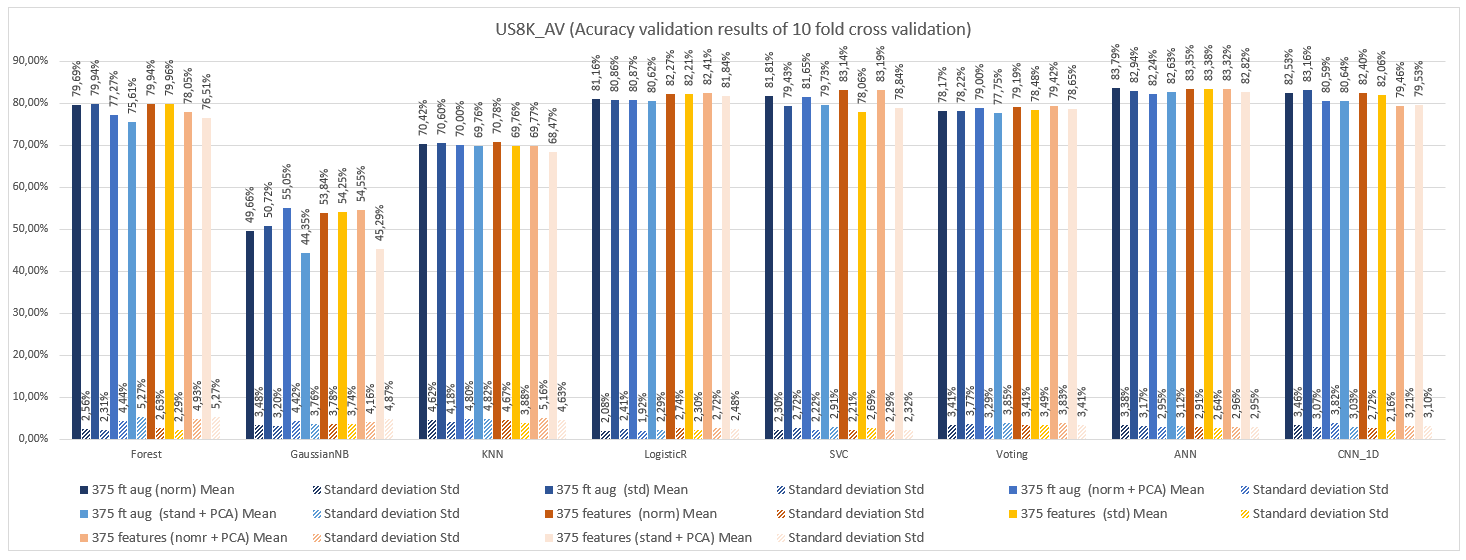

Augmented x Windowed

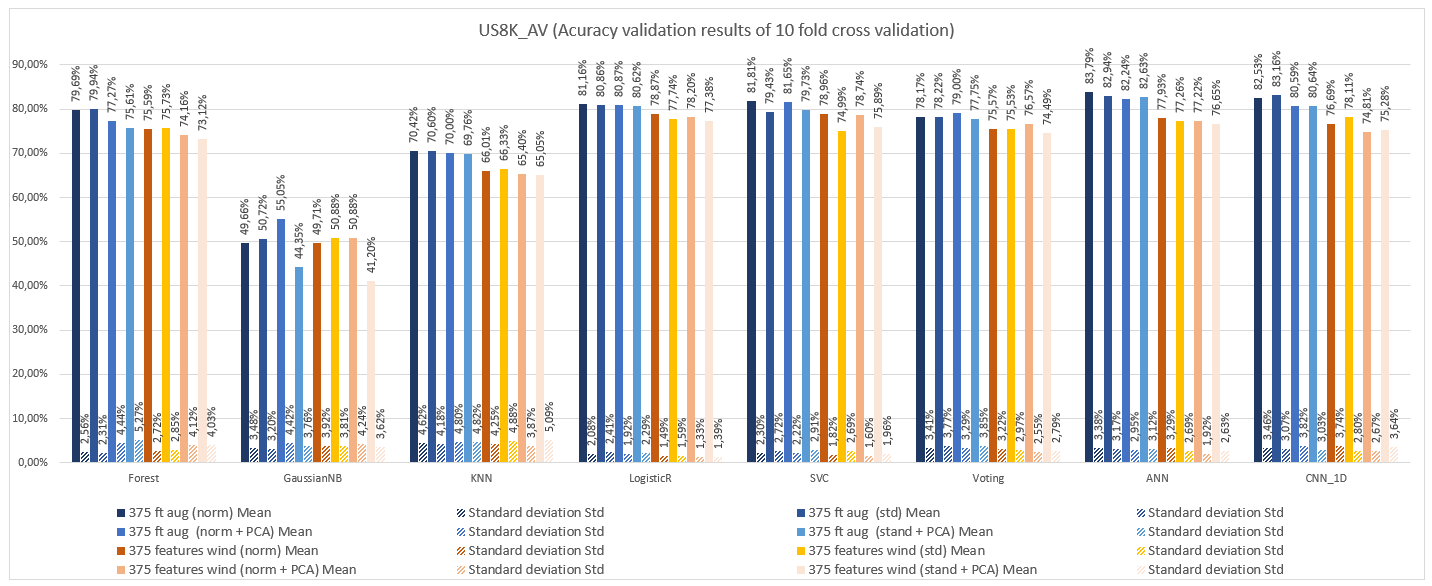

# End of the notebook 

In [129]:
# 

# 